# **This is a Individual Notebook of Soumya Ranjan Mishra**

# **Problem Statement**

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Business Goal**

**BUSINESS PROBLEM OVERVIEW**


Customer churn prediction is extremely important for any business as it recognizes the clients who are likely to stop using their services.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, do exploratory data analysis to identify the main indicators  why customers are leaving the company.


**OBJECTIVE**

Customer churn occurs when customers stop doing business with a company.As the cost of retaining an existing customer is far less than acquiring a new one, maintaining a healthy customer base is important for the success of any business

The main objective of project is to :  
•	Finding  factors which influence customers to churn.
•	Retain churn customers by applying strategy and providing offers based on influencing factors.
•	Control churn rate and improve their image in the market.


**What is Churn Prediction?**


Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

# **Importing**

In [92]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor




from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import XGBRFClassifier
from xgboost import XGBRFRegressor



from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor






import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')



In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter Colab Notebooks/Python/EDA Projects/Telecom Churn.csv')

# **Data Inspection**

In [95]:
# First look
dataset.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

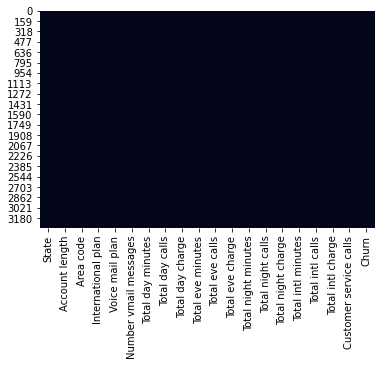

In [97]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

***Above dataset has no null value.***

# **DataSet Information**

In [98]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
State                    object
Account length            int64
Area code                 int64
International plan       object
Voice mail plan          object
Number vmail messages     int64
Total day minutes       float64
Total day calls           int64
Total day charge        float64
Total eve minutes       float64
Total eve calls           int64
Total eve charge        float64
Total night minutes     float64
Total night calls         int64
Total night charge      float64
Total intl minutes      float64
Total intl calls          int64
Total intl charge       float64
Customer service calls    int64
Churn                      bool

* **State                :**categorica for the 50 states

* **Account Length       :**how long account has been active

* **Area Code            :**Code Number of Area having some States included in each area code

* **lntl Plan            :**Internat ional plan activated ( yes, no )

* **VMail Plan           :**  ice Mail plan activated ( yes ,no )

* **VMail Message        :**No.of voice mail messages

* **Day Mins             :**Total day minutes used

* **Day calls**         :Total day calls made

* **Day Charge**         :Total day charge

* **Eve Mins**          :Total evening minutes

* **Eve Calls**          :Total evening calls

* **Eve Charge**         :Total evening charge

* **Night Mins**         :Total night minutes

* **Night Calls**        :Total night calls

* **Night Charge**      :Total night charge

* **Intl Mins**         :Total International minutes used

* **Intl Calls**         :Total International calls made

* **Intl Charge**        :Total International charge

* **CustServ calls**    :Number of customer service caUs made

* **Churn**             :Customer churn (Target Variable True=1, False=0)

 
  


  
  

  




In [99]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [100]:
dataset.shape

(3333, 20)

In [101]:
dataset.describe(include='all')

State  Account length  ...  Customer service calls  Churn
count   3333     3333.000000  ...             3333.000000   3333
unique    51             NaN  ...                     NaN      2
top       WV             NaN  ...                     NaN  False
freq     106             NaN  ...                     NaN   2850
mean     NaN      101.064806  ...                1.562856    NaN
std      NaN       39.822106  ...                1.315491    NaN
min      NaN        1.000000  ...                0.000000    NaN
25%      NaN       74.000000  ...                1.000000    NaN
50%      NaN      101.000000  ...                1.000000    NaN
75%      NaN      127.000000  ...                2.000000    NaN
max      NaN      243.000000  ...                9.000000    NaN

[11 rows x 20 columns]

In [102]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

In [103]:
categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [104]:
def unique_name_no(col):
  print(dataset[col].unique())
  print(dataset[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
51
INTERNATIONAL PLAN
['No' 'Yes']
2
VOICE MAIL PLAN
['Yes' 'No']
2


In [105]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [106]:
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [107]:
### Dropping Duplicate Rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [108]:
dataset.shape

(3333, 20)

# **Exploratory Data Analysis**

## **Exploring the dependent variable**

In [109]:
dataset.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [110]:
dataset.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

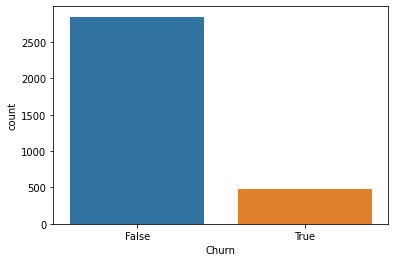

In [111]:
sns.countplot(x=dataset.Churn)

### **Converting the dependent variable to a binary variable (two possible labels/classes)**

In [112]:
def modified_Churn(row):
  if (row['Churn']==False):
    val = 0
  
  else:
    val = 1
  
  return val

In [113]:
dataset['Modified_Churn'] = dataset.apply(modified_Churn,axis = 1)

**INTRODUTION** 

Number of Churn customers       =  483   =  (14.5%)

Number of non-Churn (loyal) customers =  2850  =  (85.5%)


In [114]:
dataset.Modified_Churn.value_counts()

0    2850
1     483
Name: Modified_Churn, dtype: int64

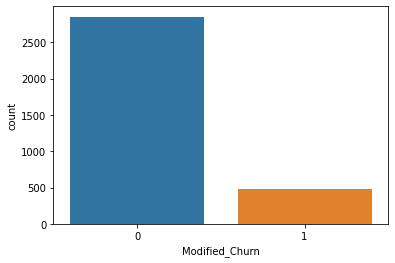

In [115]:
sns.countplot(x=dataset.Modified_Churn)

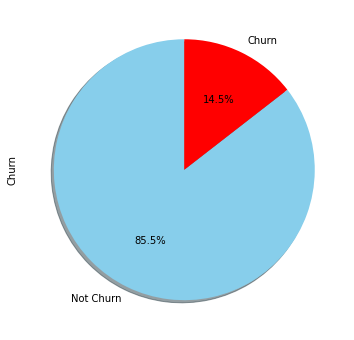

In [116]:
dataset['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [117]:
dataset.head()

State  Account length  ...  Churn Modified_Churn
0    KS             128  ...  False              0
1    OH             107  ...  False              0
2    NJ             137  ...  False              0
3    OH              84  ...  False              0
4    OK              75  ...  False              0

[5 rows x 21 columns]

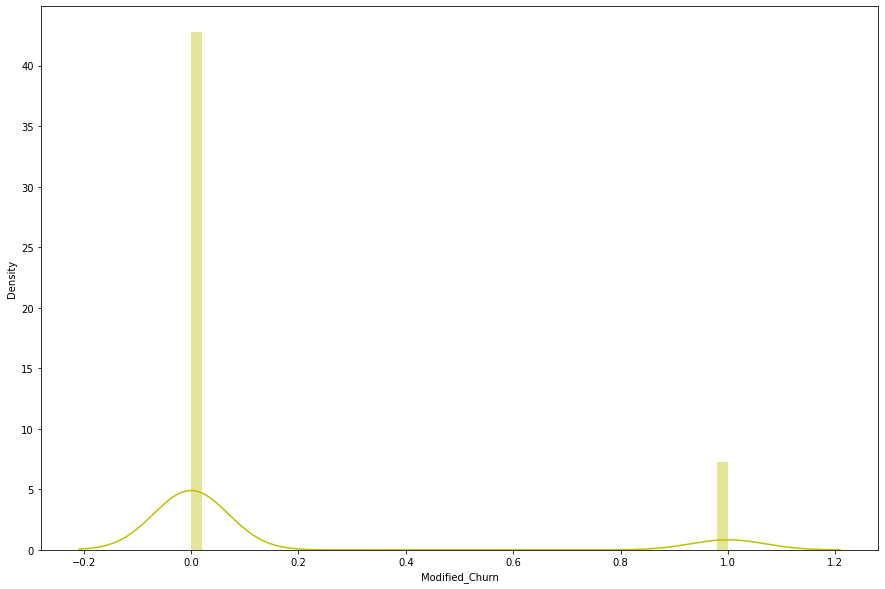

In [118]:
# Dependent Variable "Churn"
plt.figure(figsize=(15,10))
sns.distplot(dataset.Modified_Churn, color="y")

## **Column wise Analysis**

In [119]:
dataset.head()

State  Account length  ...  Churn Modified_Churn
0    KS             128  ...  False              0
1    OH             107  ...  False              0
2    NJ             137  ...  False              0
3    OH              84  ...  False              0
4    OK              75  ...  False              0

[5 rows x 21 columns]

### **State**

**State**

There are 51 state who have different churn rate . 

**CA, NJ ,TX , MD ,SC ,MI**  are the ones who have higher churn rate more then 21.74% which is more than 50% of average churn rate.

In [120]:
dataset['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [121]:
dataset['State'].nunique()

51

In [122]:
dataset.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

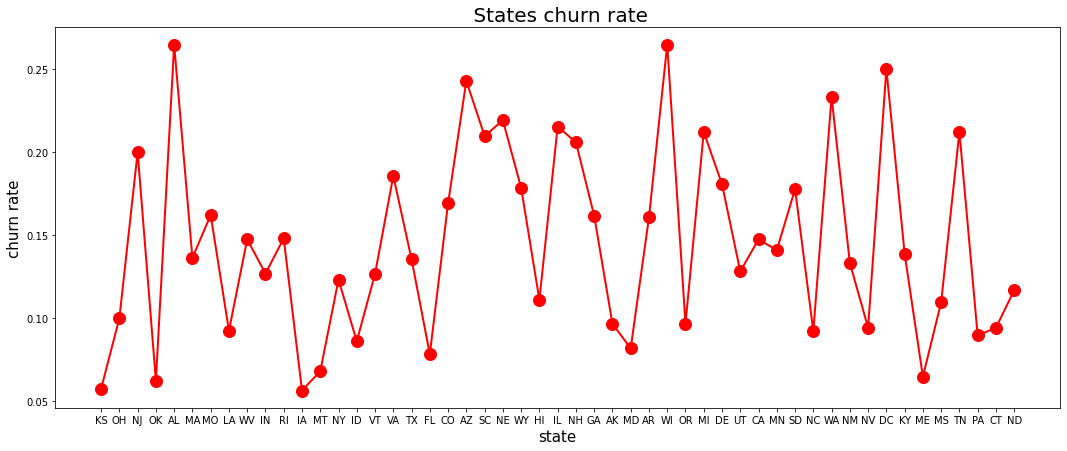

In [123]:
s1=dataset['State'].unique()
s2=dataset.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

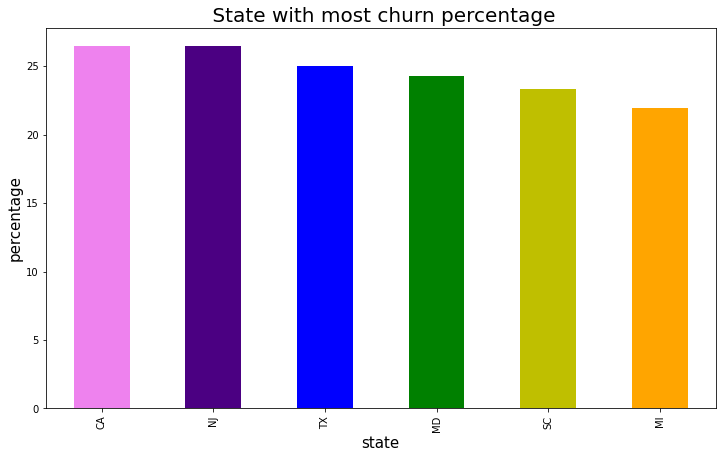

In [124]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (12, 7)

color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

<BarContainer object of 51 artists>

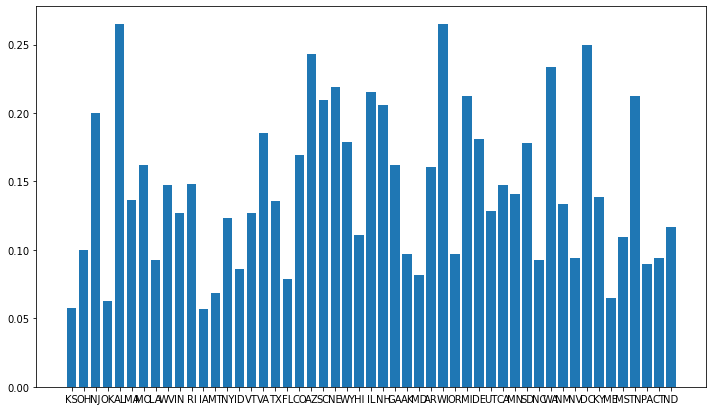

In [125]:
cc=dataset.groupby(['State'])['Churn'].mean()
plt.rcParams['figure.figsize'] = (12, 7)
plt.bar(dataset['State'].unique(),cc)

### **Account Length**

We can catagories Account Length into three catagories like 

**One Digit Length** 

 Churn True -8.3%

 No. of Churn True-2



 Churn False-91.7%

**Two Digit Length**

Churn True -14.0% 

No. of Churn True-225



Churn False-86.0%


**Three Digit Length**

Churn True -15.0% 

No. of Churn True-256



Churn False-85.0%




**REMARK**


AS from the above  record, we can see that Two digit Account Length customers are churning with a number of 225 
And Three digit Account Length customers are churning with a number of 256





In [126]:
print(dataset['Account length'].value_counts().sort_values(ascending=False))
print(" ")
print(dataset.groupby(['Account length'])['Churn'].value_counts().sort_values(ascending=False))
print(" ")
print(print(dataset.groupby('Account length')['Churn'].mean().sort_values(ascending=False)))

105    43
87     42
93     40
101    40
90     39
       ..
243     1
26      1
4       1
8       1
2       1
Name: Account length, Length: 212, dtype: int64
 
Account length  Churn
87              False    39
90              False    37
86              False    36
101             False    35
105             False    34
                         ..
39              True      1
174             True      1
175             False     1
208             True      1
243             False     1
Name: Churn, Length: 373, dtype: int64
 
Account length
188    1.0
2      1.0
208    1.0
225    0.5
224    0.5
      ... 
31     0.0
30     0.0
192    0.0
194    0.0
243    0.0
Name: Churn, Length: 212, dtype: float64
None


In [127]:
dataset['Account length'].max()

243

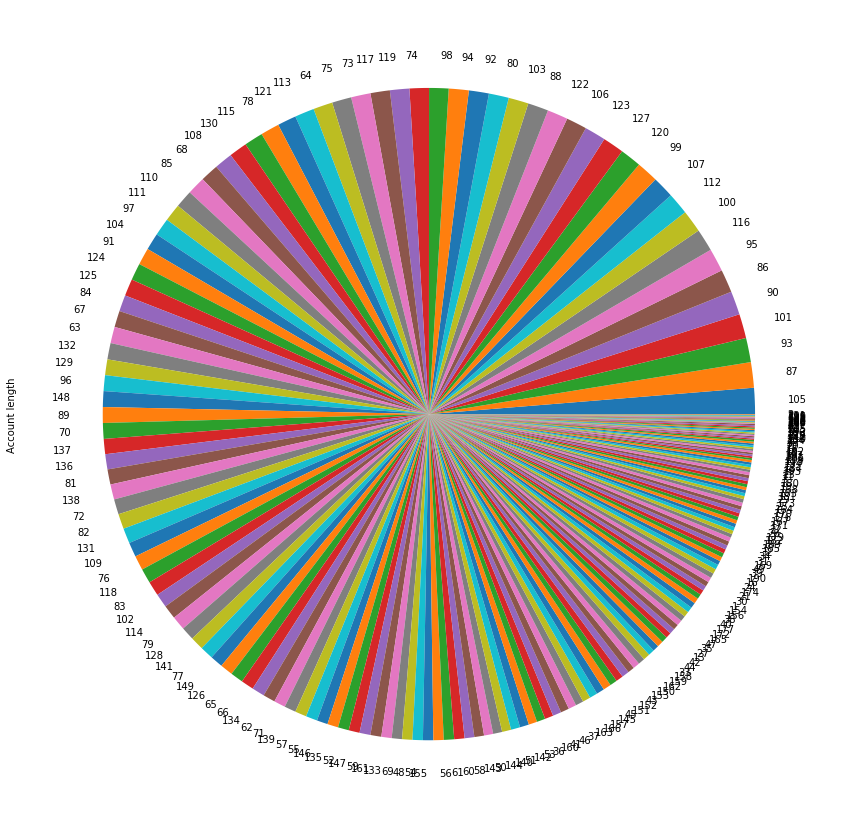

In [128]:
dataset['Account length'].value_counts().plot(kind='pie',
                              figsize=(25,15))
                             
                               

One Digit Account Length

In [129]:
dataset[dataset['Account length']<=9].loc[:,['Churn']].value_counts()

Churn
False    22
True      2
dtype: int64

In [130]:
dataset[dataset['Account length']<=9].shape

(24, 21)

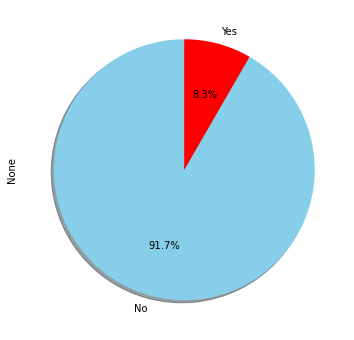

In [131]:
dataset[dataset['Account length']<=9].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

Two Digit Account Length

In [132]:
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].loc[:,['Churn']].value_counts()

Churn
False    1378
True      225
dtype: int64

In [133]:
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].shape

(1603, 21)

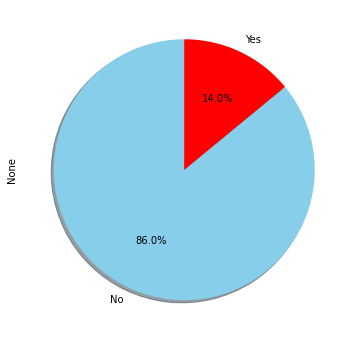

In [134]:
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0])

Three Digit Account Length

In [135]:
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].loc[:,['Churn']].value_counts()

Churn
False    1450
True      256
dtype: int64

In [136]:
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].shape

(1706, 21)

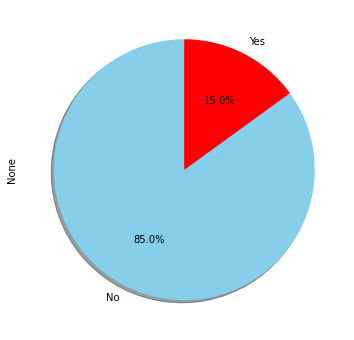

In [137]:
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0])

### **Area Code**

**Area code**

Dosent matter at all as all area have  around 14% churn rate .

In [138]:
print(dataset['Area code'].value_counts())
print(" ")
print(dataset.groupby(['Area code'])['Churn'].value_counts())
print(" ")
print(print(dataset.groupby('Area code')['Churn'].mean()))

415    1655
510     840
408     838
Name: Area code, dtype: int64
 
Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64
 
Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64
None


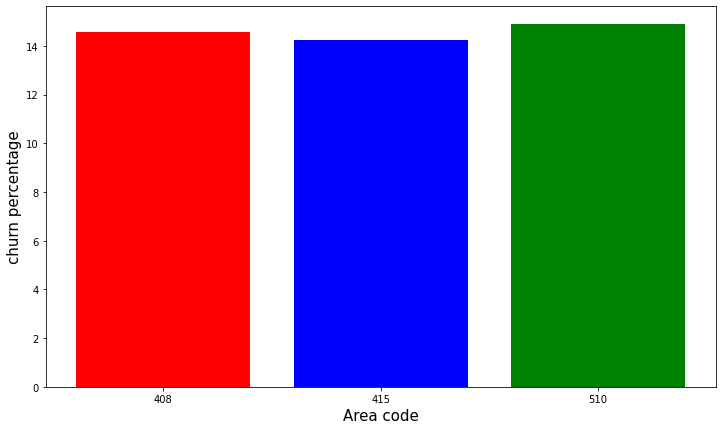

In [139]:
a1= list(['408','415' , '510'])
b1= dataset.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['r','b','g'])

plt.rcParams['figure.figsize'] = (6, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

### **International Plan**

**INTERNATIONAL PLAN**

3010 dont have a international plan

323 have a international plan

Among those who  have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan  only 11.4 % people churn.

Among those who  have a international plan their average charge is 2.86 and they talk for 10.7 minutes average .

Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.15 minutes average .

The reason why people having international plan might be leaving is that they are [paying same amount of money for international calls as for those customers who dont have a international plan.Hence they arent getting any benefits for having an international plan so they might be unhappy. 

***Customers with the International Plan tend to churn more frequently ***

In [140]:
print(dataset['International plan'].value_counts())
print(" ")
print(dataset.groupby('International plan')['Churn'].value_counts())
print(" ")
print(" ")
print(dataset.groupby('International plan')['Churn'].mean())
print(" ")
print(dataset.groupby(['International plan'])['Total intl charge'].mean())
print(" ")
print(dataset.groupby(['Churn','International plan'])['Total intl charge'].mean())



No     3010
Yes     323
Name: International plan, dtype: int64
 
International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64
 
 
International plan
No     0.114950
Yes    0.424149
Name: Churn, dtype: float64
 
International plan
No     2.753279
Yes    2.869907
Name: Total intl charge, dtype: float64
 
Churn  International plan
False  No                    2.750586
       Yes                   2.640538
True   No                    2.774017
       Yes                   3.181314
Name: Total intl charge, dtype: float64


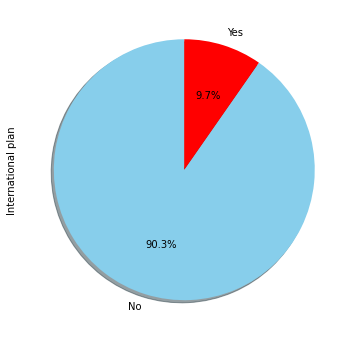

In [141]:
dataset['International plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [142]:
i1 = dataset['International plan'].unique()
i2 = dataset.groupby('International plan')['Churn'].mean()*100
i3 = dataset.groupby(['International plan'])['Total intl charge'].mean()
i4 = dataset.groupby(["Churn"])['Total intl minutes'].mean()

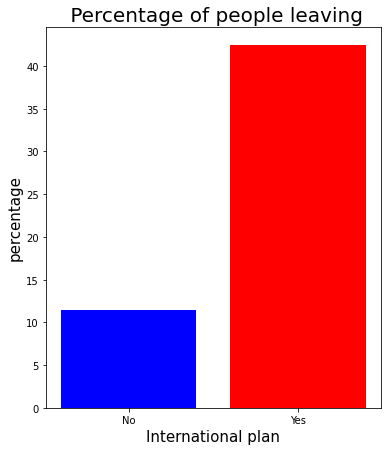

In [143]:
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i2 , color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

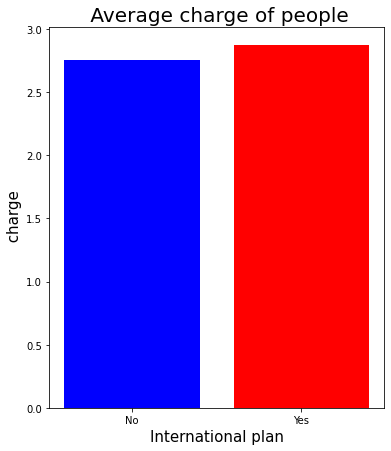

In [144]:
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i3, color=['b','r'])
plt.title(" Average charge of people", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' charge', fontsize = 15)
plt.show()

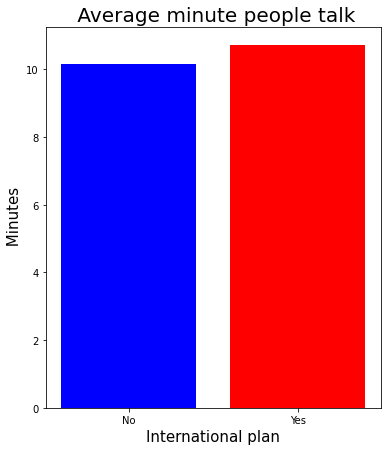

In [145]:
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i4, color=['b','r'])
plt.title(" Average minute people talk", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' Minutes', fontsize = 15)
plt.show()

### **Voice Mail**

**VOICE MAIL**

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.


 A Brief description is provided under the header **Some Additional Experiments only based on True Churn Data and some possible reasons for churning**


I think, for respective area codes those who have taken voice mail plans where there we see a more differnce between the maximum number of vmail sent from that area and the average number of vmail sent for that area. So, here we can conclude like this that

May be customers are using voice mail as per their requirement or may be there would be some network unstability for which they won't able to send more voice mails while they get access of around 50 voicemails in voicemail plan but they are using on an average of 25-35.

on my own experience i know and felt that the voice mail needs more network stability to get sent through.

If this is the problem , then i have found some states with poor network status and some states network needs maintainence.


AS i got to know this while experimenting on TRUE datasets below under the header of **Some Additional Experiments only based on True Churn Data and some possible reasons for churning**

***Customers  with the Voice Mail Plan tend to churn less frequently ***

In [146]:
dataset['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: Number vmail messages, dtype: int64

In [147]:
print(dataset['Voice mail plan'].value_counts())
print(" ")
print(dataset.groupby('Voice mail plan')['Churn'].value_counts())
print(" ")
print(dataset.groupby('Voice mail plan')['Churn'].mean())
print(" ")
print(" ")
#print(dataset.groupby(['Churn'])['Number vmail messages'].mean())
print(" ")
#print(dataset.groupby('Voice mail plan')['Number vmail messages'].mean())

No     2411
Yes     922
Name: Voice mail plan, dtype: int64
 
Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
Name: Churn, dtype: int64
 
Voice mail plan
No     0.167151
Yes    0.086768
Name: Churn, dtype: float64
 
 
 


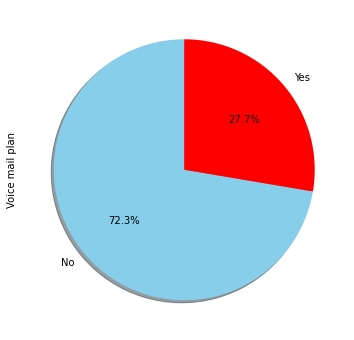

In [148]:

dataset['Voice mail plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

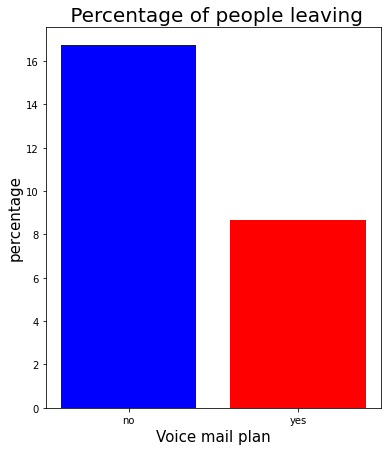

In [149]:
plt.rcParams['figure.figsize'] = (6, 7)

cc1=list(['no','yes'])
cc2=dataset.groupby('Voice mail plan')['Churn'].mean()*100
plt.bar(cc1,cc2, color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

### **Overall Calls**

**OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

In [150]:
print(dataset.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day charge'].mean())

# 18% more min    18% more charge    no insight

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64
 
Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64
 
Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


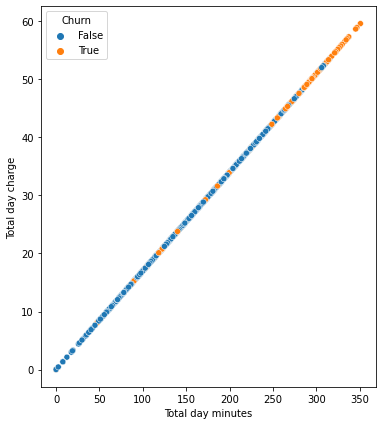

In [151]:
cdd = sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset)


In [152]:
print(dataset.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve charge'].mean())


Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64
 
Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64
 
Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


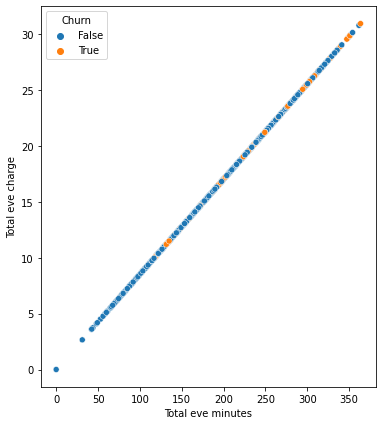

In [153]:
cdd = sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=dataset)

In [154]:
print(dataset.groupby(["Churn"])['Total night calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night charge'].mean())


Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64
 
Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64
 
Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


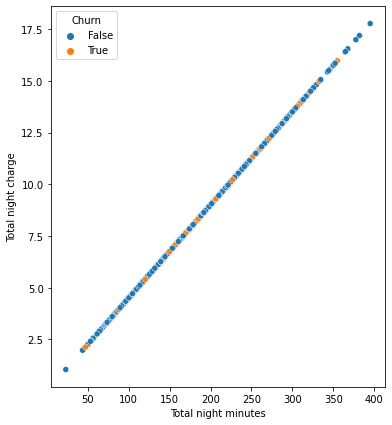

In [155]:
cdd = sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=dataset)

In [156]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data1 = [['Total day minutes',175.17 , 206.91], ['Total day charge',29.78, 35.17]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
minutes_code1 = pd.DataFrame(data1, columns = ['day', 'dont churn',' churn']) 

# print dataframe. 
minutes_code1

day  dont churn   churn
0  Total day minutes      175.17  206.91
1   Total day charge       29.78   35.17

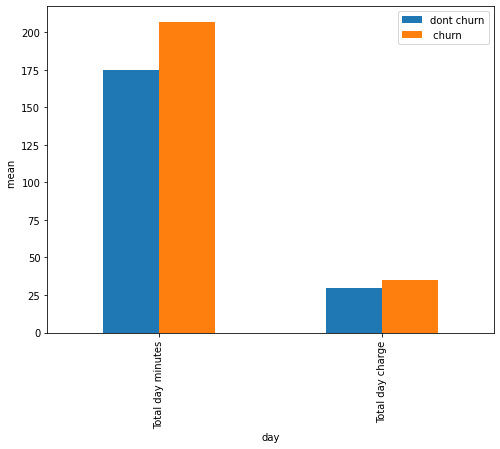

In [157]:
plt.rcParams['figure.figsize'] = (8, 6)


minutes_code1.plot(kind='bar', x='day',ylabel='mean  ')

In [158]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data2 = [ ['Total eve minutes',199.04, 212.41], ['Total night minutes',200.13,205.23]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
minutes_code2 = pd.DataFrame(data2, columns = ['minutes', 'dont churn',' churn']) 

# print dataframe. 
minutes_code2

minutes  dont churn   churn
0    Total eve minutes      199.04  212.41
1  Total night minutes      200.13  205.23

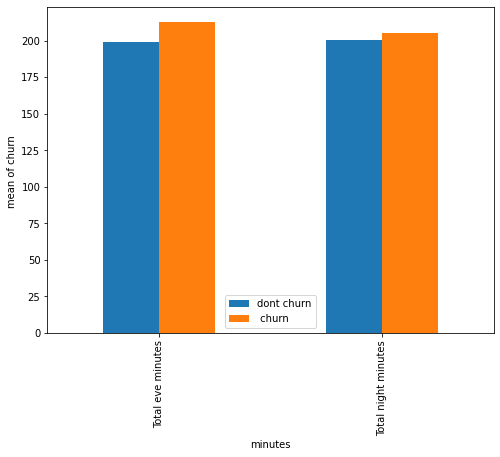

In [159]:
plt.rcParams['figure.figsize'] = (8,6)


minutes_code2.plot(kind='bar', x='minutes',xlabel='minutes',ylabel='mean of churn ')

In [160]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data3 = [ ['Total eve charge',16.91, 18.05], ['Total night charge',9,9.23]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
minutes_code3 = pd.DataFrame(data3, columns = ['charge', 'dont churn',' churn']) 

# print dataframe. 
minutes_code3

charge  dont churn   churn
0    Total eve charge       16.91   18.05
1  Total night charge        9.00    9.23

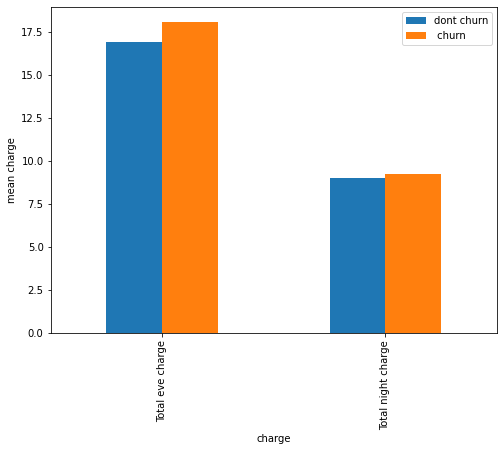

In [161]:
plt.rcParams['figure.figsize'] = (8,6)


minutes_code3.plot(kind='bar', x='charge',ylabel='mean charge')

### **Customer Service Call**

**CUSTOMER SERVICE CALL**

The service calls of customers varies from 0 to 9 . 

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more then 5 service calls their probability of leaving is more then 50 %.

Hence customers who make more then 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

In [162]:
dataset['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [163]:
def get_cust_pie(i):
  x=dataset[dataset['Customer service calls']==i].loc[:,['Churn']].value_counts()
  
  x.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0])
  print(f"For Customer care calling time:{i}    \n     {x}")
                              
  


For Customer care calling time:0    
     Churn
False    605
True      92
dtype: int64
For Customer care calling time:1    
     Churn
False    1059
True      122
dtype: int64
For Customer care calling time:2    
     Churn
False    672
True      87
dtype: int64
For Customer care calling time:3    
     Churn
False    385
True      44
dtype: int64
For Customer care calling time:4    
     Churn
False    90
True     76
dtype: int64
For Customer care calling time:5    
     Churn
True     40
False    26
dtype: int64
For Customer care calling time:6    
     Churn
True     14
False     8
dtype: int64
For Customer care calling time:7    
     Churn
True     5
False    4
dtype: int64
For Customer care calling time:8    
     Churn
True     1
False    1
dtype: int64


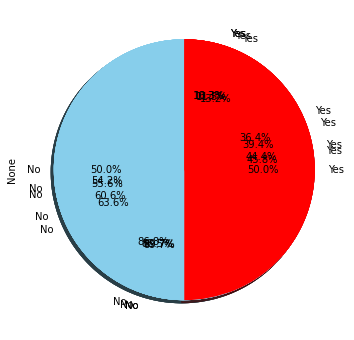

In [164]:
i=0
while i<dataset['Customer service calls'].max():
  get_cust_pie(i)
  i+=1

In [165]:
dataset['Customer service calls'].max()

9

For Customer care calling time:0    
     Churn
False    605
True      92
dtype: int64


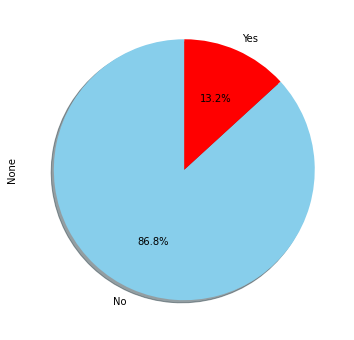

In [166]:
get_cust_pie(0)

For Customer care calling time:1    
     Churn
False    1059
True      122
dtype: int64


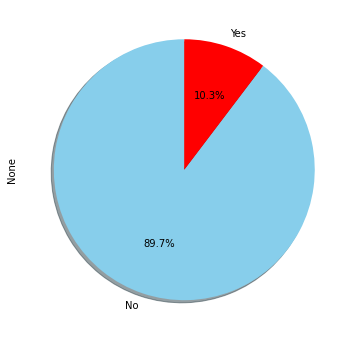

In [167]:
get_cust_pie(1)

For Customer care calling time:2    
     Churn
False    672
True      87
dtype: int64


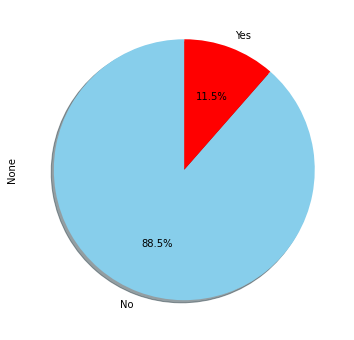

In [168]:
get_cust_pie(2)

For Customer care calling time:3    
     Churn
False    385
True      44
dtype: int64


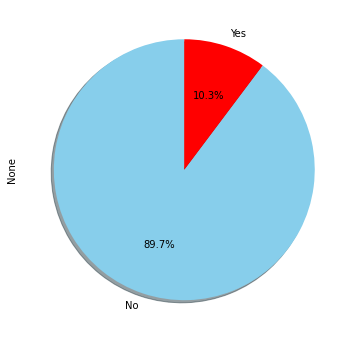

In [169]:
get_cust_pie(3)

For Customer care calling time:4    
     Churn
False    90
True     76
dtype: int64


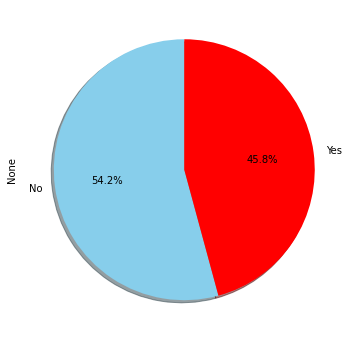

In [170]:
get_cust_pie(4)

For Customer care calling time:5    
     Churn
True     40
False    26
dtype: int64


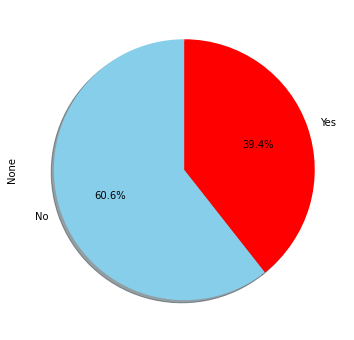

In [171]:
get_cust_pie(5)

For Customer care calling time:6    
     Churn
True     14
False     8
dtype: int64


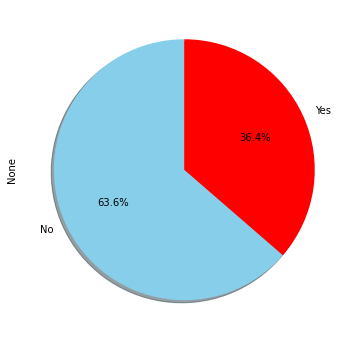

In [172]:
get_cust_pie(6)

For Customer care calling time:7    
     Churn
True     5
False    4
dtype: int64


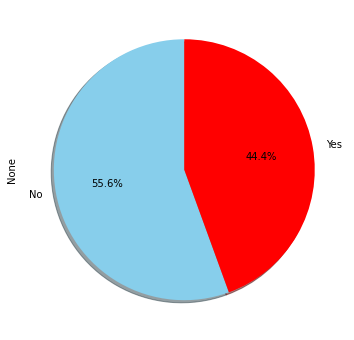

In [173]:
get_cust_pie(7)

For Customer care calling time:8    
     Churn
True     1
False    1
dtype: int64


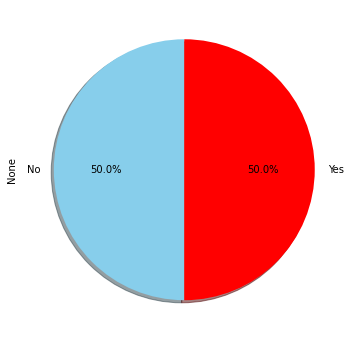

In [174]:
get_cust_pie(8)

In [175]:
dataset[dataset['Customer service calls']==9].loc[:,['Churn']].value_counts()

Churn
True     2
dtype: int64

In [176]:
dataset.groupby(['Churn'])['Customer service calls'].mean()

Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64

In [177]:
dataset.groupby(['Customer service calls'])['Churn'].mean()

Customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: Churn, dtype: float64

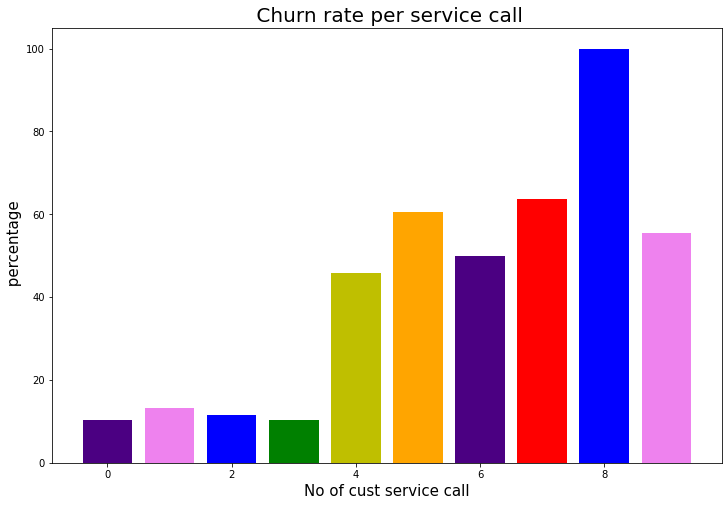

In [178]:
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(dataset['Customer service calls'].unique())
s2=list(dataset.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','y','orange','r'])


plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()


### **Correlation**

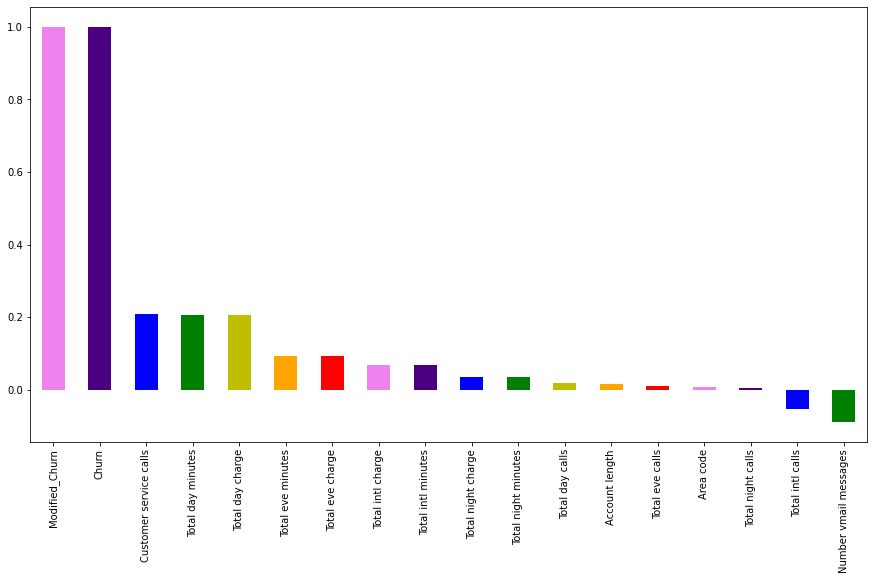

In [179]:
# correlation

plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['violet','indigo','b','g','y','orange','r'])

Text(0.5, 1.0, 'Correlation Heatmap')

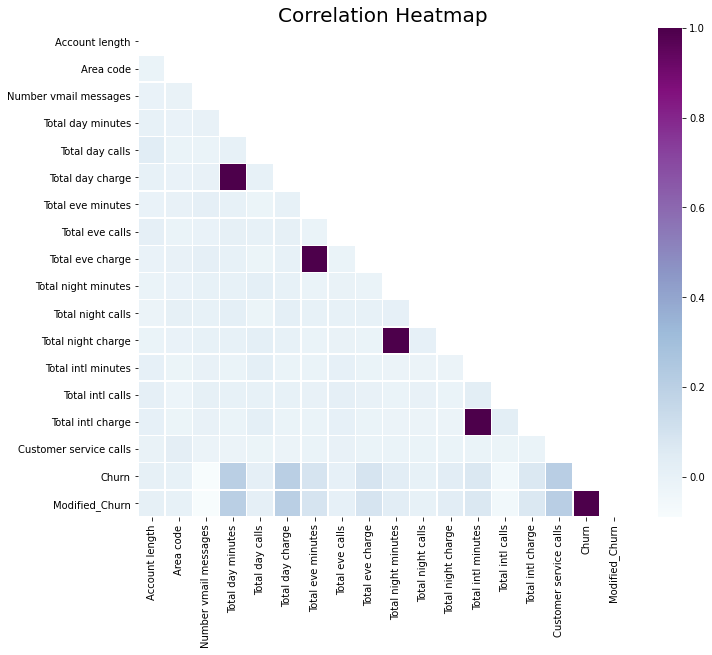

In [180]:
corr=dataset.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

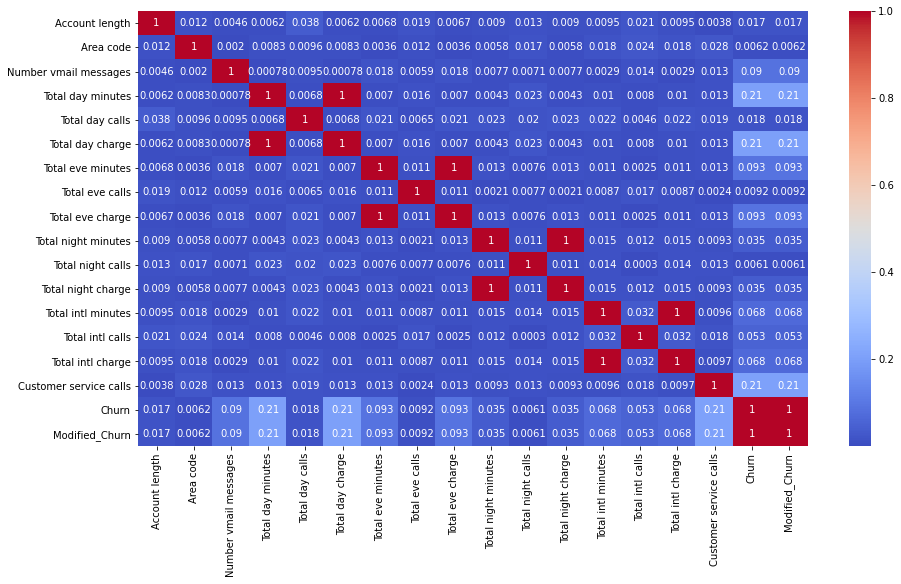

In [181]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [182]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## **Handling Numeric Features**

In [183]:
numeric_features= dataset.describe().columns

In [184]:
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Modified_Churn'],
      dtype='object')

**Univariate Analysis**

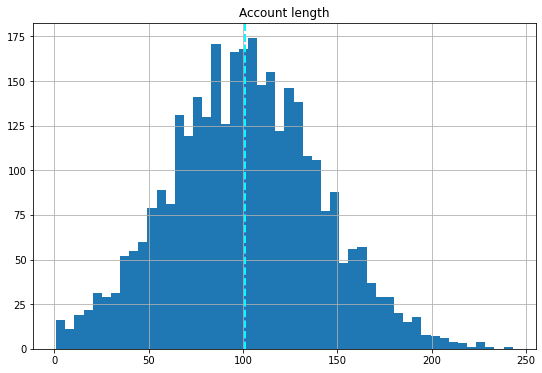

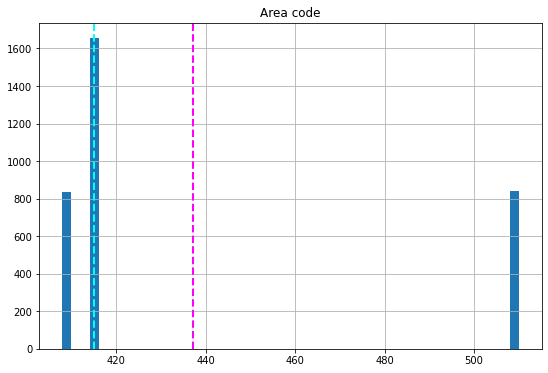

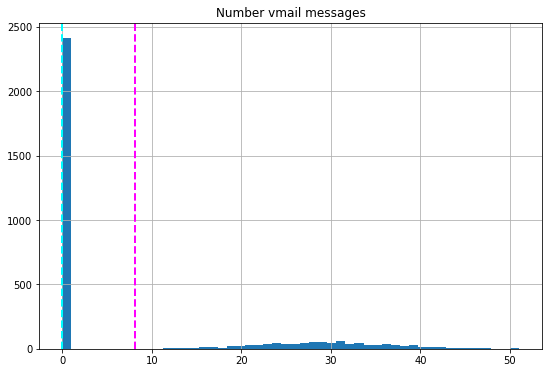

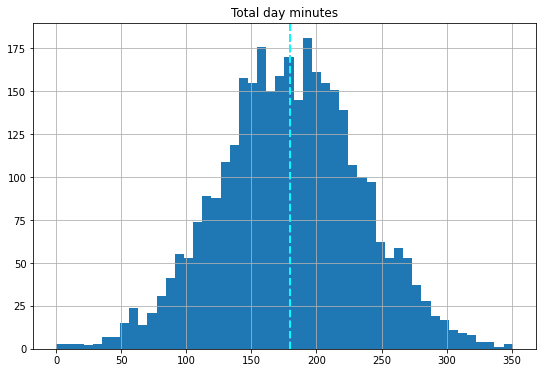

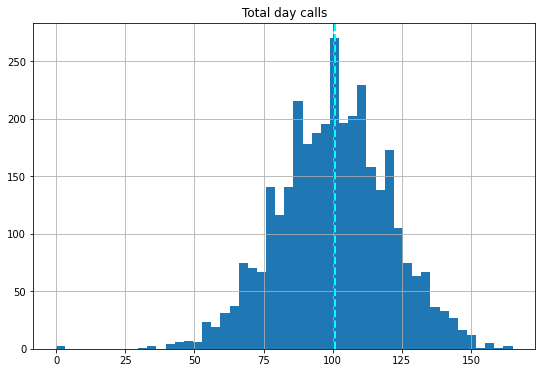

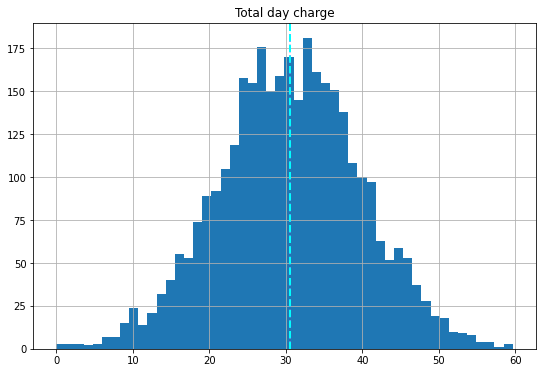

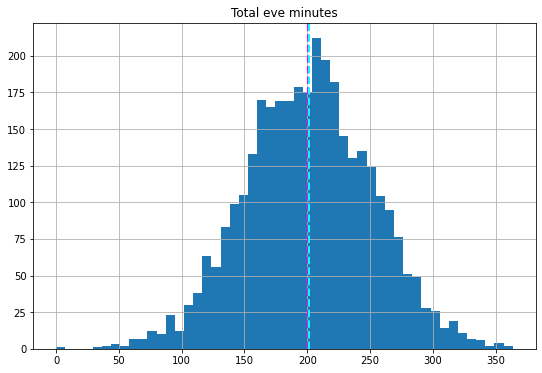

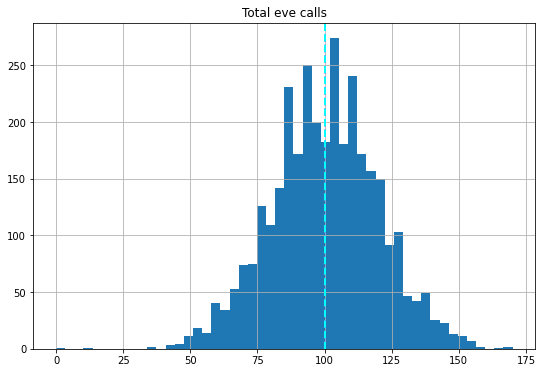

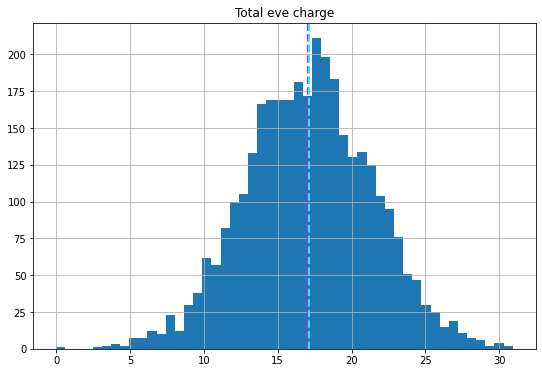

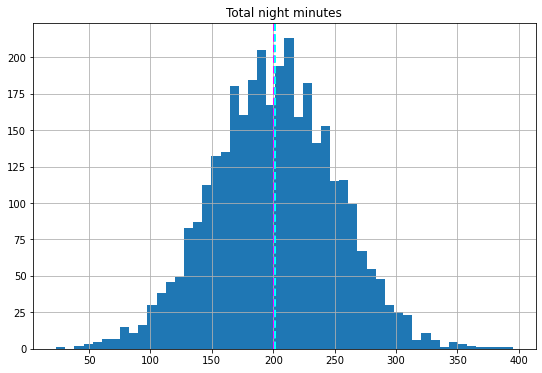

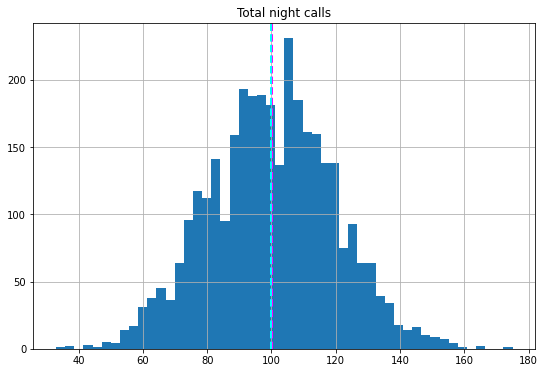

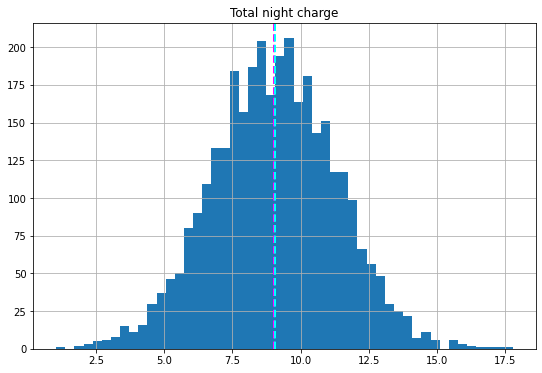

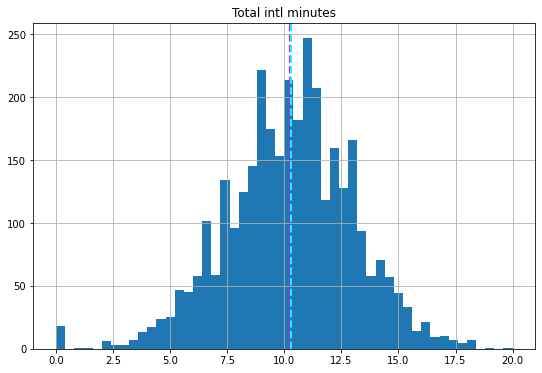

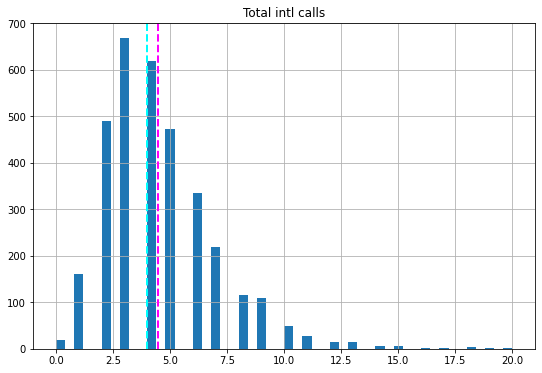

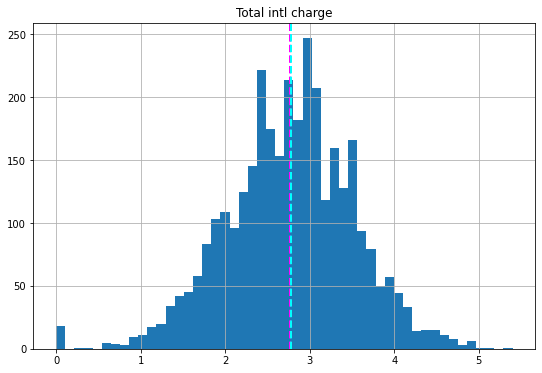

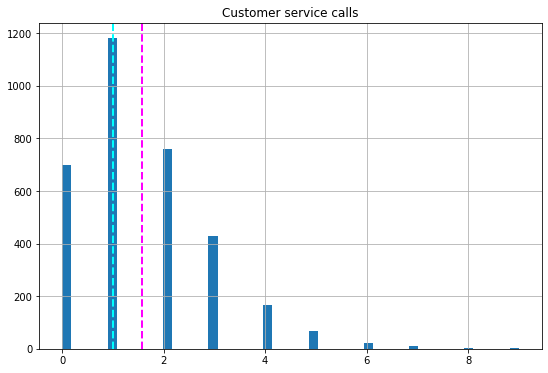

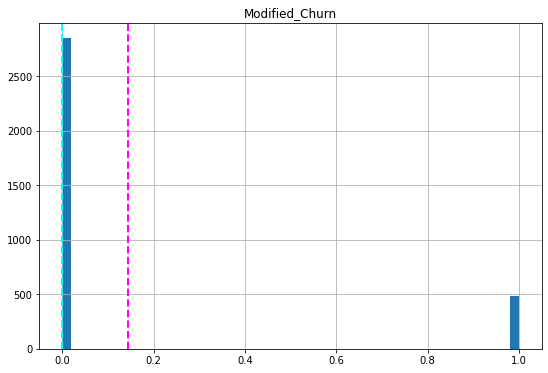

In [185]:
#@Title Default Title Text
#plot a bar plot for each numerical feature count with Hist Plot
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

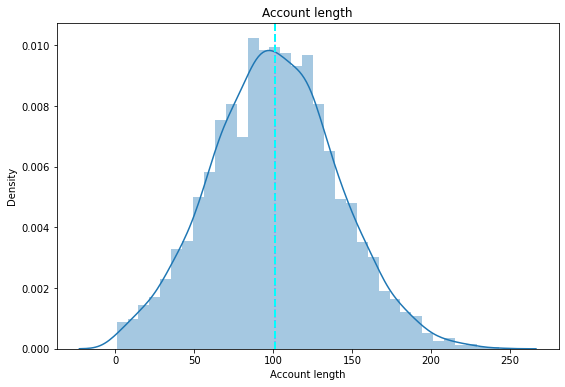

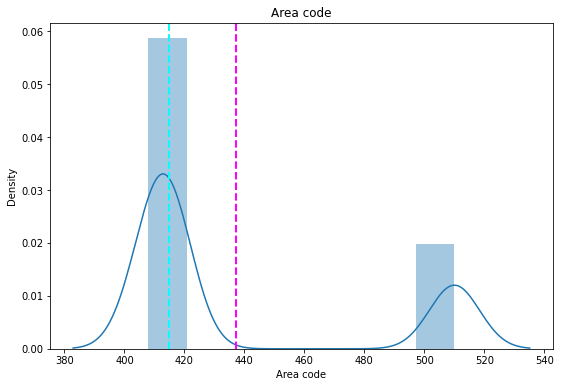

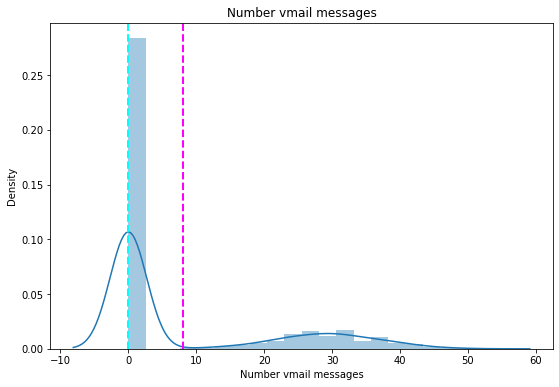

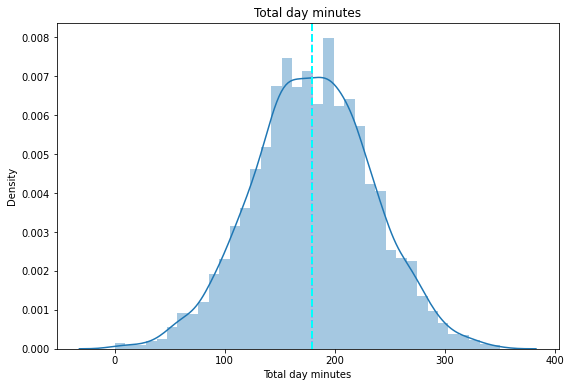

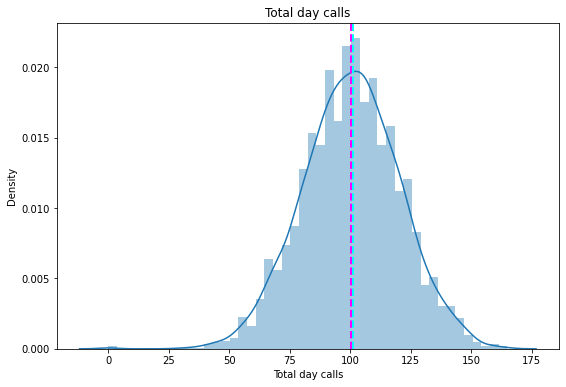

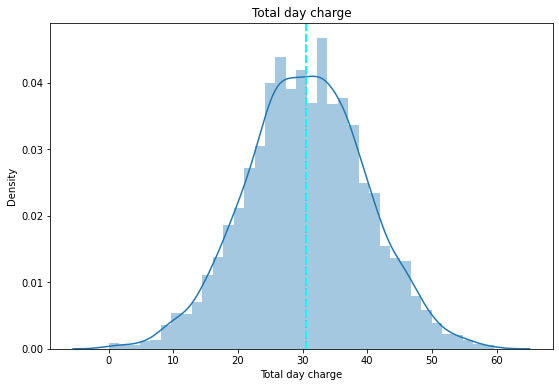

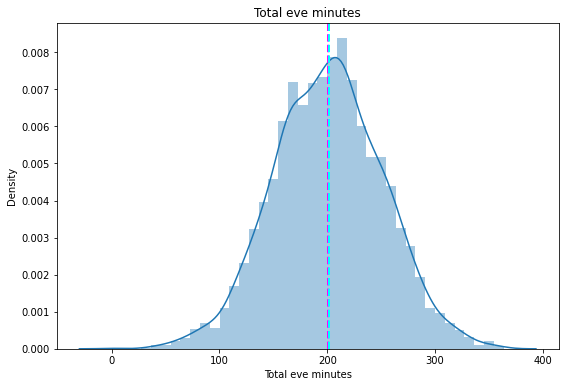

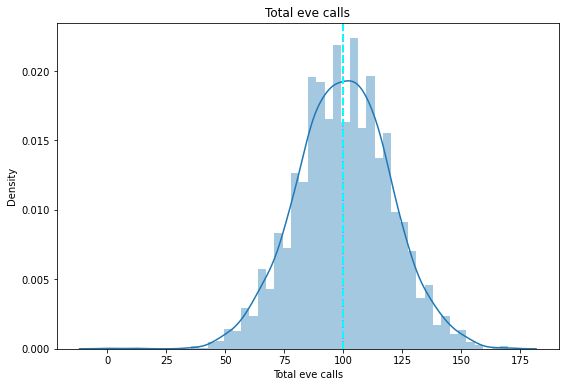

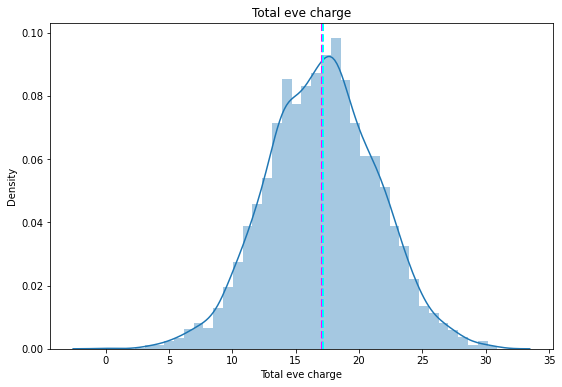

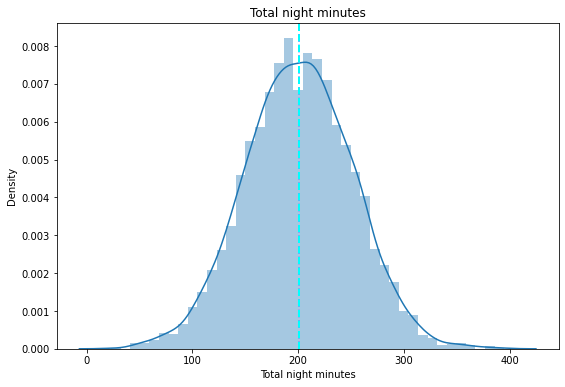

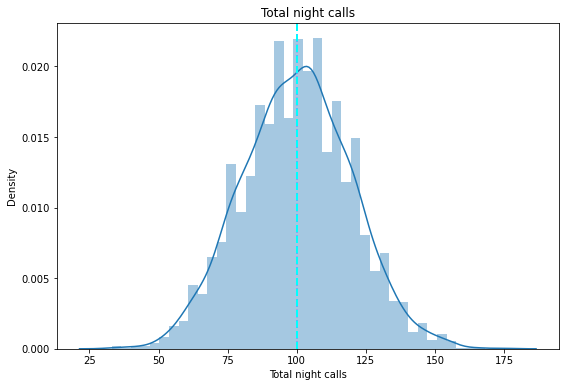

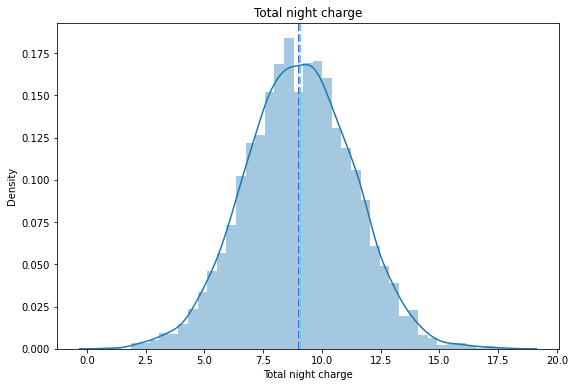

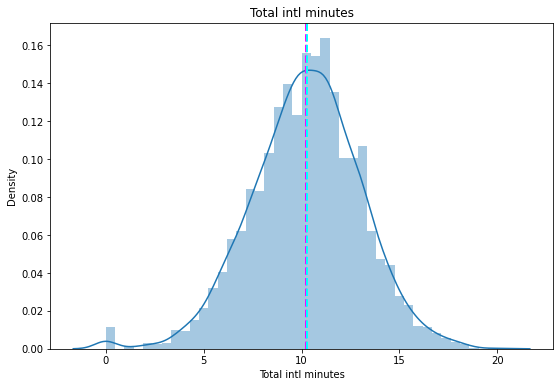

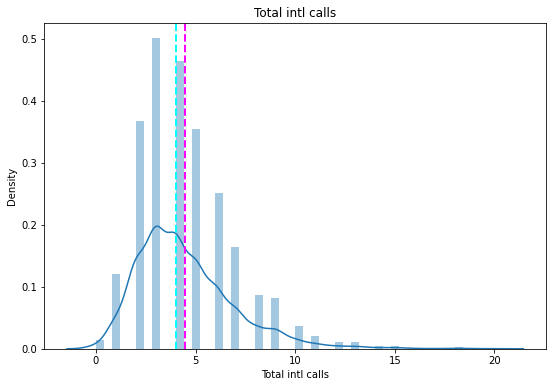

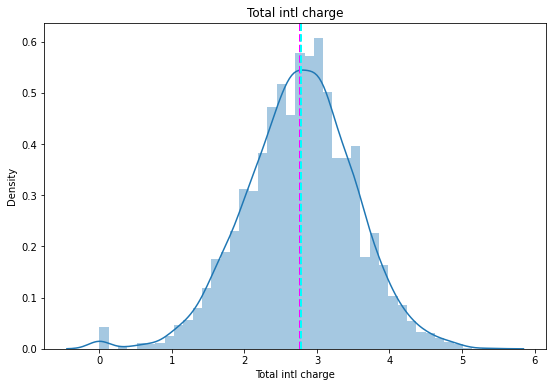

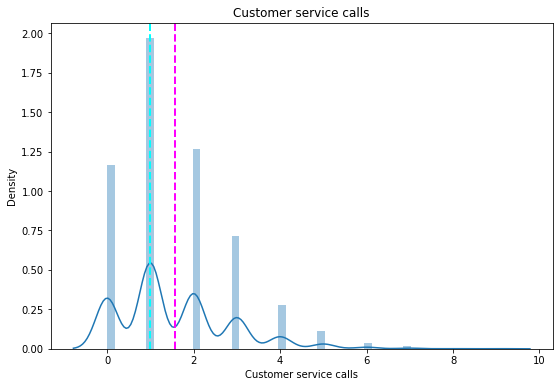

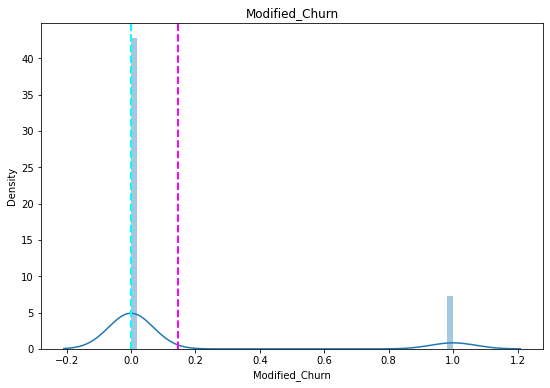

In [186]:
#@Title Default Title Text
#plot a bar plot for each numerical feature count with Dist Plot
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

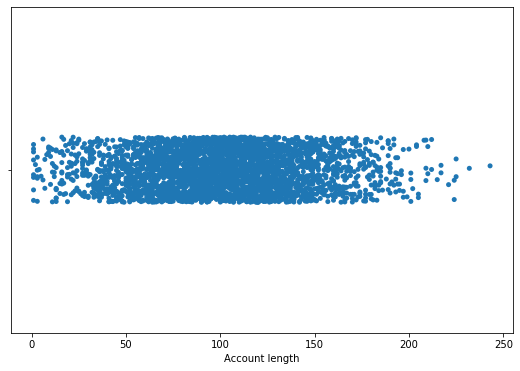

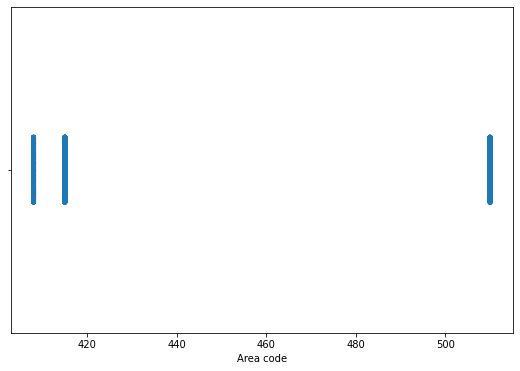

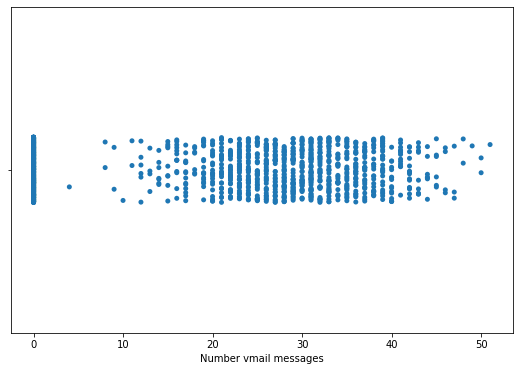

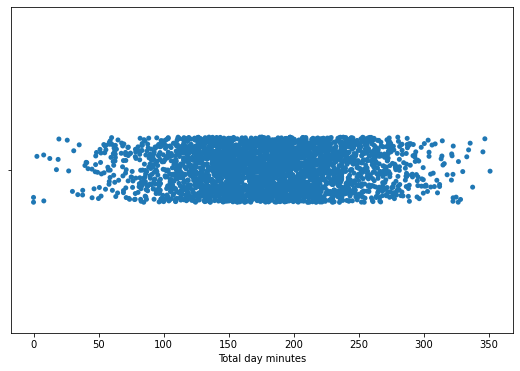

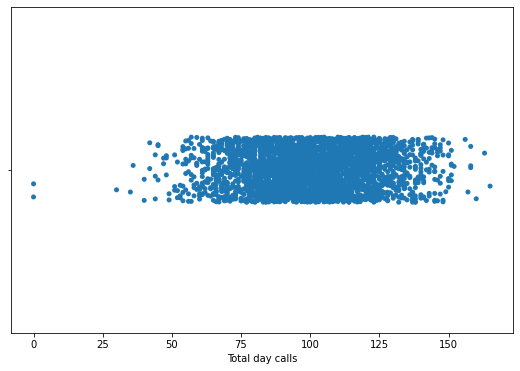

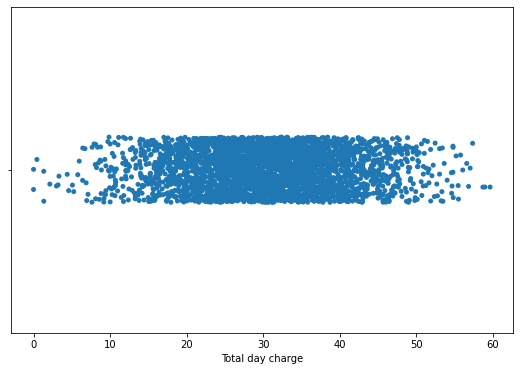

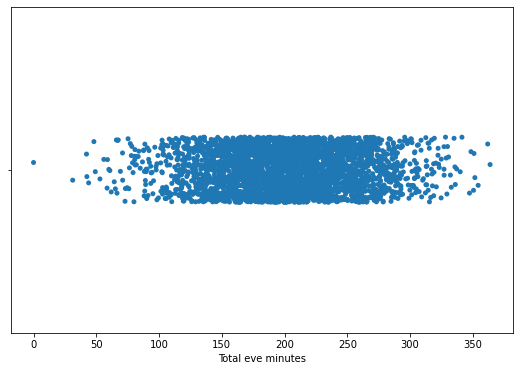

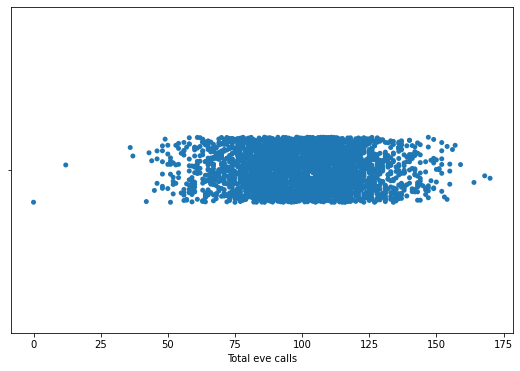

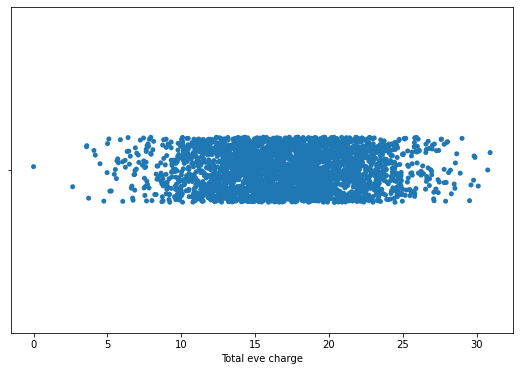

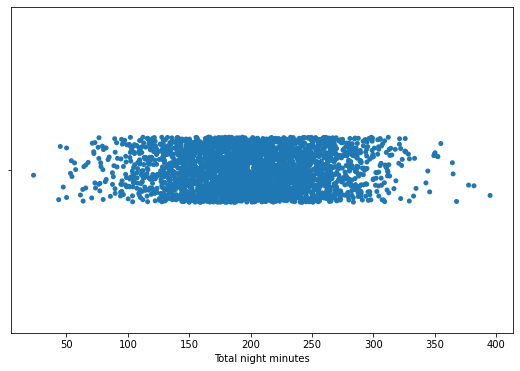

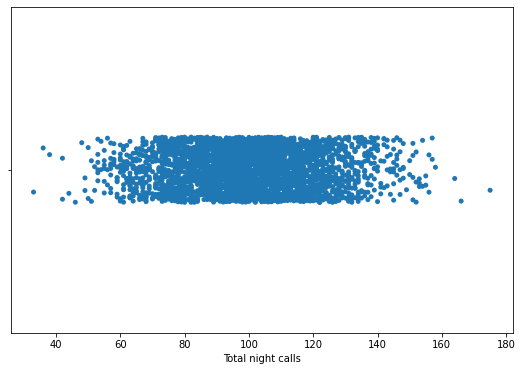

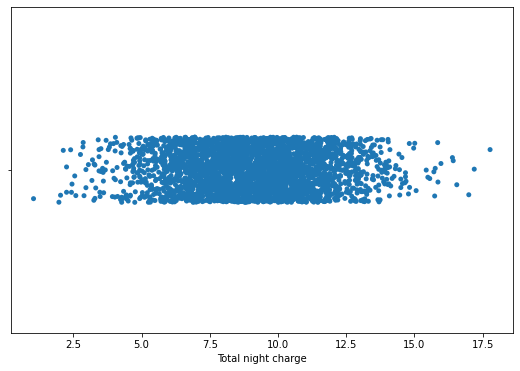

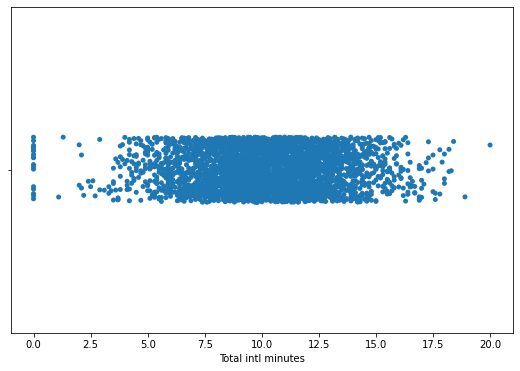

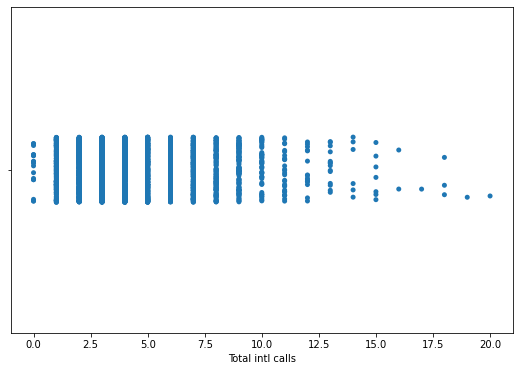

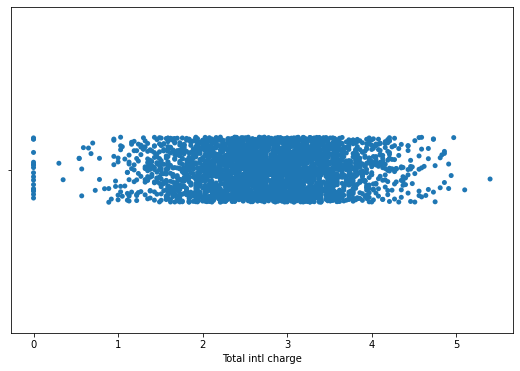

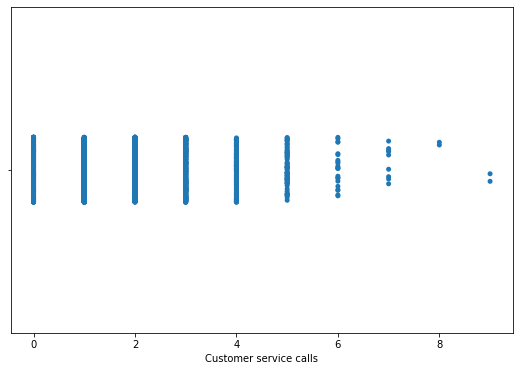

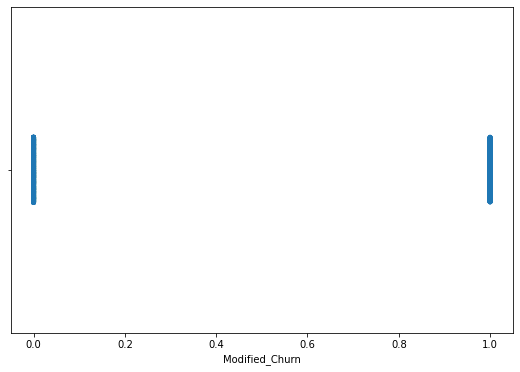

In [187]:
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

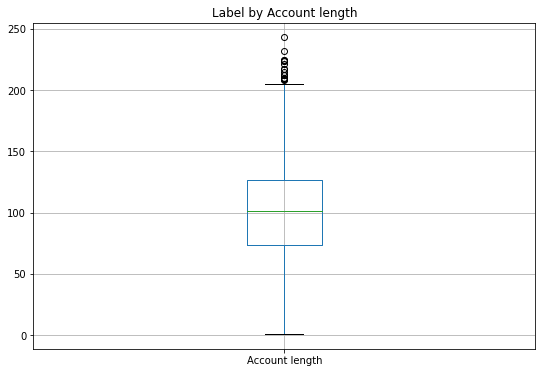

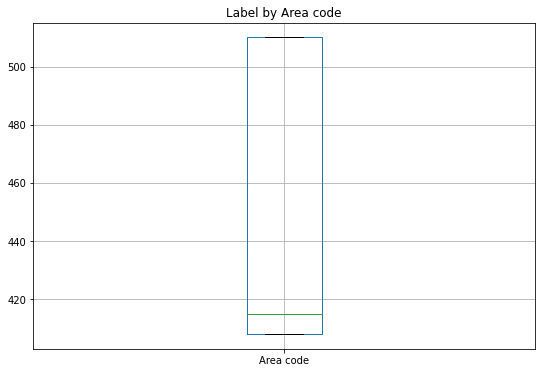

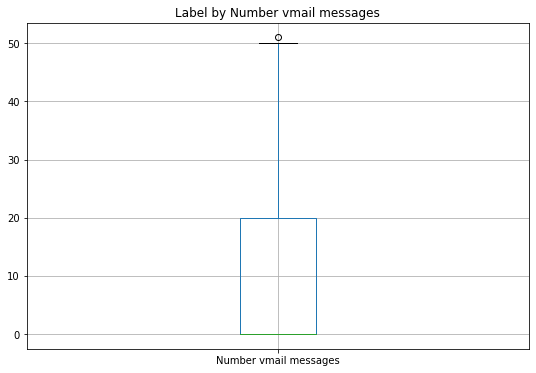

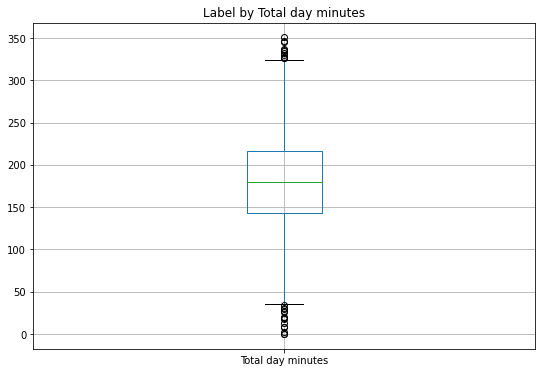

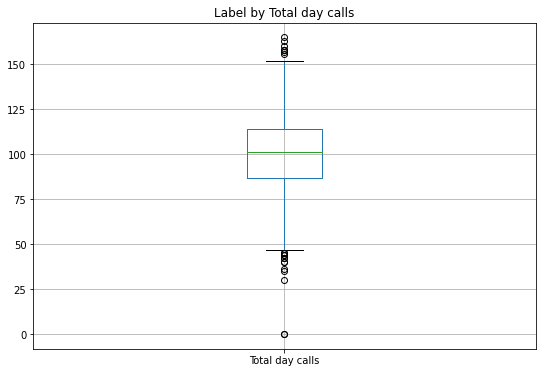

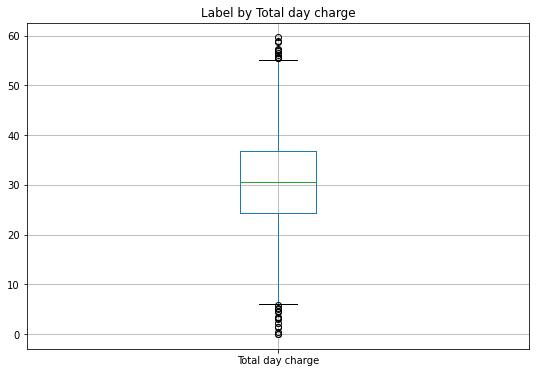

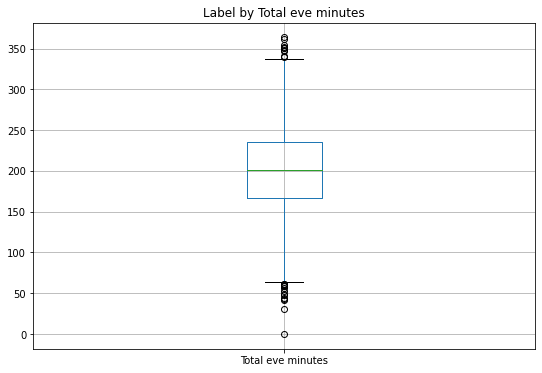

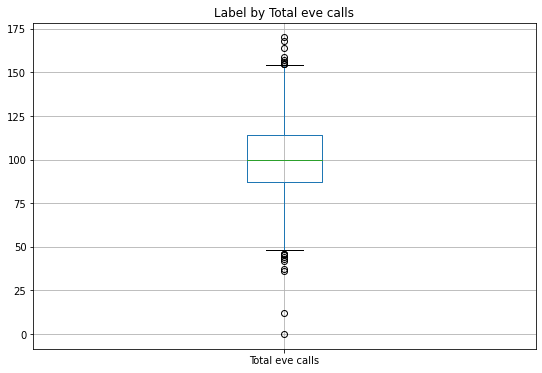

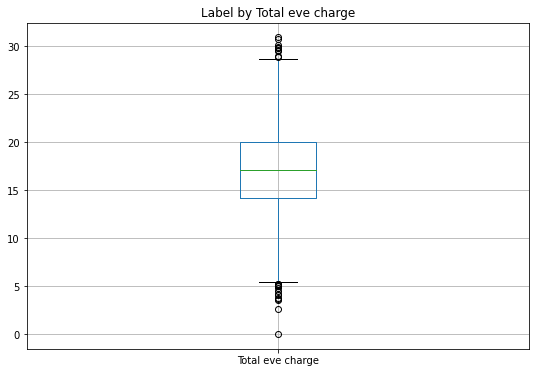

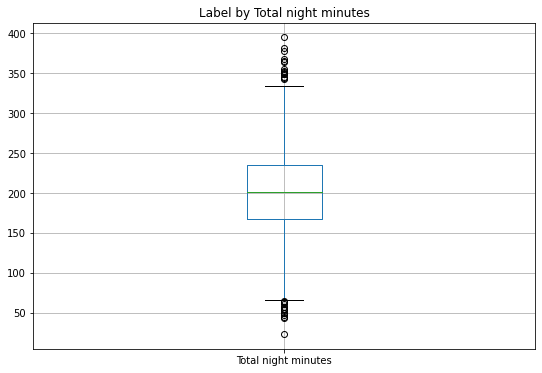

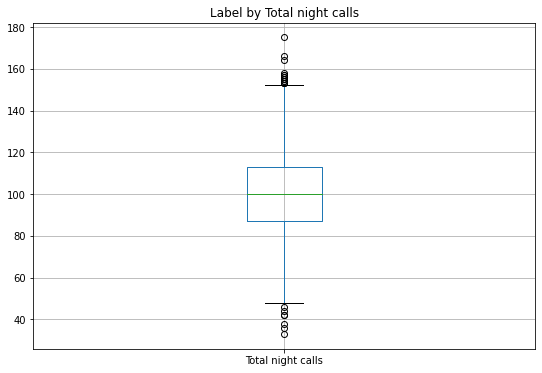

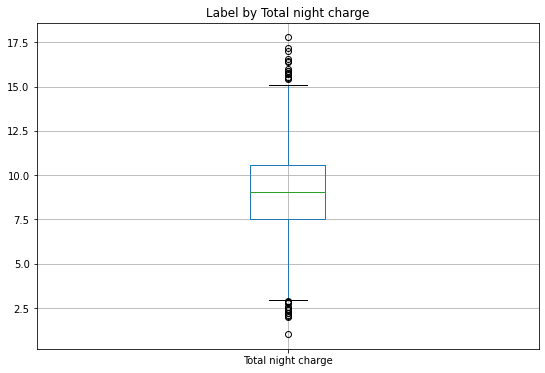

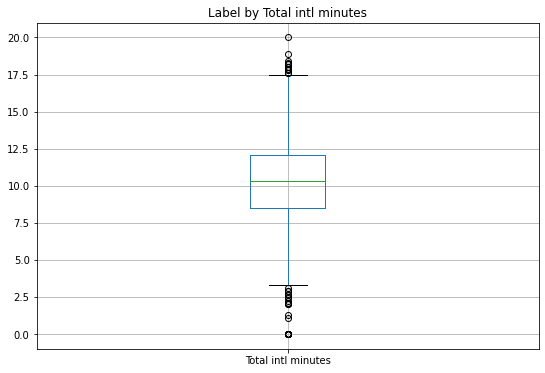

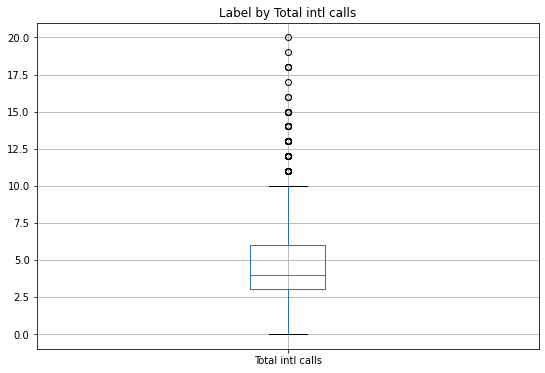

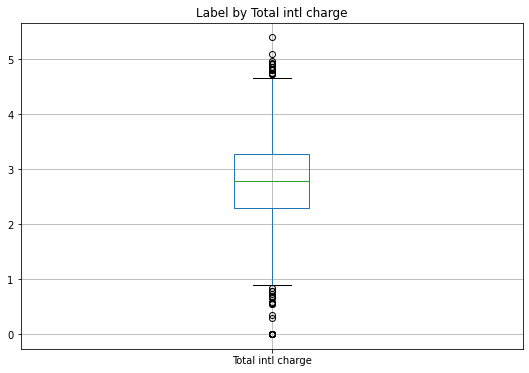

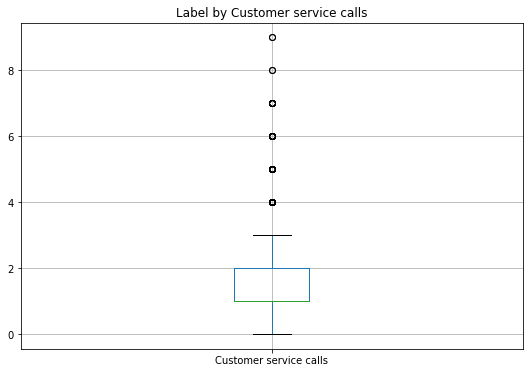

In [188]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

In [189]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

**Bivariate Analysis**

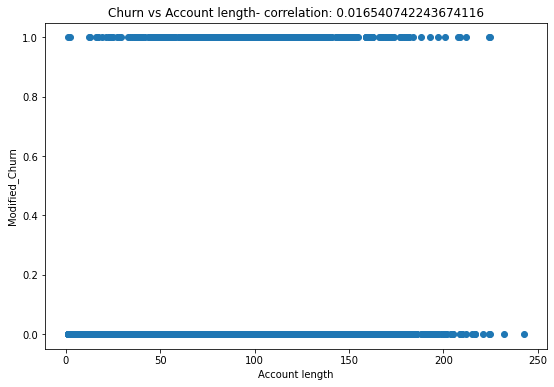

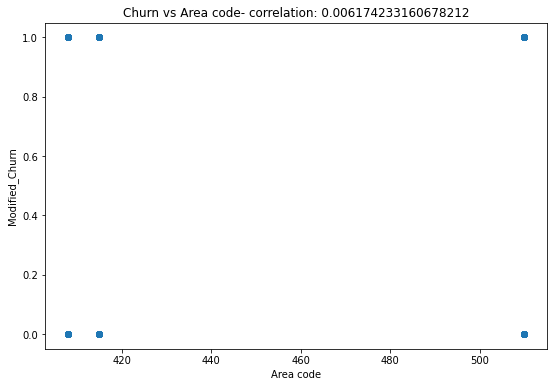

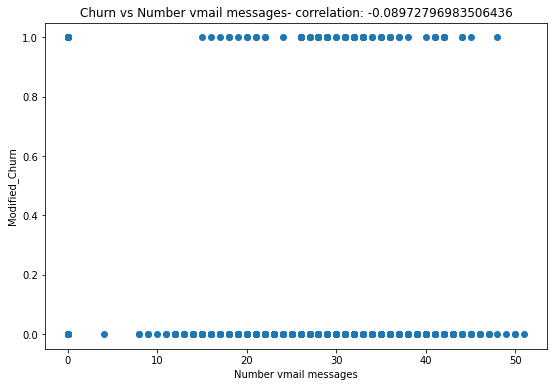

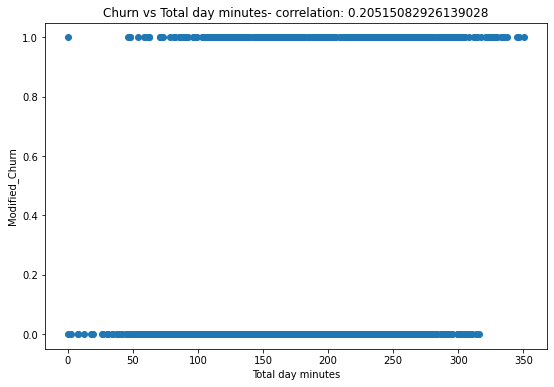

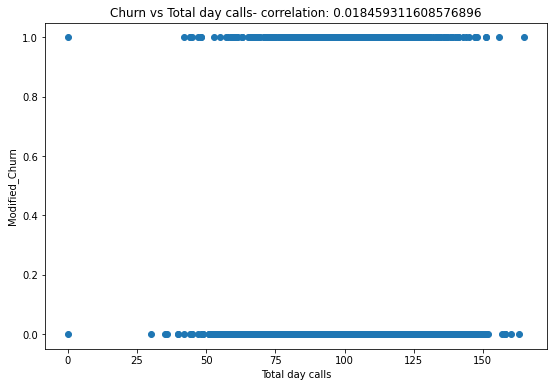

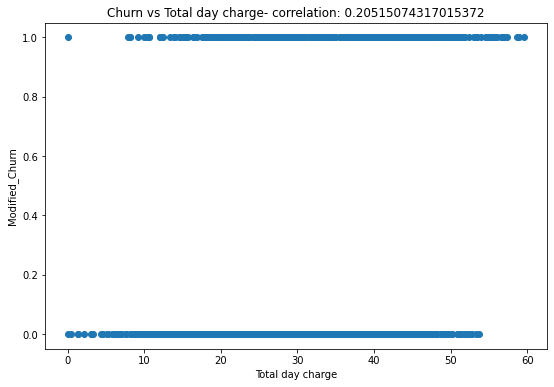

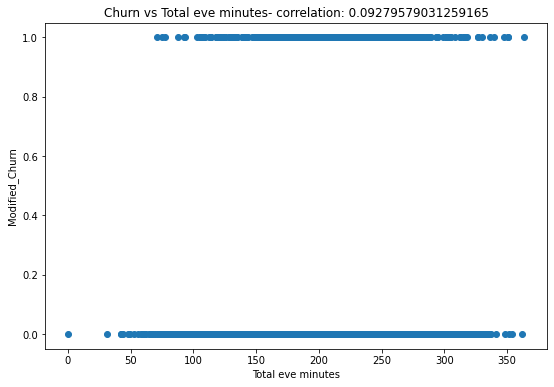

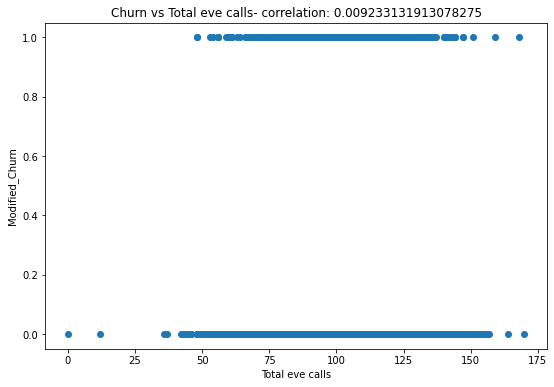

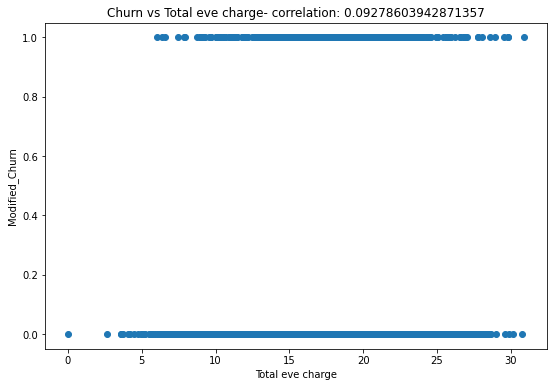

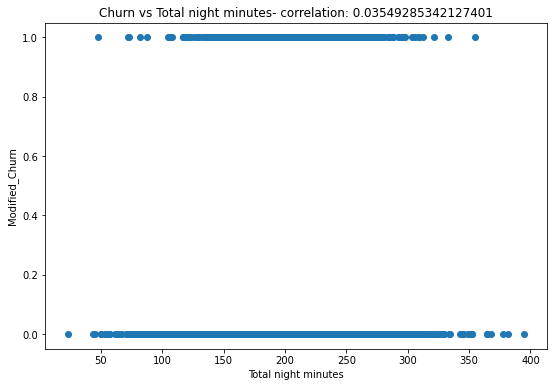

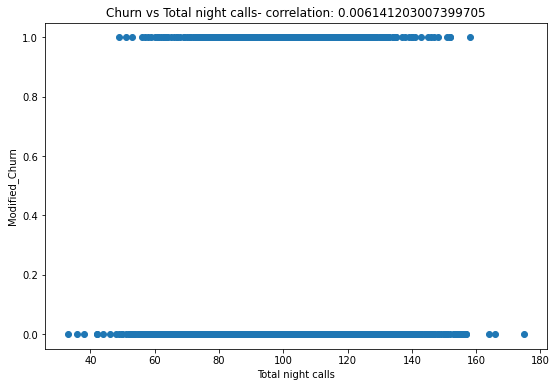

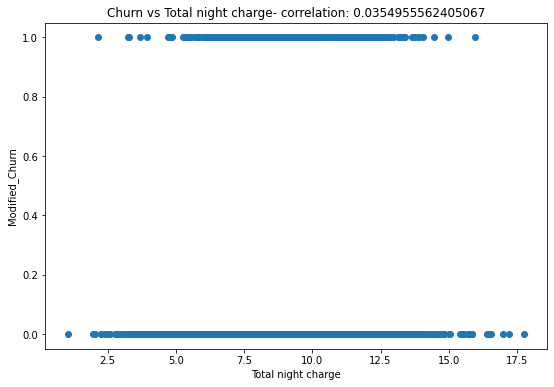

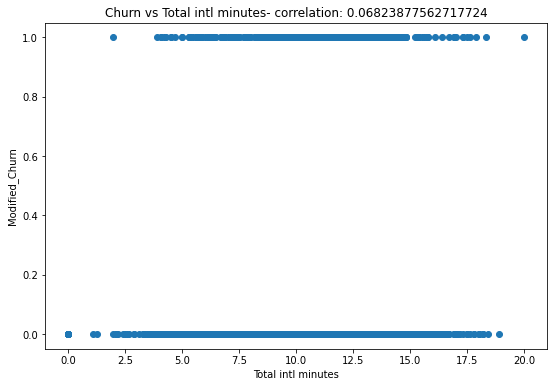

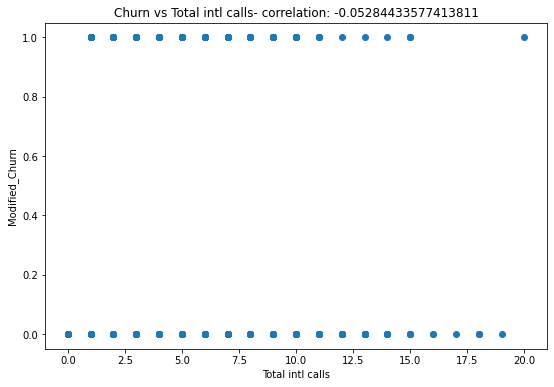

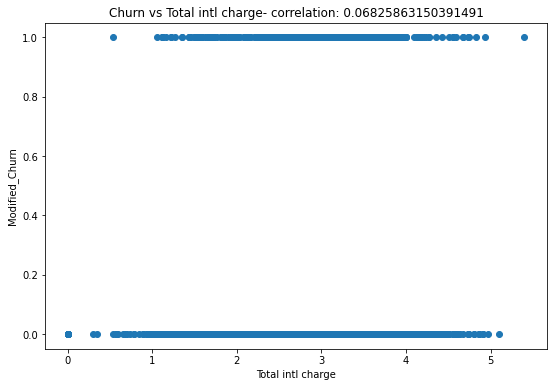

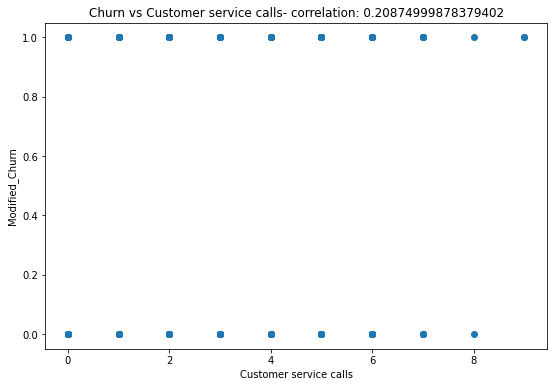

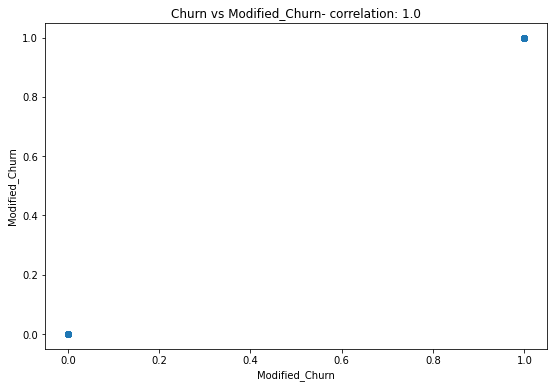

In [190]:
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=dataset[col]
  label=dataset['Modified_Churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Modified_Churn')
  ax.set_title('Churn vs ' +col +'- correlation: '+ str(correlation))
  #z=np.polyfit(dataset[col], dataset['Modified_Churn'], 1)
  #y_hat = np.poly1d(z)(dataset[col])

  #plt.plot(dataset[col], y_hat, "r--", lw=1)


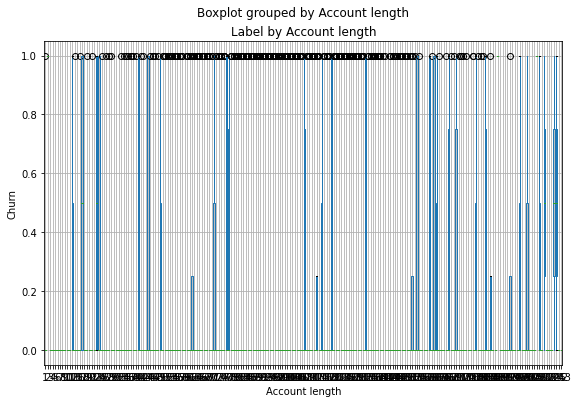

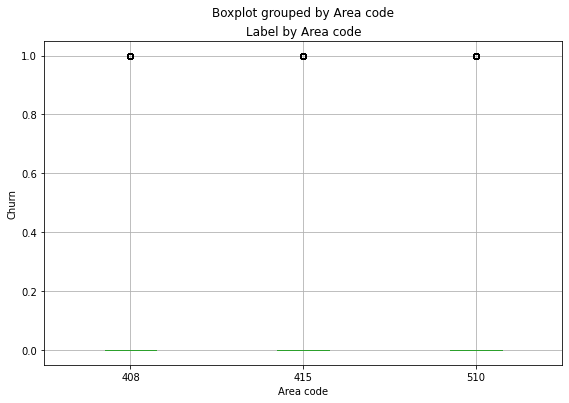

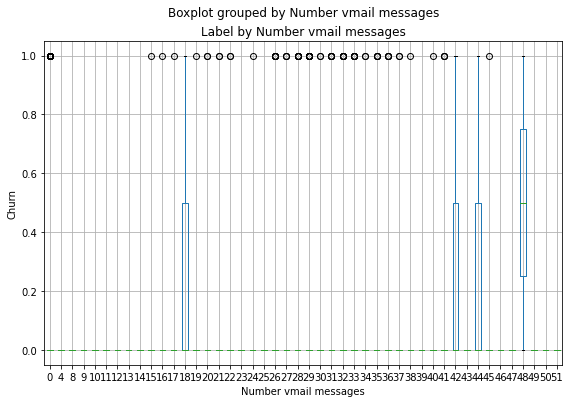

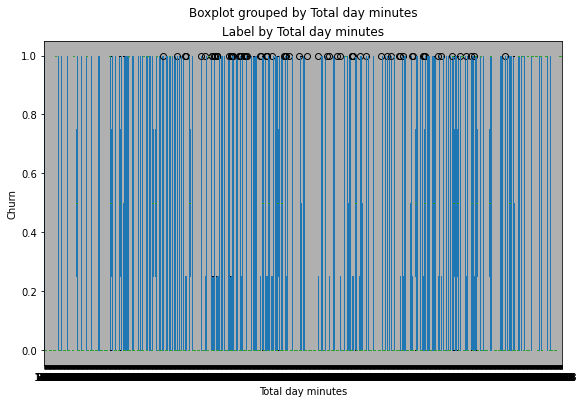

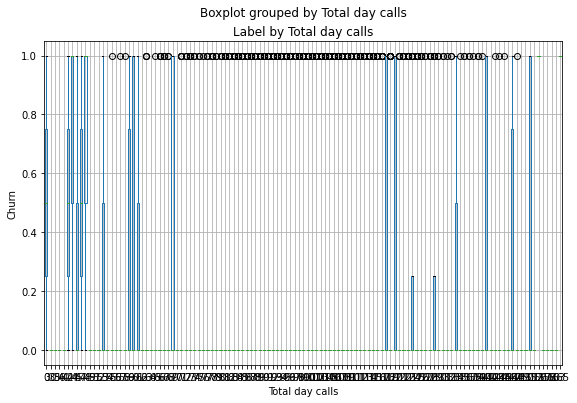

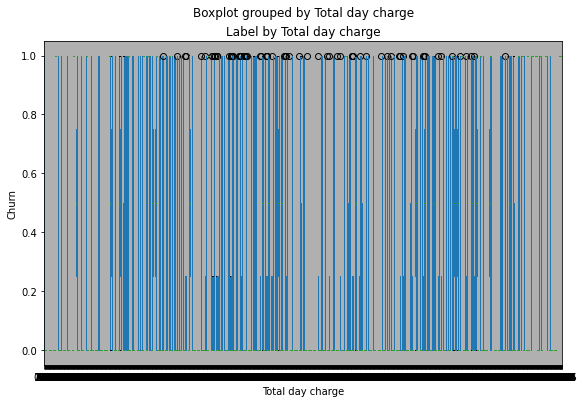

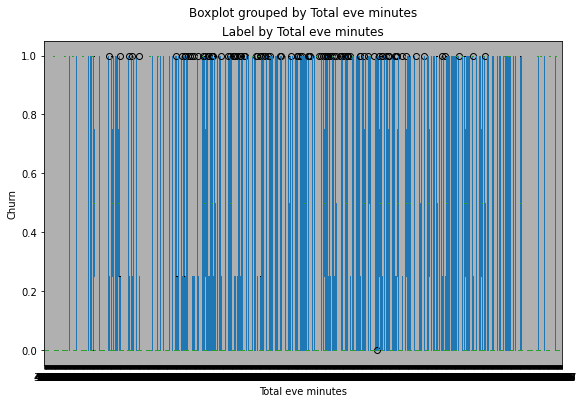

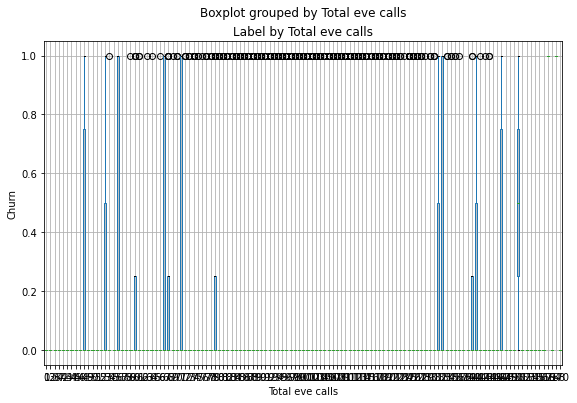

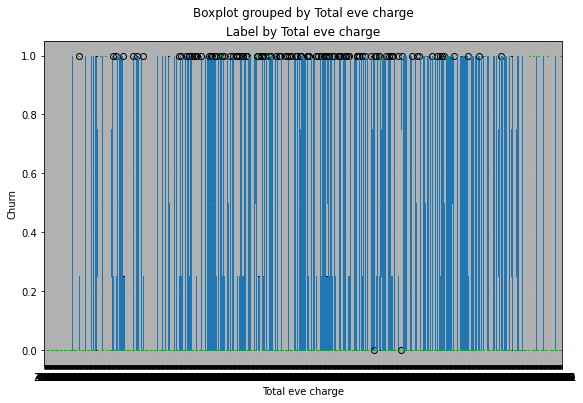

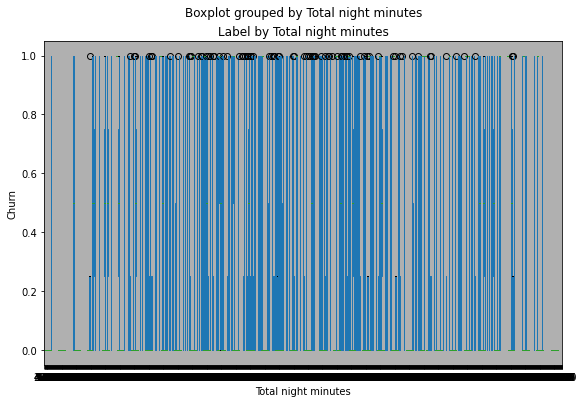

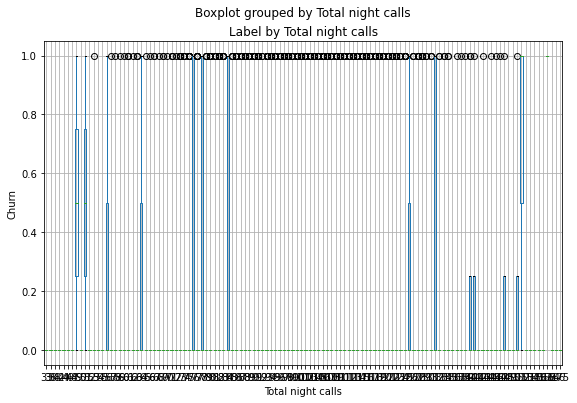

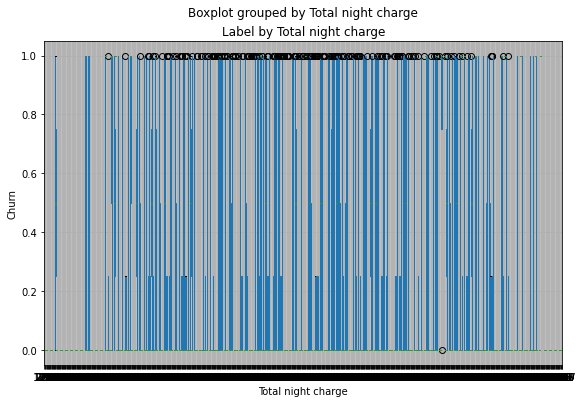

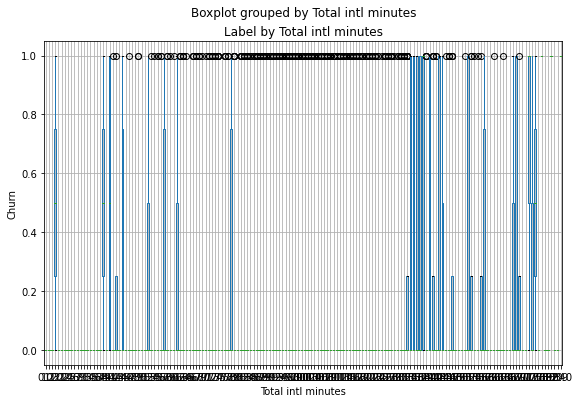

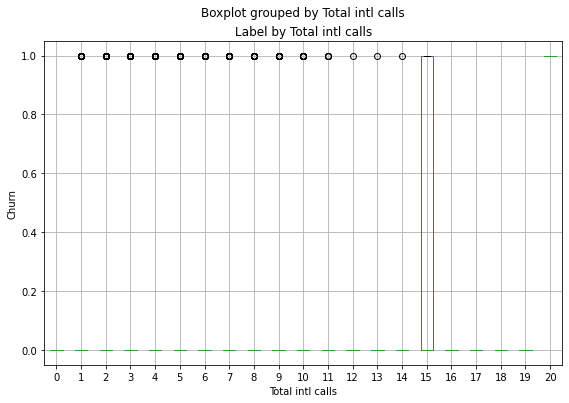

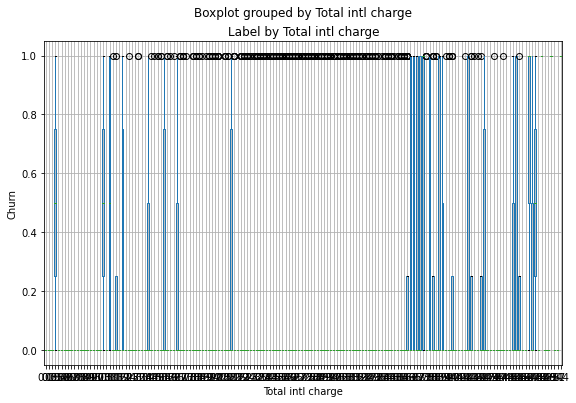

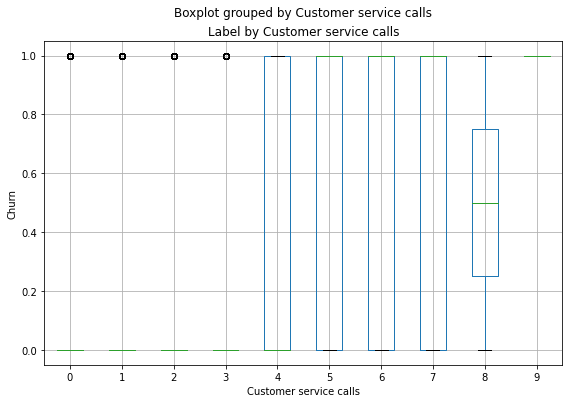

In [191]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Churn', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Churn")
plt.show()

**Correlation**

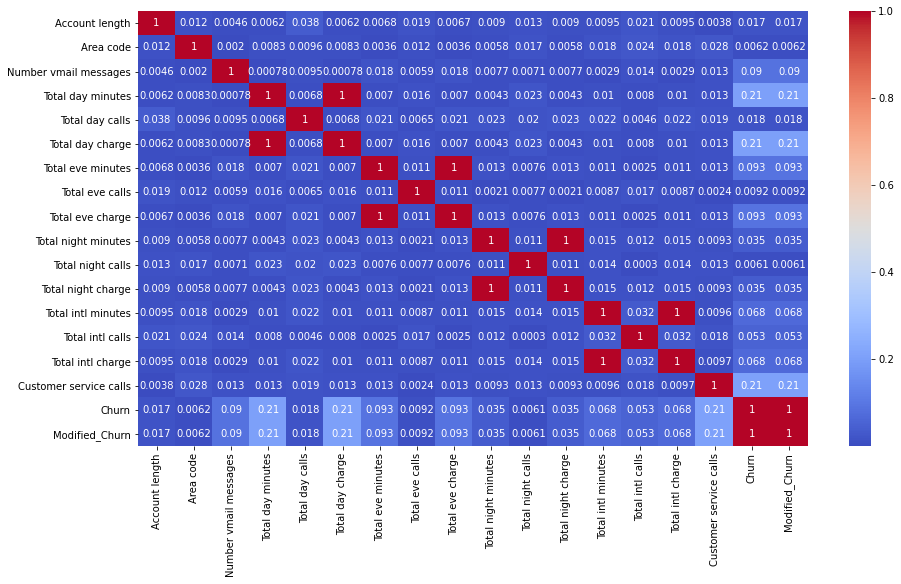

In [192]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [193]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [194]:
corr =abs(dataset.corr())
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

**Multicollinearity**

In [195]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  #Calculating VIF
  vif=pd.DataFrame()
  vif["variables"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return (vif)

In [196]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Account length','Area code']]])

variables           VIF
0    Number vmail messages  1.363109e+00
1        Total day minutes  1.245954e+08
2          Total day calls  2.143888e+01
3         Total day charge  1.245997e+08
4        Total eve minutes  3.736798e+07
5          Total eve calls  2.178102e+01
6         Total eve charge  3.736886e+07
7      Total night minutes  1.071800e+07
8        Total night calls  2.216712e+01
9       Total night charge  1.071772e+07
10      Total intl minutes  9.972128e+05
11        Total intl calls  4.265144e+00
12       Total intl charge  9.976096e+05
13  Customer service calls  2.478680e+00
14          Modified_Churn  1.300101e+00

In [197]:
dataset['international_rate_per_min']=dataset['Total intl charge']/dataset['Total intl minutes']

In [198]:
corr =abs(dataset.corr())
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [199]:
dataset.fillna(0, inplace=True)

In [200]:
dataset[dataset['Total intl charge']==0]

State  Account length  ...  Modified_Churn international_rate_per_min
179     KS              70  ...               0                        0.0
343     IN              98  ...               0                        0.0
488     VT             165  ...               0                        0.0
595     HI              87  ...               0                        0.0
712     MO             106  ...               0                        0.0
878     WI              62  ...               0                        0.0
1028    KS              70  ...               0                        0.0
1080    OH             114  ...               0                        0.0
1400    VA             115  ...               0                        0.0
1564    VT             137  ...               0                        0.0
2345    FL              98  ...               0                        0.0
2362    ND             101  ...               0                        0.0
2513    NY              86  ...               0                        0.0
2733    NM             158  ...               0                        0.0
2906    CA              87  ...               0                        0.0
2918    MA              58  ...               0                        0.0
3275    NY             120  ...               0                        0.0
3290    CA             127  ...               0                        0.0

[18 rows x 22 columns]

In [201]:
dataset.isnull()

State  Account length  ...  Modified_Churn  international_rate_per_min
0     False           False  ...           False                       False
1     False           False  ...           False                       False
2     False           False  ...           False                       False
3     False           False  ...           False                       False
4     False           False  ...           False                       False
...     ...             ...  ...             ...                         ...
3328  False           False  ...           False                       False
3329  False           False  ...           False                       False
3330  False           False  ...           False                       False
3331  False           False  ...           False                       False
3332  False           False  ...           False                       False

[3333 rows x 22 columns]

In [202]:
dataset[dataset['Total intl minutes']==0]

State  Account length  ...  Modified_Churn international_rate_per_min
179     KS              70  ...               0                        0.0
343     IN              98  ...               0                        0.0
488     VT             165  ...               0                        0.0
595     HI              87  ...               0                        0.0
712     MO             106  ...               0                        0.0
878     WI              62  ...               0                        0.0
1028    KS              70  ...               0                        0.0
1080    OH             114  ...               0                        0.0
1400    VA             115  ...               0                        0.0
1564    VT             137  ...               0                        0.0
2345    FL              98  ...               0                        0.0
2362    ND             101  ...               0                        0.0
2513    NY              86  ...               0                        0.0
2733    NM             158  ...               0                        0.0
2906    CA              87  ...               0                        0.0
2918    MA              58  ...               0                        0.0
3275    NY             120  ...               0                        0.0
3290    CA             127  ...               0                        0.0

[18 rows x 22 columns]

In [203]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Total intl minutes','Total intl charge','Modified_Churn','Account length','Area code']]])

variables           VIF
0        Number vmail messages  1.352229e+00
1            Total day minutes  1.246068e+08
2              Total day calls  2.362553e+01
3             Total day charge  1.246110e+08
4            Total eve minutes  3.736408e+07
5              Total eve calls  2.444996e+01
6             Total eve charge  3.736517e+07
7          Total night minutes  1.071679e+07
8            Total night calls  2.489652e+01
9           Total night charge  1.071646e+07
10            Total intl calls  4.398383e+00
11      Customer service calls  2.398588e+00
12  international_rate_per_min  7.654414e+01

In [204]:
final_numerical_features=calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Total intl minutes','Total intl charge','Modified_Churn','Account length','Area code']]]).variables.tolist()
final_numerical_features

['Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl calls',
 'Customer service calls',
 'international_rate_per_min']

## **Handling Categorical Features**

In [205]:
# Catagorical
dataset.head()

State  Account length  ...  Modified_Churn international_rate_per_min
0    KS             128  ...               0                   0.270000
1    OH             107  ...               0                   0.270073
2    NJ             137  ...               0                   0.269672
3    OH              84  ...               0                   0.269697
4    OK              75  ...               0                   0.270297

[5 rows x 22 columns]

In [206]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       3333 non-null   object 
 1   Account length              3333 non-null   int64  
 2   Area code                   3333 non-null   int64  
 3   International plan          3333 non-null   object 
 4   Voice mail plan             3333 non-null   object 
 5   Number vmail messages       3333 non-null   int64  
 6   Total day minutes           3333 non-null   float64
 7   Total day calls             3333 non-null   int64  
 8   Total day charge            3333 non-null   float64
 9   Total eve minutes           3333 non-null   float64
 10  Total eve calls             3333 non-null   int64  
 11  Total eve charge            3333 non-null   float64
 12  Total night minutes         3333 non-null   float64
 13  Total night calls           3333 

**Univariate Analysis**

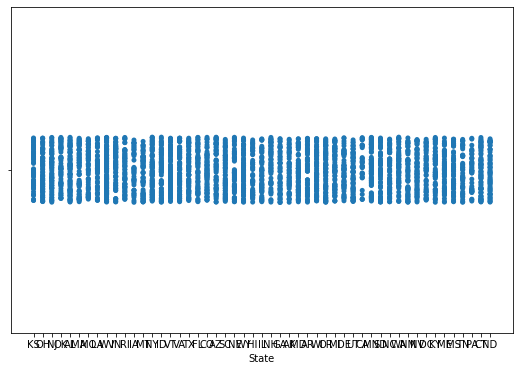

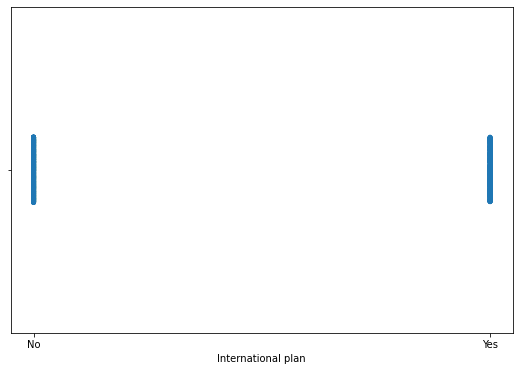

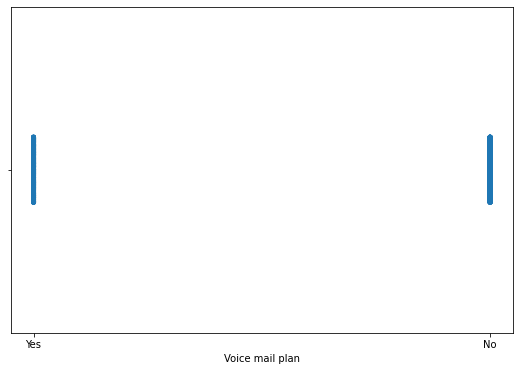

In [207]:
for col in categorical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

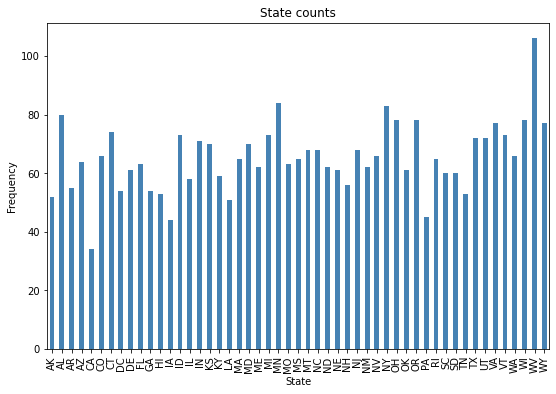

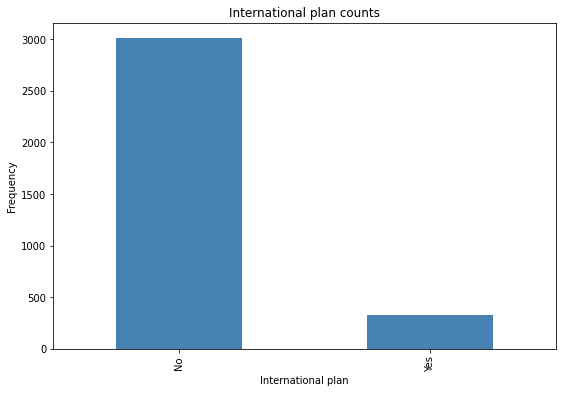

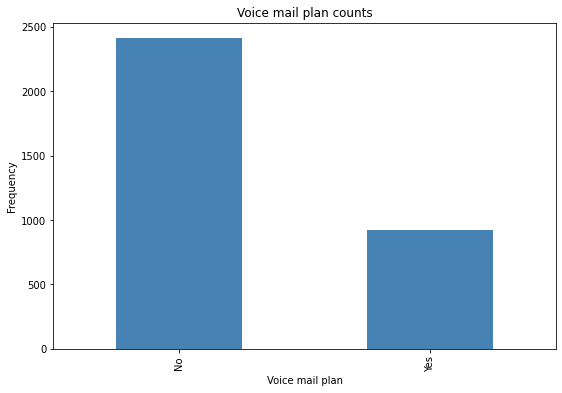

In [208]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

**Bivariate Analysis**

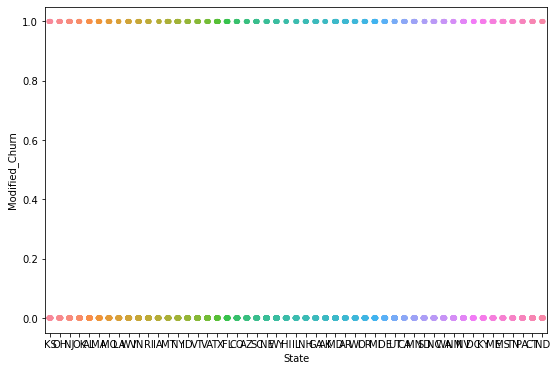

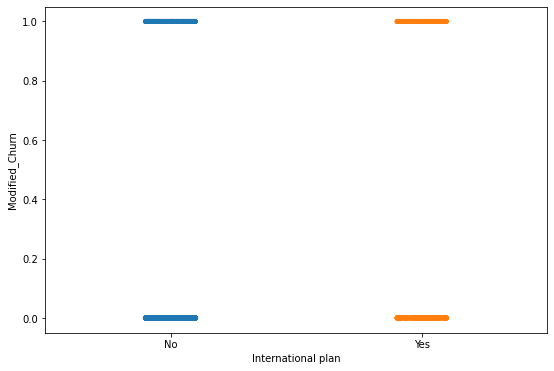

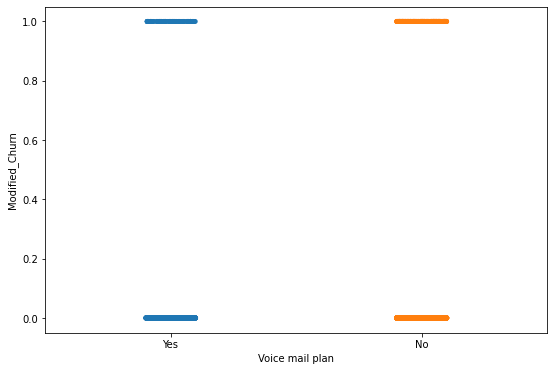

In [209]:
for col in categorical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(x=dataset[col],y=dataset.Modified_Churn)

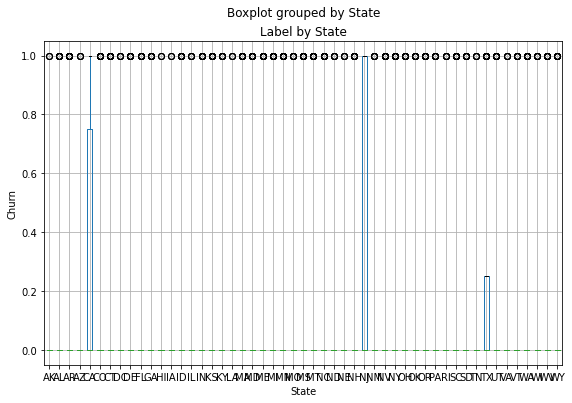

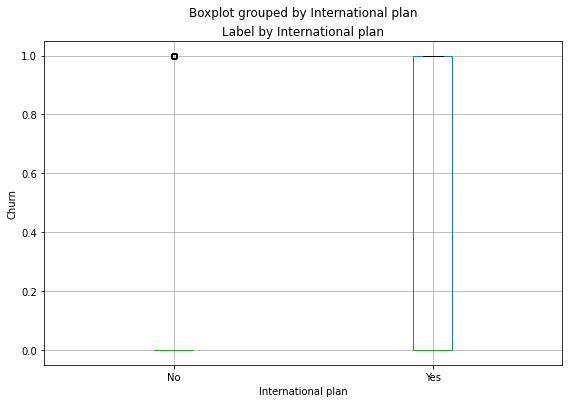

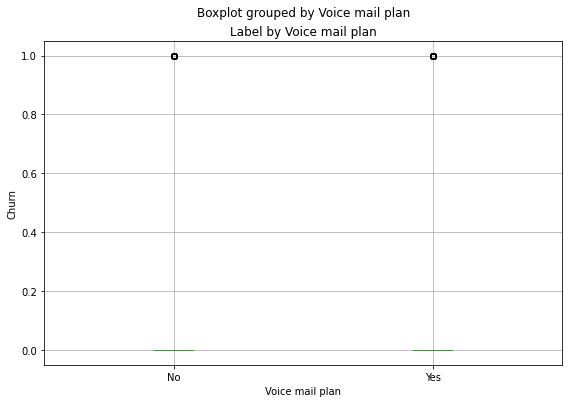

In [210]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Churn', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Churn")
plt.show()

In [211]:
dataset.head()

State  Account length  ...  Modified_Churn international_rate_per_min
0    KS             128  ...               0                   0.270000
1    OH             107  ...               0                   0.270073
2    NJ             137  ...               0                   0.269672
3    OH              84  ...               0                   0.269697
4    OK              75  ...               0                   0.270297

[5 rows x 22 columns]

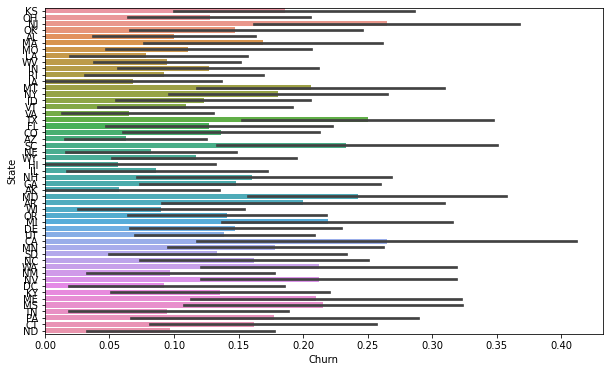

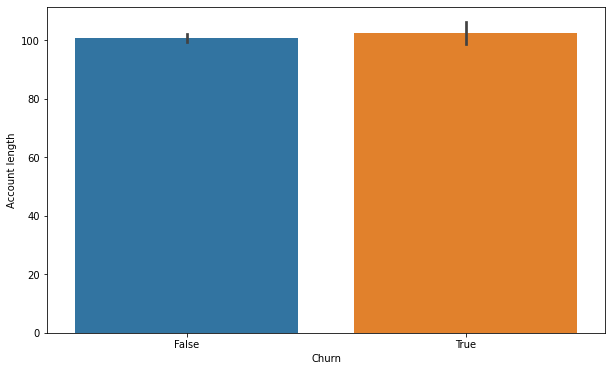

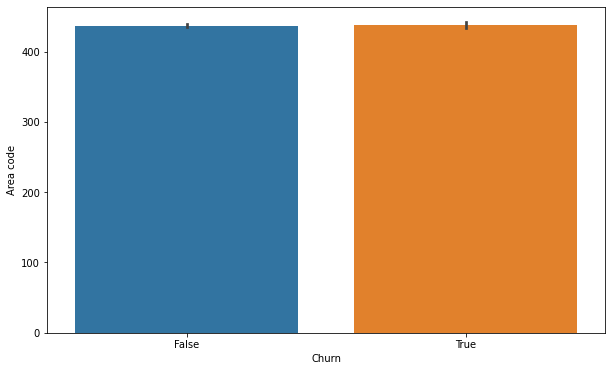

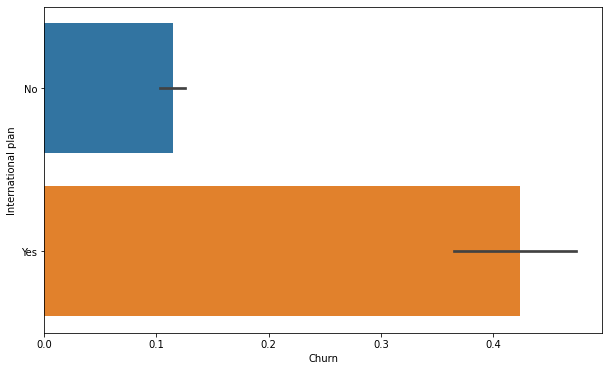

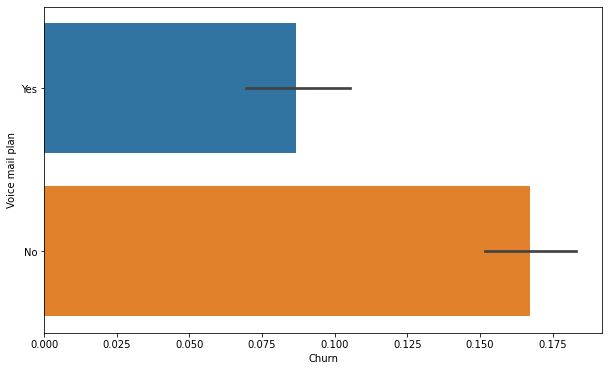

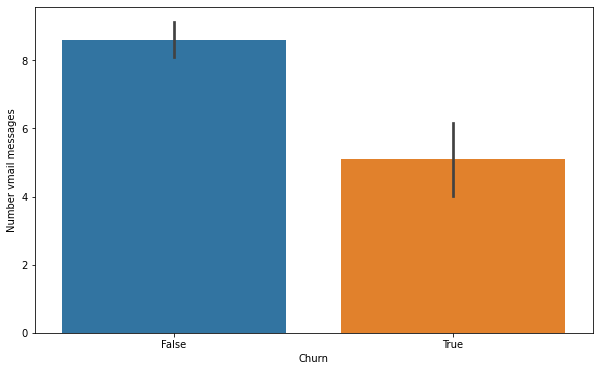

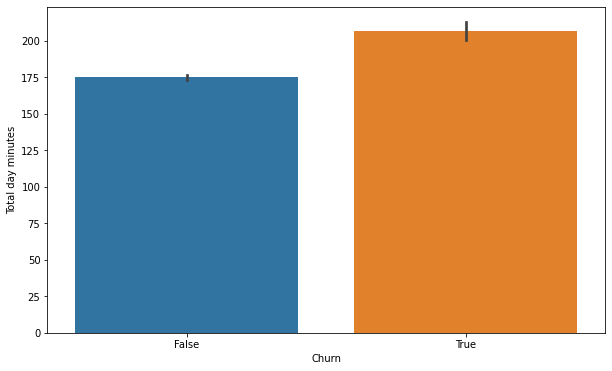

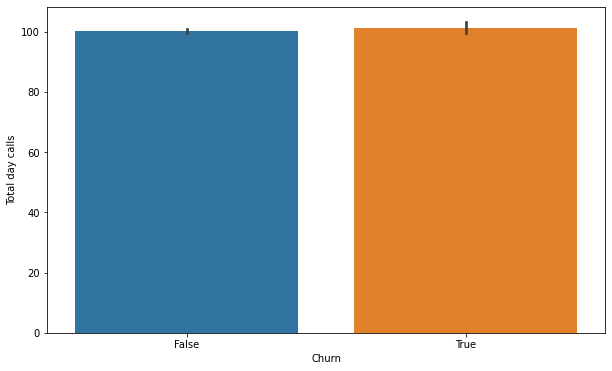

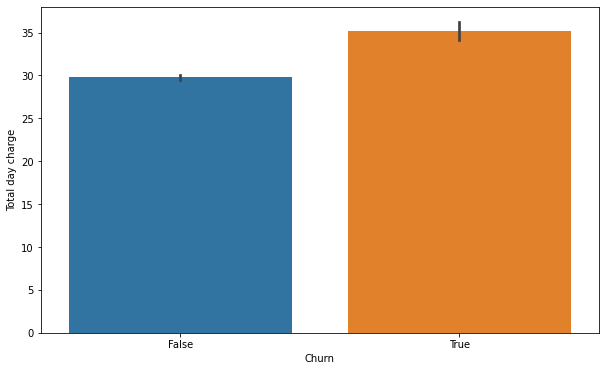

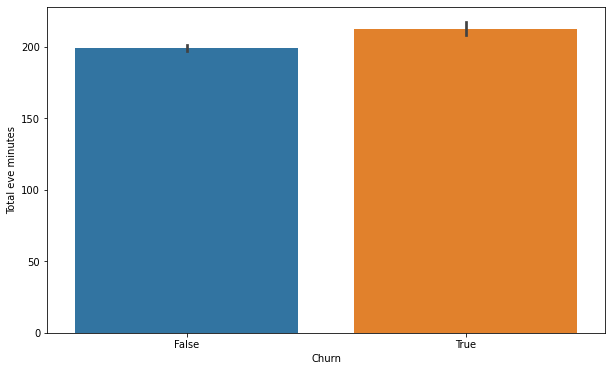

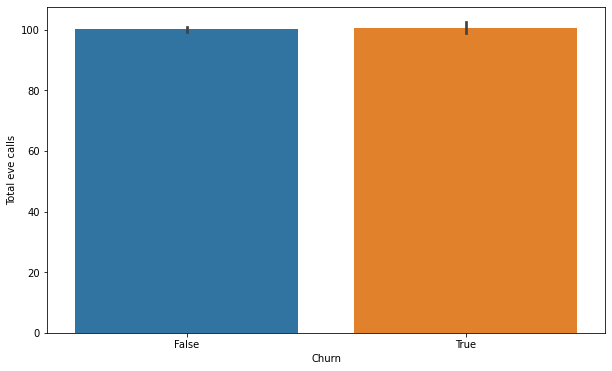

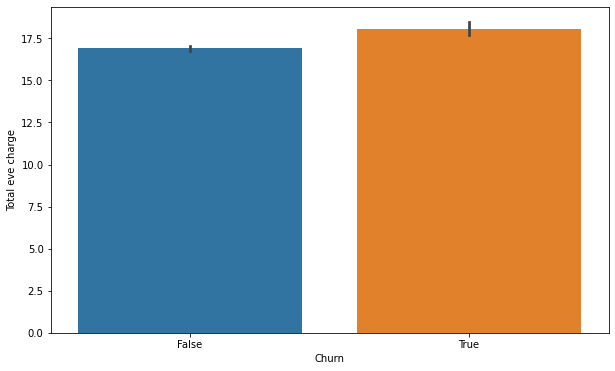

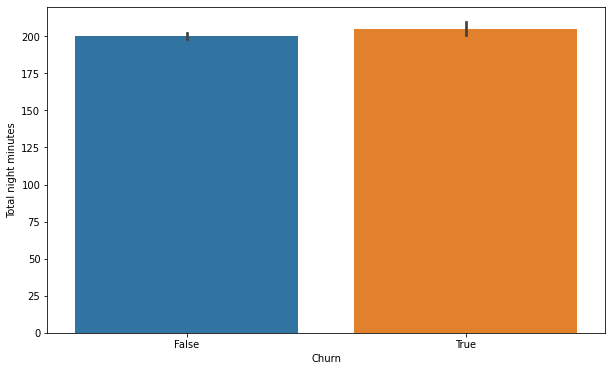

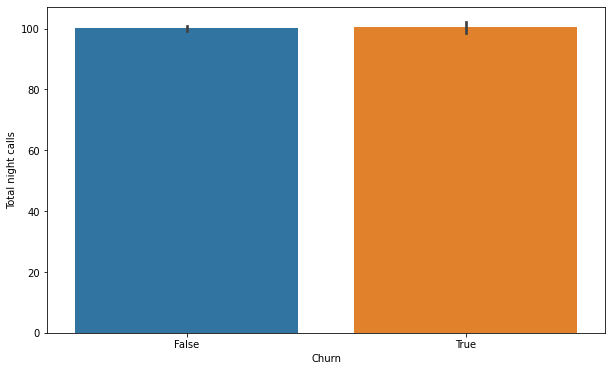

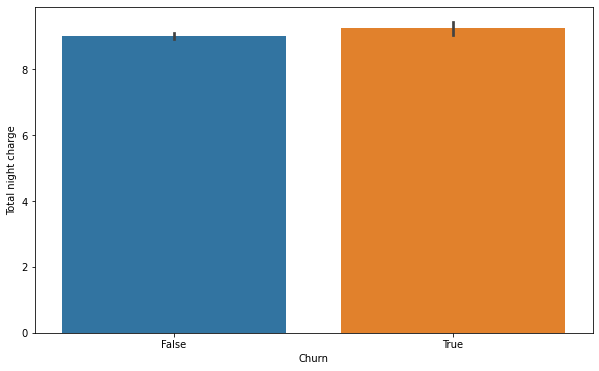

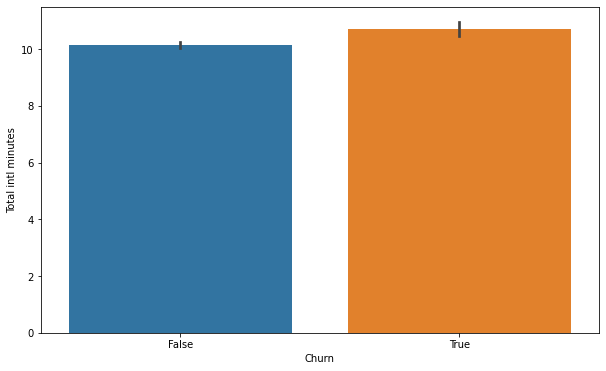

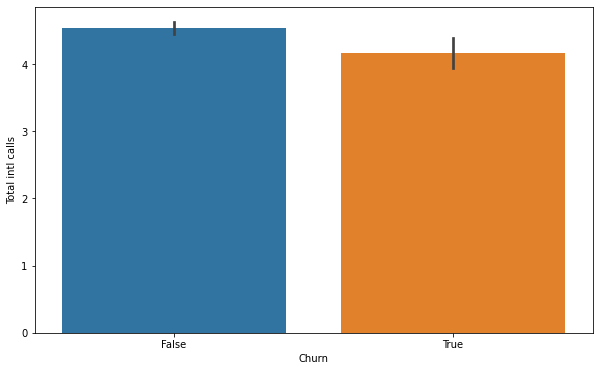

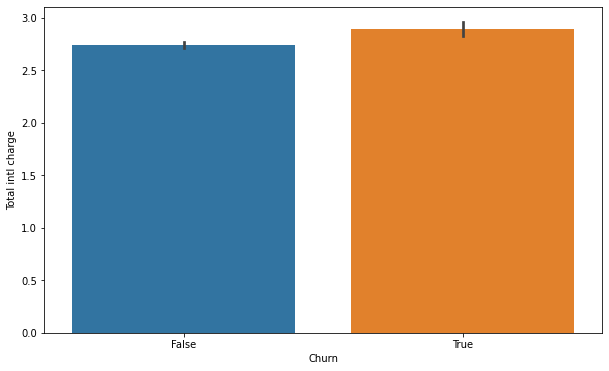

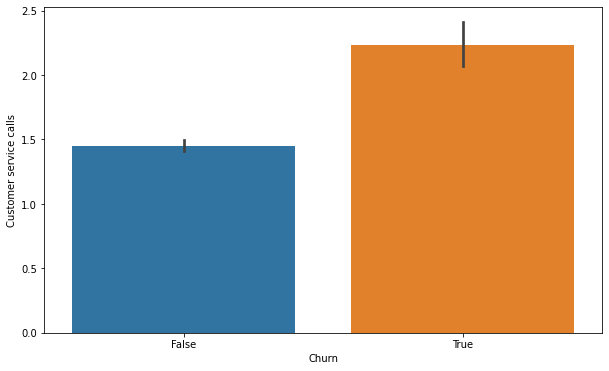

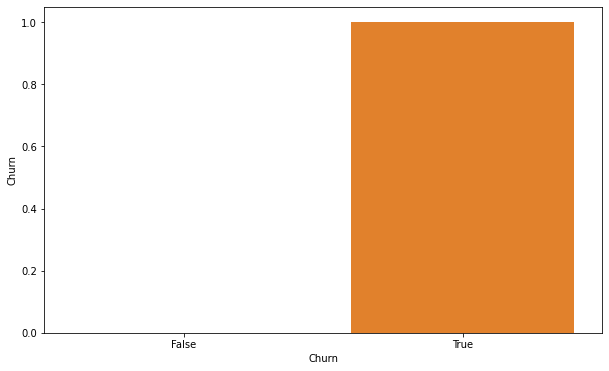

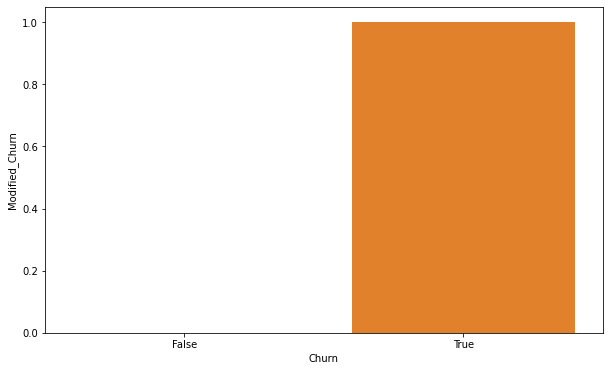

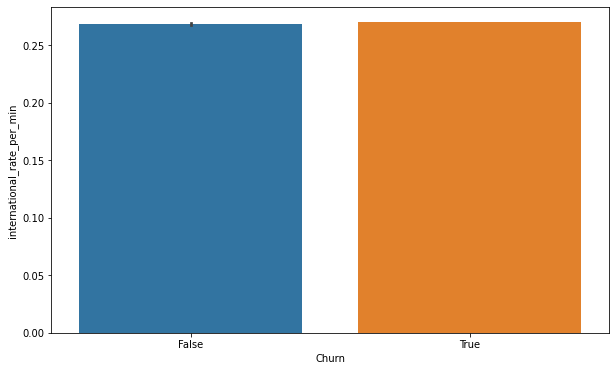

In [212]:
for col in dataset.columns.tolist():
  plt.figure(figsize=(10, 6))
  sns.barplot(y=col, x='Churn', data=dataset)

In [213]:
def unique_name_no(col):
  print(dataset[col].unique())
  print(dataset[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
51
INTERNATIONAL PLAN
['No' 'Yes']
2
VOICE MAIL PLAN
['Yes' 'No']
2


In [214]:
def modified_Voice_mail_plan(row):
  if (row['Voice mail plan']=='No'):
    val = 0
  
  else:
    val = 1
  
  return val

In [215]:
def modified_International_plan(row):
  if (row['International plan']=='No'):
    val = 0
  
  else:
    val = 1
  
  return val

In [216]:
dataset['Modified_International_plan'] = dataset.apply(modified_International_plan,axis = 1)

In [217]:
dataset['Modified_Voice_mail_plan'] = dataset.apply(modified_Voice_mail_plan,axis = 1)

In [218]:
dataset.head()

State  Account length  ...  Modified_International_plan Modified_Voice_mail_plan
0    KS             128  ...                            0                        1
1    OH             107  ...                            0                        1
2    NJ             137  ...                            0                        0
3    OH              84  ...                            1                        0
4    OK              75  ...                            1                        0

[5 rows x 24 columns]

## **Final PairPlot**

**Multivariate Analysis**

In [219]:
sns.pairplot(dataset, size=3)

Output hidden; open in https://colab.research.google.com to view.

## **Some Additional Experiments only based on True Churn Data and some possible reasons for churning**

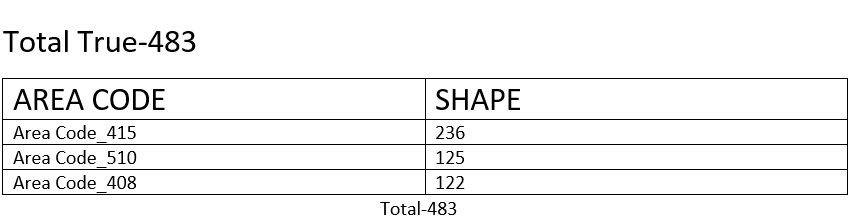

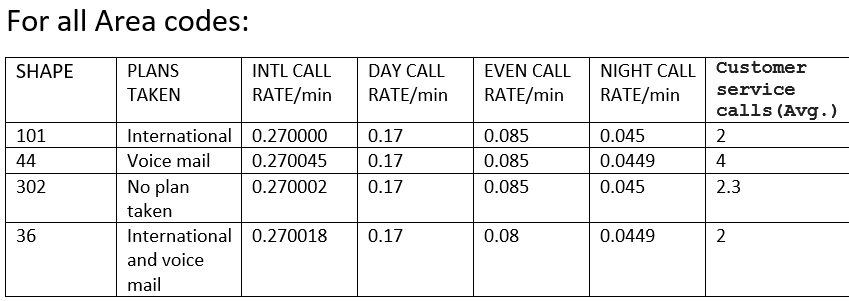

**Reasons for churn those who have taken international plan:**


Because price of  INTL CALL RATE/min for International plan  is same as the price of  INTL CALL RATE/min for NO PLAN. 

Thus there is no extra  benefit for taking International Plan.

**Reasons for churn those who have taken NO plan:**

Because they are unsatisfied with the Customer service calls as the average indicates 2.3.
(it must be between 1-1.5 for no churn)



**Reasons for churn those who have taken VOICE MAIL plan:**

1)   Because they are unsatisfied with the Customer service calls as the average indicates 2.3.(it must be between 1-1.5 for no churn)

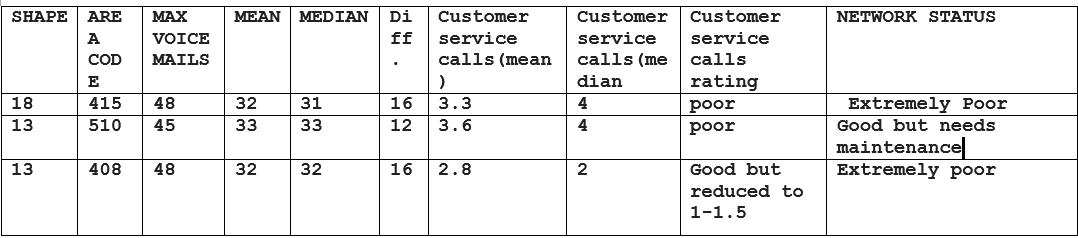

**Reasons for churn those who have taken BOTH INTERNATIONAL AND  VOICE MAIL plan:**

1)Because price of  INTL CALL RATE/min for International plan  is same as the price of  INTL CALL RATE/min for NO PLAN. 
      Thus there is no extra  benefit for taking International Plan.


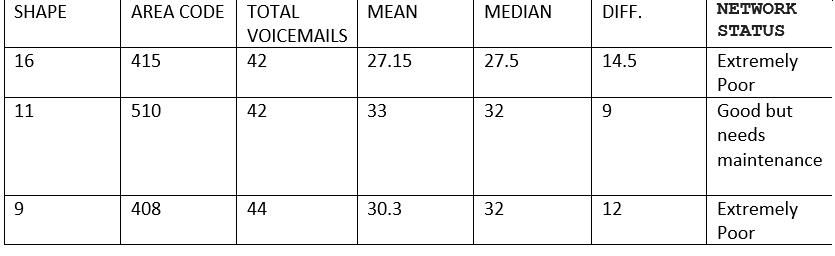

3)	Customer service calls mean is 1-1.7 and it’s good and try to keep between 1-1.5.
    
    Customer service calls(mean)-1.7
      
    Customer service calls(median)-1


I think, for respective area codes those who have taken voice mail plans where there we see a more differnce between the maximum number of vmail sent from that area and the average number of vmail sent for that area. So, here we can conclude like this that 

   May be customers are using voice mail as per their requirement 
   or may be there would be some network unstability for  which they won't able to send  more  voice mails while they get access of around 50 voicemails in voicemail plan but they are using on an average of 25-35.

   on my own experience i know and felt that the voice mail needs more network stability to get sent through.

   If this is the problem , then i have found some states with poor network status and some states network needs  maintenence.  

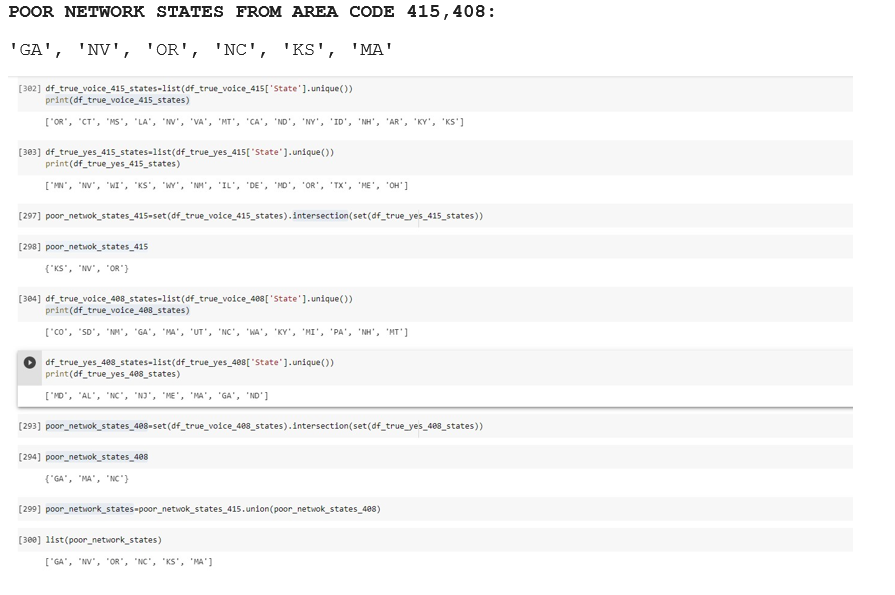

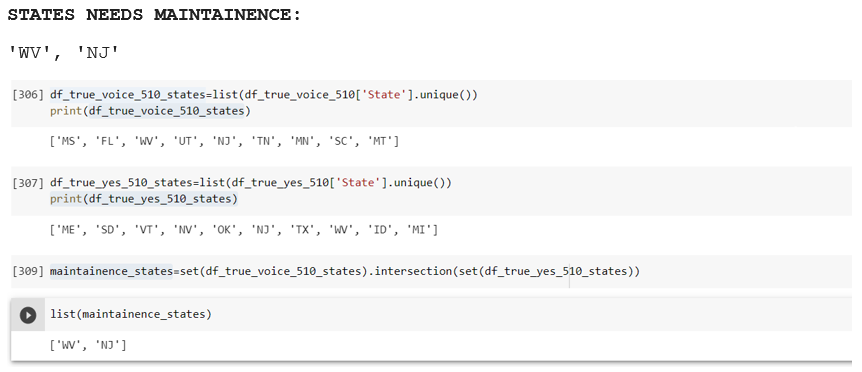

In [220]:
dataset.describe(include='all')

State  ...  Modified_Voice_mail_plan
count   3333  ...               3333.000000
unique    51  ...                       NaN
top       WV  ...                       NaN
freq     106  ...                       NaN
mean     NaN  ...                  0.276628
std      NaN  ...                  0.447398
min      NaN  ...                  0.000000
25%      NaN  ...                  0.000000
50%      NaN  ...                  0.000000
75%      NaN  ...                  1.000000
max      NaN  ...                  1.000000

[11 rows x 24 columns]

In [221]:
df=dataset.copy()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        3333 non-null   object 
 1   Account length               3333 non-null   int64  
 2   Area code                    3333 non-null   int64  
 3   International plan           3333 non-null   object 
 4   Voice mail plan              3333 non-null   object 
 5   Number vmail messages        3333 non-null   int64  
 6   Total day minutes            3333 non-null   float64
 7   Total day calls              3333 non-null   int64  
 8   Total day charge             3333 non-null   float64
 9   Total eve minutes            3333 non-null   float64
 10  Total eve calls              3333 non-null   int64  
 11  Total eve charge             3333 non-null   float64
 12  Total night minutes          3333 non-null   float64
 13  Total night calls 

In [223]:
df[df['Churn']==True].shape

(483, 24)

In [224]:
df_churn=df[(df['Churn']==True)&(df['Area code']==415)]

In [225]:
df_churn

State  ...  Modified_Voice_mail_plan
10      IN  ...                         0
15      NY  ...                         0
48      ID  ...                         0
54      WY  ...                         0
76      DC  ...                         0
...    ...  ...                       ...
3265    ID  ...                         0
3268    WA  ...                         0
3287    KS  ...                         1
3301    CA  ...                         0
3323    IN  ...                         0

[236 rows x 24 columns]

In [226]:
df_1=(df[(df['Churn']==True)&(df['Area code']==415)].describe()).reset_index().loc[1]

In [227]:
df_2=df[(df['Churn']==True)&(df['Area code']==415)].median()

In [228]:
pd.concat([df_1,df_2], axis=1)

1        0
index                            mean      NaN
Account length                103.945  102.000
Area code                         415  415.000
Number vmail messages         4.26271    0.000
Total day minutes             210.462  219.550
Total day calls               100.394  102.000
Total day charge               35.779   37.325
Total eve minutes             212.536  213.550
Total eve calls               101.182  101.500
Total eve charge              18.0656   18.150
Total night minutes           206.806  204.900
Total night calls             101.021  101.000
Total night charge            9.30657    9.225
Total intl minutes            10.8665   10.900
Total intl calls              4.29237    4.000
Total intl charge             2.93436    2.940
Customer service calls        2.25847    2.000
Modified_Churn                      1    1.000
international_rate_per_min   0.270047    0.270
Modified_International_plan  0.262712    0.000
Modified_Voice_mail_plan     0.144068    0.000
Churn                             NaN    1.000

In [229]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [230]:
df['State'].nunique()

51

In [231]:
churn_state=df.groupby('State')['Churn'].value_counts(  )
churn_state

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: Churn, Length: 102, dtype: int64

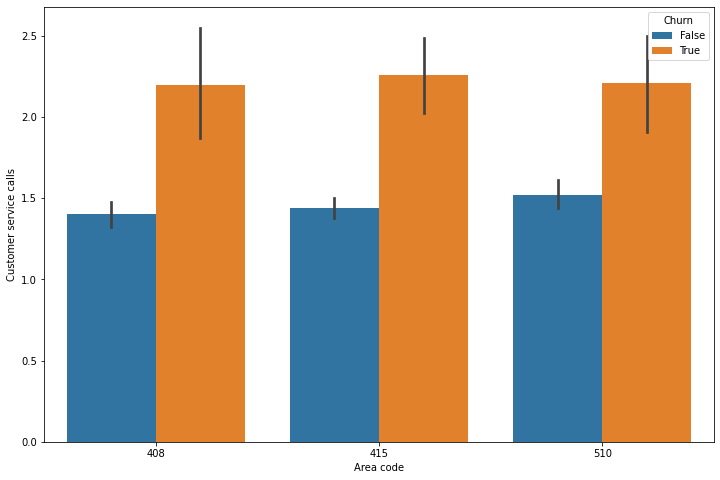

In [232]:
sns.barplot(data=df ,x='Area code', y='Customer service calls',hue='Churn')

In [233]:
df_1

index                              mean
Account length                  103.945
Area code                           415
Number vmail messages           4.26271
Total day minutes               210.462
Total day calls                 100.394
Total day charge                 35.779
Total eve minutes               212.536
Total eve calls                 101.182
Total eve charge                18.0656
Total night minutes             206.806
Total night calls               101.021
Total night charge              9.30657
Total intl minutes              10.8665
Total intl calls                4.29237
Total intl charge               2.93436
Customer service calls          2.25847
Modified_Churn                        1
international_rate_per_min     0.270047
Modified_International_plan    0.262712
Modified_Voice_mail_plan       0.144068
Name: 1, dtype: object

In [234]:


df.groupby('Area code')['Churn'].value_counts().sort_values()

Area code  Churn
408        True      122
510        True      125
415        True      236
510        False     715
408        False     716
415        False    1419
Name: Churn, dtype: int64

In [235]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data = [['408',122 ,716], ['415', 236,1419], ['510', 125,715]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
area_code = pd.DataFrame(data, columns = ['Area_code', 'true_churn','False churn']) 

# print dataframe. 
area_code


Area_code  true_churn  False churn
0       408         122          716
1       415         236         1419
2       510         125          715

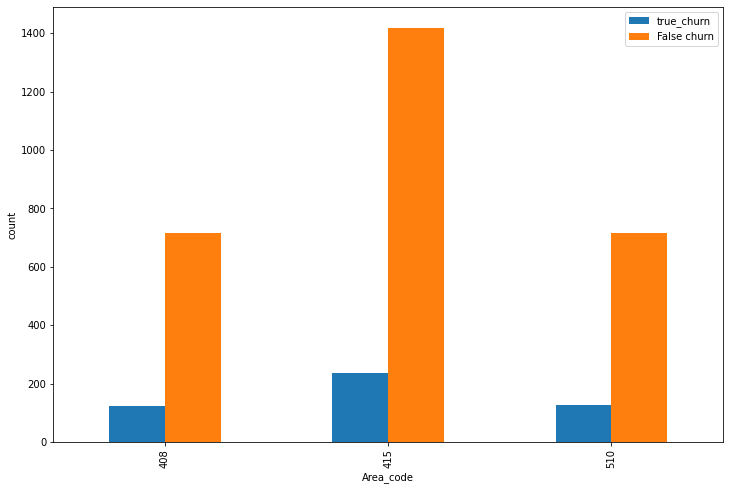

In [236]:
area_code.plot(kind='bar', x='Area_code',xlabel='Area_code',ylabel='count')

In [237]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data = [['415', 7.012], ['512', 6.12], ['408', 6.86]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
df_123 = pd.DataFrame(data, columns = ['Area_code', 'true_churn']) 

# print dataframe. 
df_123


Area_code  true_churn
0       415       7.012
1       512       6.120
2       408       6.860

In [238]:
df_churn[df_churn['International plan']=='No'].shape

(174, 24)

In [239]:
df_churn_intl_no=df_churn[df_churn['International plan']=='No']
df_churn_intl_yes=df_churn[df_churn['International plan']=='Yes']

In [240]:
df_churn_intl_no['Area code'].value_counts()

415    174
Name: Area code, dtype: int64

In [241]:
df_churn_intl_no['Days_1call_duration']=df_churn_intl_no['Total day minutes']/df_churn_intl_no['Total day calls']
df_churn_intl_no['intern_1call_duration']=df_churn_intl_no['Total intl minutes']/df_churn_intl_no['Total intl calls']

df_churn_intl_no['evening_1call_duration']=df_churn_intl_no['Total eve minutes']/df_churn_intl_no['Total eve calls']
df_churn_intl_no['night_1call_duration']=df_churn_intl_no['Total night minutes']/df_churn_intl_no['Total night calls']


In [242]:
df_churn_intl_no.head()

State  Account length  ...  evening_1call_duration night_1call_duration
10    IN              65  ...                2.753012             1.881081
15    NY             161  ...                3.276289             1.254687
48    ID             119  ...                1.976923             1.573626
54    WY              87  ...                1.893966             1.605512
76    DC              82  ...                1.810000             3.700000

[5 rows x 28 columns]

In [243]:
df_churn_intl_no.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Modified_Churn', 'international_rate_per_min',
       'Modified_International_plan', 'Modified_Voice_mail_plan',
       'Days_1call_duration', 'intern_1call_duration',
       'evening_1call_duration', 'night_1call_duration'],
      dtype='object')

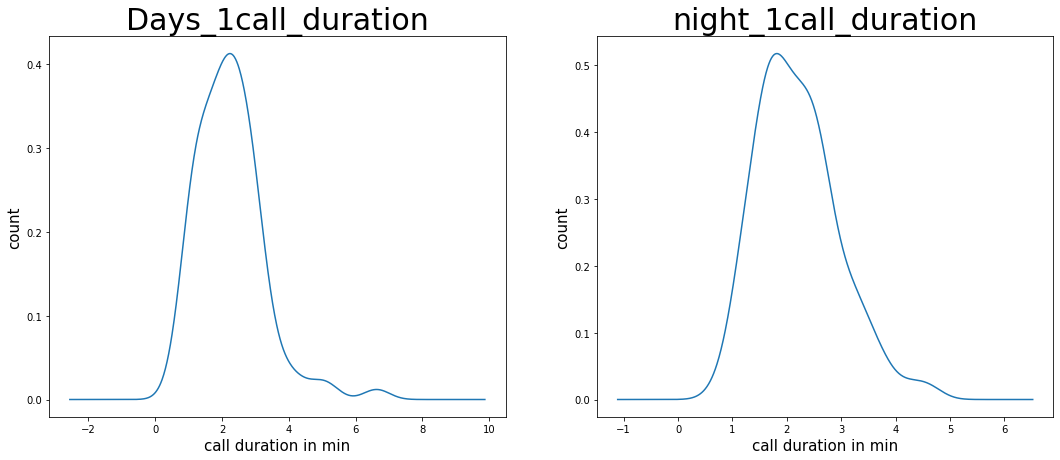

In [244]:
# checking the Distribution of customers on Revenue
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
df_churn_intl_no['Days_1call_duration'].plot.kde()
plt.title('Days_1call_duration', fontsize = 30)
plt.xlabel('call duration in min', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
df_churn_intl_no['evening_1call_duration'].plot.kde()
plt.title('night_1call_duration', fontsize = 30)
plt.xlabel('call duration in min', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

Text(0, 0.5, 'count')

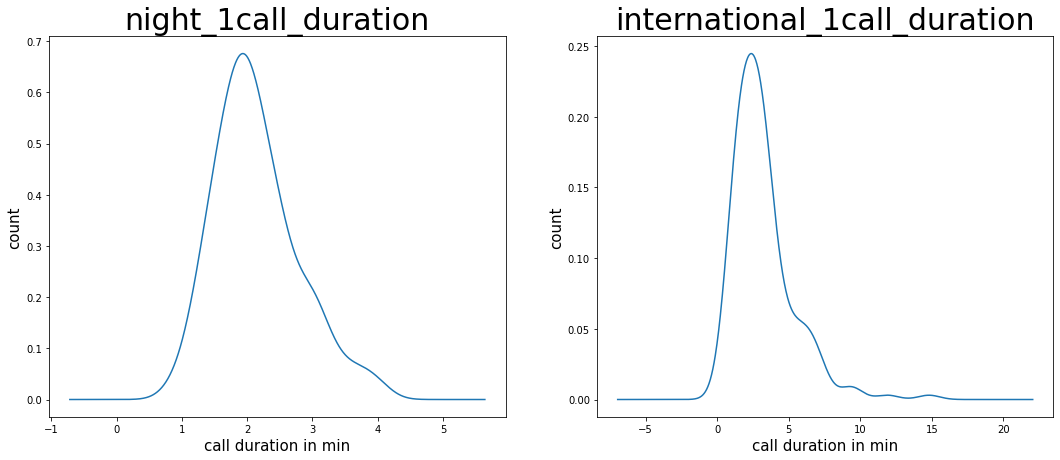

In [245]:

plt.subplot(1, 2, 1)
df_churn_intl_no['night_1call_duration'].plot.kde()
plt.title('night_1call_duration', fontsize = 30)
plt.xlabel('call duration in min', fontsize = 15)
plt.ylabel('count', fontsize = 15)




plt.subplot(1, 2, 2)
df_churn_intl_no['intern_1call_duration'].plot.kde()
plt.title('international_1call_duration', fontsize = 30)
plt.xlabel('call duration in min', fontsize = 15)
plt.ylabel('count', fontsize = 15)

In [246]:
df_churn_intl_yes['international_rate_per_min']=df_churn_intl_yes['Total intl charge']/df_churn_intl_yes['Total intl minutes']
df_churn_intl_yes['day_rate_per_min']=df_churn_intl_yes['Total day charge']/df_churn_intl_yes['Total day minutes']
df_churn_intl_yes['eve_rate_per_min']=df_churn_intl_yes['Total eve charge']/df_churn_intl_yes['Total eve minutes']
df_churn_intl_yes['night_rate_per_min']=df_churn_intl_yes['Total night charge']/df_churn_intl_yes['Total night minutes']

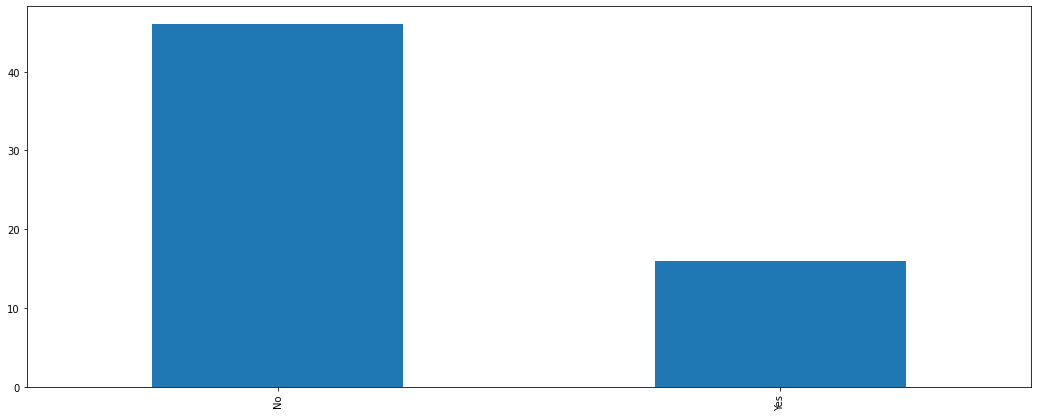

In [247]:
df_churn_intl_yes['Voice mail plan'].value_counts().plot(kind='bar')

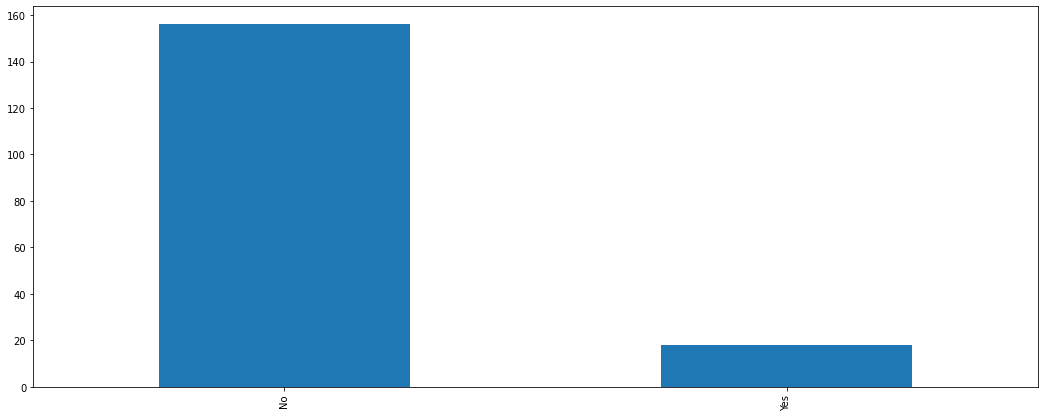

In [248]:
df_churn_intl_no['Voice mail plan'].value_counts().plot(kind='bar')

In [249]:
df_churn_intl_no['Number vmail messages'].value_counts()

0     156
29      3
42      2
36      2
31      2
37      1
35      1
33      1
32      1
30      1
28      1
27      1
26      1
18      1
Name: Number vmail messages, dtype: int64

In [250]:
df_churn_intl_yes['Number vmail messages'].value_counts()

0     46
29     3
26     3
28     2
42     1
35     1
32     1
27     1
24     1
20     1
19     1
15     1
Name: Number vmail messages, dtype: int64

In [251]:
voice_mail_plan_yes =df_churn_intl_no[df_churn_intl_no['Voice mail plan']=='Yes']
#df_churn_intl_no=df_churn[df_churn['International plan']=='No']
#df_churn_intl_yes=df_churn[df_churn['International plan']=='Yes']
voice_mail_plan_yes

State  Account length  ...  evening_1call_duration night_1call_duration
250     OR              33  ...                1.473750             3.534177
293     CT              96  ...                1.035345             2.512791
509     MS             118  ...                1.596000             1.731633
892     LA             109  ...                2.404348             2.034021
944     NV              81  ...                1.816190             1.873786
1030    VA              99  ...                2.233654             2.155000
1407    MS              73  ...                2.814286             2.342857
1493    MT             126  ...                1.560825             1.585567
1532    CA             103  ...                2.034524             1.531250
2377    ND             101  ...                1.628302             2.208661
2402    NY              77  ...                2.080392             0.874167
2405    ID              92  ...                1.771304             1.149558
2437    CA             105  ...                2.094958             3.180198
2629    NH             141  ...                2.646729             1.887387
2786    AR             109  ...                2.688776             1.755469
2961    KY              98  ...                1.305600             1.439167
2972    MT             147  ...                1.425253             2.356667
3287    KS             170  ...                1.500000             3.767347

[18 rows x 28 columns]

In [252]:
voice_mail_plan_yes=df_churn_intl_yes[df_churn_intl_yes['Voice mail plan']=='Yes']
voice_mail_plan_yes

State  Account length  ...  eve_rate_per_min night_rate_per_min
542     MN             152  ...          0.085004           0.044985
613     NV             105  ...          0.084979           0.044987
771     WI             149  ...          0.085021           0.044972
987     KS             110  ...          0.084998           0.044975
1136    WY             106  ...          0.084991           0.045000
1193    NM             119  ...          0.085012           0.044957
1435    IL              89  ...          0.084983           0.045020
1467    DE              67  ...          0.084993           0.044984
1935    MD             108  ...          0.085030           0.044994
2347    IL              68  ...          0.085023           0.045000
2539    OR             138  ...          0.084992           0.045000
2664    NM             188  ...          0.084994           0.044987
2687    MN             125  ...          0.084973           0.045013
2735    TX              90  ...          0.085011           0.045007
2774    ME              62  ...          0.085002           0.045005
3209    OH              68  ...          0.084995           0.044988

[16 rows x 27 columns]

In [253]:
df_churn_intl_yes.head()

State  Account length  ...  eve_rate_per_min night_rate_per_min
241    NV             137  ...          0.085011           0.045002
372    CA             151  ...          0.084965           0.044985
378    MO              95  ...          0.085010           0.044997
465    NV              71  ...          0.084982           0.044975
491    AL              55  ...          0.085006           0.045017

[5 rows x 27 columns]

In [254]:
pd.concat([df_1,df_2], axis=1)

1        0
index                            mean      NaN
Account length                103.945  102.000
Area code                         415  415.000
Number vmail messages         4.26271    0.000
Total day minutes             210.462  219.550
Total day calls               100.394  102.000
Total day charge               35.779   37.325
Total eve minutes             212.536  213.550
Total eve calls               101.182  101.500
Total eve charge              18.0656   18.150
Total night minutes           206.806  204.900
Total night calls             101.021  101.000
Total night charge            9.30657    9.225
Total intl minutes            10.8665   10.900
Total intl calls              4.29237    4.000
Total intl charge             2.93436    2.940
Customer service calls        2.25847    2.000
Modified_Churn                      1    1.000
international_rate_per_min   0.270047    0.270
Modified_International_plan  0.262712    0.000
Modified_Voice_mail_plan     0.144068    0.000
Churn                             NaN    1.000

In [255]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [256]:
area510=df.iloc[np.where(df['Area code']==510)]


In [257]:
area510.describe()

Account length  ...  Modified_Voice_mail_plan
count      840.000000  ...                 840.00000
mean       100.246429  ...                   0.27500
std         40.381347  ...                   0.44678
min          3.000000  ...                   0.00000
25%         72.000000  ...                   0.00000
50%        100.000000  ...                   0.00000
75%        128.000000  ...                   1.00000
max        243.000000  ...                   1.00000

[8 rows x 20 columns]

In [258]:
area510['Churn'].value_counts()

False    715
True     125
Name: Churn, dtype: int64

In [259]:
true_510_churn=area510[area510['Churn']==True]
false_510_churn=area510[area510['Churn']==False]



In [260]:
len(true_510_churn)

125

In [261]:
true_510_churn.describe()

Account length  ...  Modified_Voice_mail_plan
count      125.000000  ...                125.000000
mean        97.336000  ...                  0.192000
std         42.029165  ...                  0.395458
min         16.000000  ...                  0.000000
25%         70.000000  ...                  0.000000
50%         98.000000  ...                  0.000000
75%        125.000000  ...                  0.000000
max        224.000000  ...                  1.000000

[8 rows x 20 columns]

In [262]:
true_510_churn.describe()

Account length  ...  Modified_Voice_mail_plan
count      125.000000  ...                125.000000
mean        97.336000  ...                  0.192000
std         42.029165  ...                  0.395458
min         16.000000  ...                  0.000000
25%         70.000000  ...                  0.000000
50%         98.000000  ...                  0.000000
75%        125.000000  ...                  0.000000
max        224.000000  ...                  1.000000

[8 rows x 20 columns]

In [263]:
df_true=df[df['Churn']==True]


In [264]:
df_true_intl=df_true[(df_true['International plan']=='Yes')&(df_true['Voice mail plan']=='No')]

In [265]:
df_true_intl.describe()

Account length  ...  Modified_Voice_mail_plan
count      101.000000  ...                     101.0
mean       103.297030  ...                       0.0
std         38.004354  ...                       0.0
min          2.000000  ...                       0.0
25%         76.000000  ...                       0.0
50%        103.000000  ...                       0.0
75%        126.000000  ...                       0.0
max        224.000000  ...                       0.0

[8 rows x 20 columns]

In [266]:
df_true_voice=df_true[(df_true['International plan']=='No')&(df_true['Voice mail plan']=='Yes')]

In [267]:
df_true_yes=df_true[(df_true['International plan']=='Yes')&(df_true['Voice mail plan']=='Yes')]

In [268]:
df_true_no=df_true[(df_true['International plan']=='No')&(df_true['Voice mail plan']=='No')]

In [269]:
df_true_yes.describe()

Account length  ...  Modified_Voice_mail_plan
count       36.000000  ...                      36.0
mean       109.416667  ...                       1.0
std         32.514942  ...                       0.0
min         36.000000  ...                       1.0
25%         89.750000  ...                       1.0
50%        113.000000  ...                       1.0
75%        131.500000  ...                       1.0
max        188.000000  ...                       1.0

[8 rows x 20 columns]

In [270]:
df_true
df_true_intl.shape
df_true_voice.shape
df_true_no.shape
df_true_yes.shape

(36, 24)

In [271]:
df_true_voice.head()

State  ...  Modified_Voice_mail_plan
57     CO  ...                         1
127    MS  ...                         1
250    OR  ...                         1
277    SD  ...                         1
293    CT  ...                         1

[5 rows x 24 columns]

In [272]:
df_true_voice['Number vmail messages'].max()


48

In [273]:
df_true_voice_415=df_true_voice[df_true_voice['Area code']==415]

In [274]:
df_true_voice_510=df_true_voice[df_true_voice['Area code']==510]

In [275]:
df_true_voice_408=df_true_voice[df_true_voice['Area code']==408]

In [276]:
df_true_voice_408.shape

(13, 24)

In [277]:
df_true_voice_415['Number vmail messages'].mean()

31.72222222222222

In [278]:
df_true_voice_415['Number vmail messages'].median()

31.0

In [279]:
df_true_voice_415['Customer service calls'].mean()

3.388888888888889

In [280]:
df_true_voice_415['Customer service calls'].median()

4.0

In [281]:
df_true_voice_510['Number vmail messages'].max()

45

In [282]:
df_true_voice_510['Number vmail messages'].mean()

32.46153846153846

In [283]:
df_true_voice_510['Number vmail messages'].median()

33.0

In [284]:
df_true_voice_510['Customer service calls'].mean()

3.6153846153846154

In [285]:
df_true_voice_510['Customer service calls'].median()

4.0

In [286]:
df_true_voice_408['Number vmail messages'].max()

48

In [287]:
df_true_voice_408['Number vmail messages'].mean()

31.307692307692307

In [288]:
df_true_voice_408['Number vmail messages'].median()

32.0

In [289]:
df_true_voice_408['Customer service calls'].mean()

2.8461538461538463

In [290]:
df_true_voice_408['Customer service calls'].median()

2.0

In [291]:
df_true_yes_415=df_true_yes[df_true_yes['Area code']==415]

In [292]:
df_true_yes_510=df_true_yes[df_true_yes['Area code']==510]

In [293]:
df_true_yes_408=df_true_yes[df_true_yes['Area code']==408]

In [294]:
df_true_yes['Customer service calls'].mean()

1.7222222222222223

In [295]:
df_true_yes['Customer service calls'].mean()

1.7222222222222223

In [296]:
df_true_yes_415['Number vmail messages'].max()

42

In [297]:
df_true_yes_415['Number vmail messages'].mean()

27.1875

In [298]:
df_true_yes_415['Number vmail messages'].median()

27.5

In [299]:
df_true_yes_510['Number vmail messages'].max()

42

In [300]:
df_true_yes_510['Number vmail messages'].mean()

33.0

In [301]:
df_true_yes_510['Number vmail messages'].median()

32.0

In [302]:
df_true_yes_408['Number vmail messages'].max()

44

In [303]:
df_true_yes_408['Number vmail messages'].mean()

30.333333333333332

In [304]:
df_true_yes_408['Number vmail messages'].median()

32.0

In [305]:
df_true_yes_415

State  ...  Modified_Voice_mail_plan
542     MN  ...                         1
613     NV  ...                         1
771     WI  ...                         1
987     KS  ...                         1
1136    WY  ...                         1
1193    NM  ...                         1
1435    IL  ...                         1
1467    DE  ...                         1
1935    MD  ...                         1
2347    IL  ...                         1
2539    OR  ...                         1
2664    NM  ...                         1
2687    MN  ...                         1
2735    TX  ...                         1
2774    ME  ...                         1
3209    OH  ...                         1

[16 rows x 24 columns]

In [306]:
df_true_voice_415_states=list(df_true_voice_415['State'].unique())
print(df_true_voice_415_states)

['OR', 'CT', 'MS', 'LA', 'NV', 'VA', 'MT', 'CA', 'ND', 'NY', 'ID', 'NH', 'AR', 'KY', 'KS']


In [307]:
df_true_yes_415_states=list(df_true_yes_415['State'].unique())
print(df_true_yes_415_states)

['MN', 'NV', 'WI', 'KS', 'WY', 'NM', 'IL', 'DE', 'MD', 'OR', 'TX', 'ME', 'OH']


In [308]:
poor_netwok_states_415=set(df_true_voice_415_states).intersection(set(df_true_yes_415_states))

In [309]:
poor_netwok_states_415

{'KS', 'NV', 'OR'}

In [310]:
df_true_voice_408_states=list(df_true_voice_408['State'].unique())
print(df_true_voice_408_states)

['CO', 'SD', 'NM', 'GA', 'MA', 'UT', 'NC', 'WA', 'KY', 'MI', 'PA', 'NH', 'MT']


In [311]:
df_true_yes_408_states=list(df_true_yes_408['State'].unique())
print(df_true_yes_408_states)

['MD', 'AL', 'NC', 'NJ', 'ME', 'MA', 'GA', 'ND']


In [312]:
poor_netwok_states_408=set(df_true_voice_408_states).intersection(set(df_true_yes_408_states))

In [313]:
poor_network_states=poor_netwok_states_415.union(poor_netwok_states_408)

In [314]:
list(poor_network_states)

['OR', 'KS', 'GA', 'NV', 'MA', 'NC']

In [315]:
df_true_voice_510_states=list(df_true_voice_510['State'].unique())
print(df_true_voice_510_states)

['MS', 'FL', 'WV', 'UT', 'NJ', 'TN', 'MN', 'SC', 'MT']


In [316]:
df_true_yes_510_states=list(df_true_yes_510['State'].unique())
print(df_true_yes_510_states)

['ME', 'SD', 'VT', 'NV', 'OK', 'NJ', 'TX', 'WV', 'ID', 'MI']


In [317]:
maintainence_states=set(df_true_voice_510_states).intersection(set(df_true_yes_510_states))

In [318]:
list(maintainence_states)

['WV', 'NJ']

In [319]:
print(f"Poor Netwok States are {list(poor_network_states)} and Network needs to be maintenanced in states {list(maintainence_states)}")

Poor Netwok States are ['OR', 'KS', 'GA', 'NV', 'MA', 'NC'] and Network needs to be maintenanced in states ['WV', 'NJ']


# **As it's just an EDA project but Just for Curiosity, I have  implemented Logistic Regression, Decision Tree and Ensembles of Decision Tree on this to know the accuracy of the model and the churn prediction.**

## **Data Preparation**

In [320]:
dataset.shape

(3333, 24)

In [321]:
dataset_pr=dataset.copy()

In [322]:
features1=final_numerical_features.copy()
features1.extend(["Modified_International_plan","Modified_Voice_mail_plan"])

features1

['Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl calls',
 'Customer service calls',
 'international_rate_per_min',
 'Modified_International_plan',
 'Modified_Voice_mail_plan']

In [323]:
len(features1)

15

In [324]:
X= dataset_pr[features1]
X.head()

Number vmail messages  ...  Modified_Voice_mail_plan
0                     25  ...                         1
1                     26  ...                         1
2                      0  ...                         0
3                      0  ...                         0
4                      0  ...                         0

[5 rows x 15 columns]

In [325]:
y = dataset['Modified_Churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Modified_Churn, dtype: int64

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(2666, 15)
(667, 15)


In [327]:
X_train

Number vmail messages  ...  Modified_Voice_mail_plan
1460                      0  ...                         0
2000                      0  ...                         0
666                       0  ...                         0
2962                      0  ...                         0
2773                     34  ...                         1
...                     ...  ...                       ...
835                       0  ...                         0
3264                     24  ...                         1
1653                      0  ...                         0
2607                      0  ...                         0
2732                      0  ...                         0

[2666 rows x 15 columns]

In [328]:
y_train.value_counts()

0    2271
1     395
Name: Modified_Churn, dtype: int64

## **Implementing Logistic Regression**

In [329]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
clf.coef_

array([[ 1.19873645e-02,  1.18088445e-02,  1.47755552e-03,
         1.17774480e-02,  5.45417947e-03,  9.50171453e-04,
         8.95107994e-03,  4.10743066e-03, -3.58710237e-06,
        -6.63489145e-03, -6.55530188e-02,  5.16570778e-01,
        -7.08037041e-01,  1.99329461e+00, -1.18093996e+00]])

In [331]:
clf.intercept_

array([-7.27713137])

In [332]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [333]:
X_test.value_counts

<bound method DataFrame.value_counts of       Number vmail messages  ...  Modified_Voice_mail_plan
405                       0  ...                         0
118                      36  ...                         1
710                       0  ...                         0
499                       0  ...                         0
2594                      0  ...                         0
...                     ...  ...                       ...
2255                      0  ...                         0
242                       0  ...                         0
1916                      0  ...                         0
2160                      0  ...                         0
1482                      0  ...                         0

[667 rows x 15 columns]>

In [334]:
test_preds

array([[0.5380622 , 0.4619378 ],
       [0.98025999, 0.01974001],
       [0.71940106, 0.28059894],
       ...,
       [0.93769662, 0.06230338],
       [0.68507901, 0.31492099],
       [0.77350957, 0.22649043]])

In [335]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [336]:
test_preds

array([0.4619378 , 0.01974001, 0.28059894, 0.0679669 , 0.83179482,
       0.65371122, 0.38251029, 0.05809541, 0.19517275, 0.33324197,
       0.03974688, 0.08337253, 0.11293537, 0.00831018, 0.25263445,
       0.19924048, 0.09183313, 0.17397004, 0.08632272, 0.04783774,
       0.05928577, 0.03722865, 0.042066  , 0.03784019, 0.16342836,
       0.11126193, 0.1102312 , 0.03244381, 0.32979133, 0.22824492,
       0.1633938 , 0.0666572 , 0.37822952, 0.01704609, 0.06793479,
       0.08003351, 0.70162385, 0.03323994, 0.03590798, 0.36069033,
       0.08661785, 0.31465314, 0.34030501, 0.2485253 , 0.02830875,
       0.01191579, 0.05116799, 0.03256263, 0.04707919, 0.03219052,
       0.03342744, 0.19475475, 0.14161984, 0.06578016, 0.02578648,
       0.02087036, 0.0460896 , 0.0175999 , 0.11862922, 0.47144285,
       0.25145602, 0.04911882, 0.02255279, 0.07561535, 0.35226154,
       0.11622609, 0.1541206 , 0.17859513, 0.01682752, 0.08399472,
       0.00553714, 0.01430078, 0.106559  , 0.46796334, 0.35371

In [337]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [338]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 1])

In [339]:
test_class_preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [340]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [341]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8574643660915229
The accuracy on test data is  0.8680659670164917


[[2208   63]
 [ 317   78]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

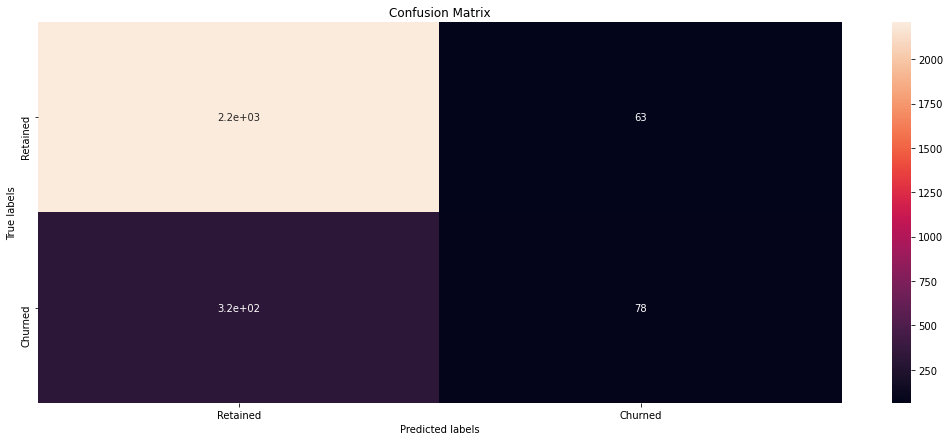

In [342]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [343]:
print("Precision :",78/(63+78))
print("Recall :", 78/(78+3.2e+02))

Precision : 0.5531914893617021
Recall : 0.19597989949748743


[[561  18]
 [ 70  18]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

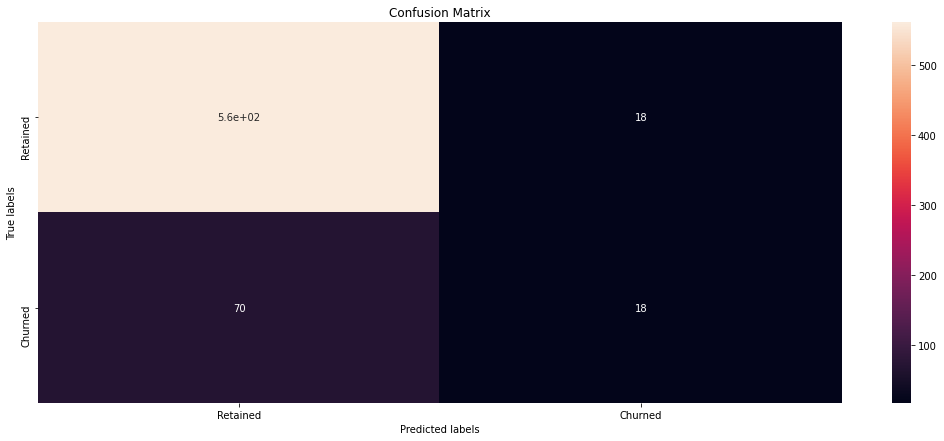

In [344]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [345]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       631
           1       0.20      0.50      0.29        36

    accuracy                           0.87       667
   macro avg       0.59      0.69      0.61       667
weighted avg       0.93      0.87      0.89       667

 
roc_auc_score
0.8037564766839378


## **Implementing Cross-validated Logistic Regression**

In [346]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [347]:
logistic = LogisticRegression()

In [348]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV]  ................................................................
[CV] ............. , accuracy=(train=0.848, test=0.852), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.857, test=0.841), total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ............. , accuracy=(train=0.848, test=0.852), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.854, test=0.848), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.848, test=0.859), total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [349]:
scores['train_accuracy']

array([0.84849906, 0.85700891, 0.84810127, 0.85419597, 0.84763244])

In [350]:
scores['test_accuracy']

array([0.85205993, 0.84052533, 0.85178236, 0.84803002, 0.85928705])

In [351]:
scores['estimator']

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 Log

In [352]:
for model in scores['estimator']:
    print(model.coef_)

[[-2.49193216e-02  8.96786113e-03 -1.15425061e-02  1.54687615e-03
   1.39981952e-04 -1.05393752e-02  5.37298592e-05 -1.68479304e-03
  -1.20792398e-02  1.62452052e-05 -9.25151631e-02  4.53496821e-01
  -8.96662396e-03  1.75734168e-01 -1.81648009e-02]]
[[-1.90246880e-02  9.67662941e-03 -1.35052065e-02  2.68232380e-03
   2.05095636e-03 -1.23932202e-02  4.77230560e-05  1.07391059e-04
  -1.44854518e-02 -3.88088773e-04 -1.29959295e-01  4.38994143e-01
  -7.99254920e-02  1.95356393e+00 -1.47964228e-01]]
[[-2.28458735e-02  9.61621516e-03 -1.26305258e-02  1.67351696e-03
   1.14822908e-03 -1.19046447e-02  1.11321459e-04 -1.84983882e-03
  -1.43903420e-02 -8.33184296e-05 -3.37773714e-02  4.13841758e-01
  -9.53968410e-03  1.58785378e-01 -2.07996202e-02]]
[[-3.54785450e-02  9.99971535e-03 -6.65377603e-03  1.77703859e-03
  -4.79692964e-04 -1.05314417e-02  2.64733536e-06 -7.74975579e-04
  -1.22478441e-02 -4.67952180e-04 -1.73062430e-01  3.18628861e-01
  -2.53776271e-02  5.63179636e-01 -4.13459759e-02]]


In [353]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854283 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.854184 (0.006543) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.854283 (0.007924) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.853984 (0.007471) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.852883 (0.006166) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.852884 (0.005150) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


## **Implementing Decision Tree by Entropy**

In [354]:
decision_classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,  random_state=0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [355]:
y_train_pred = decision_classifier.predict(X_train)

In [356]:
y_pred = decision_classifier.predict(X_test)

In [357]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [358]:
y_test[:10]

405     0
118     0
710     0
499     0
2594    1
1977    1
1892    1
1463    0
565     0
2114    0
Name: Modified_Churn, dtype: int64

In [359]:
accuracy_score(y_train, y_train_pred)

0.918979744936234

In [360]:
accuracy_score(y_test, y_pred) * 100

92.20389805097452

### **Visualizing Decision Tree**

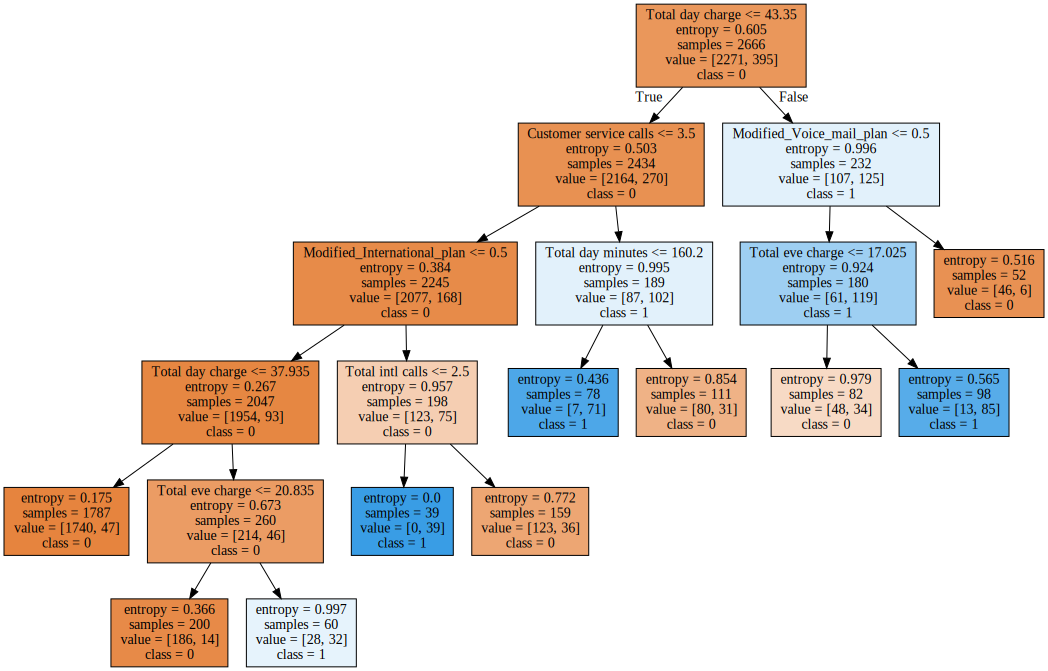

In [361]:
graph = Source(tree.export_graphviz(decision_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## **Implementing Decision Tree by Gini**

In [362]:
decision_classifier = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,  random_state=0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [363]:
y_train_pred = decision_classifier.predict(X_train)

In [364]:
y_pred = decision_classifier.predict(X_test)

In [365]:
y_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [366]:
y_test[:10]

405     0
118     0
710     0
499     0
2594    1
1977    1
1892    1
1463    0
565     0
2114    0
Name: Modified_Churn, dtype: int64

In [367]:
accuracy_score(y_train, y_train_pred)

0.9253563390847712

In [368]:
accuracy_score(y_test, y_pred) * 100

91.904047976012

### **Visualizing Decision Tree**

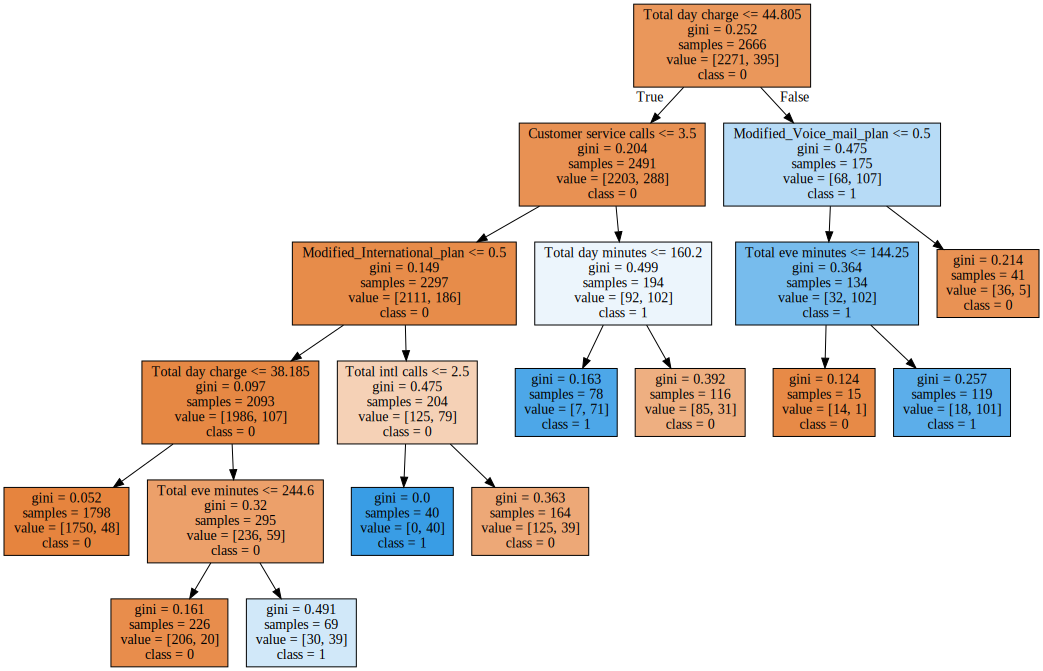

In [369]:
graph = Source(tree.export_graphviz(decision_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## **Implementing Random Forest Classifier**

In [370]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [371]:
# Making predictions on train and test data

train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_model.predict_proba(X_train)[:,1]
test_preds = rf_model.predict_proba(X_test)[:,1]

In [372]:
len(train_preds)

2666

In [373]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [374]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9385307346326837


In [375]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [376]:
train_cm

array([[2271,    0],
       [   0,  395]])

In [377]:
test_cm

array([[565,  14],
       [ 27,  61]])

[[2271    0]
 [   0  395]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

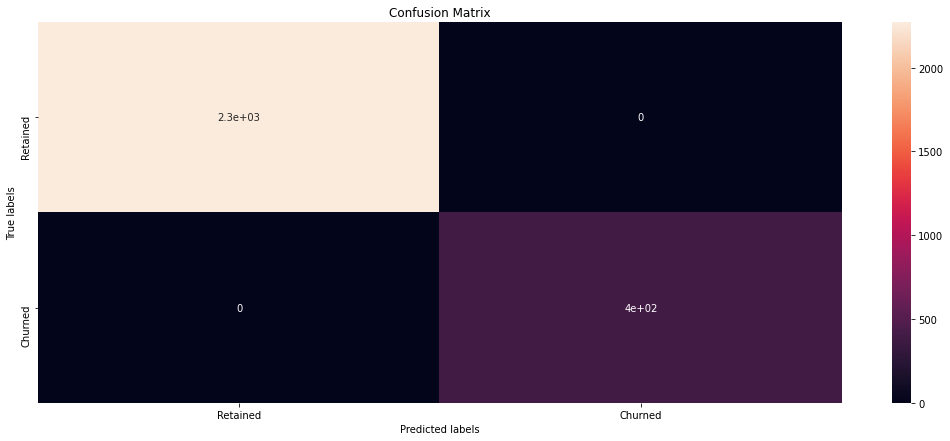

In [378]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [379]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       592
           1       0.69      0.81      0.75        75

    accuracy                           0.94       667
   macro avg       0.83      0.88      0.86       667
weighted avg       0.94      0.94      0.94       667

 
roc_auc_score
0.9090124038310567


In [380]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [381]:
train_auc

0.9999999999999999

In [382]:
test_auc

0.9090124038310567

In [383]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [384]:
rf_model.feature_importances_

array([0.03018752, 0.15776935, 0.04103961, 0.15594332, 0.07654404,
       0.03568631, 0.07207517, 0.04779076, 0.04026372, 0.04703217,
       0.0471107 , 0.12253541, 0.03967926, 0.06448191, 0.02186076])

In [385]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [386]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [387]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.03
1      Total day minutes                0.16
2        Total day calls                0.04
3       Total day charge                0.16
4      Total eve minutes                0.08

In [388]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Total day minutes                0.16
3              Total day charge                0.16
11       Customer service calls                0.12
4             Total eve minutes                0.08
6              Total eve charge                0.07
13  Modified_International_plan                0.06
7           Total night minutes                0.05
9            Total night charge                0.05
10             Total intl calls                0.05
2               Total day calls                0.04
5               Total eve calls                0.04
8             Total night calls                0.04
12   international_rate_per_min                0.04
0         Number vmail messages                0.03
14     Modified_Voice_mail_plan                0.02

In [389]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [390]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

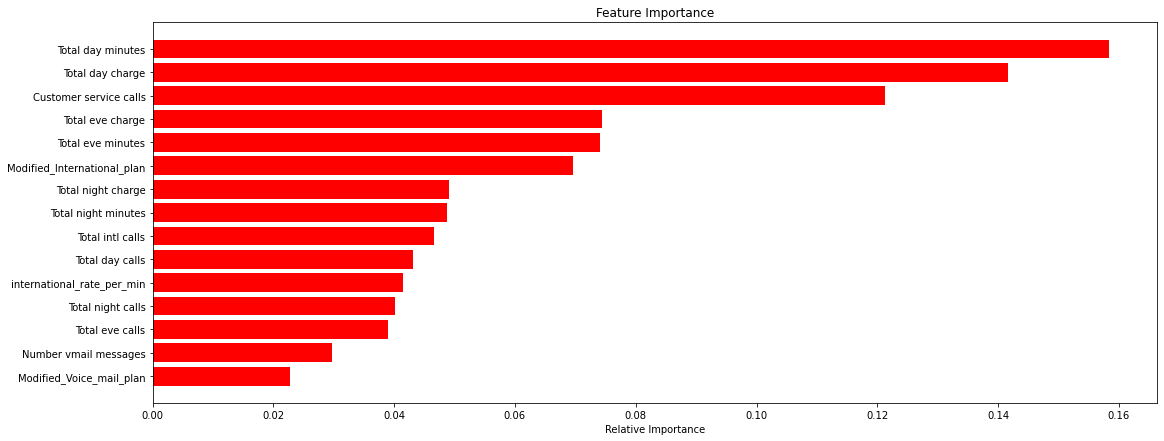

In [391]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

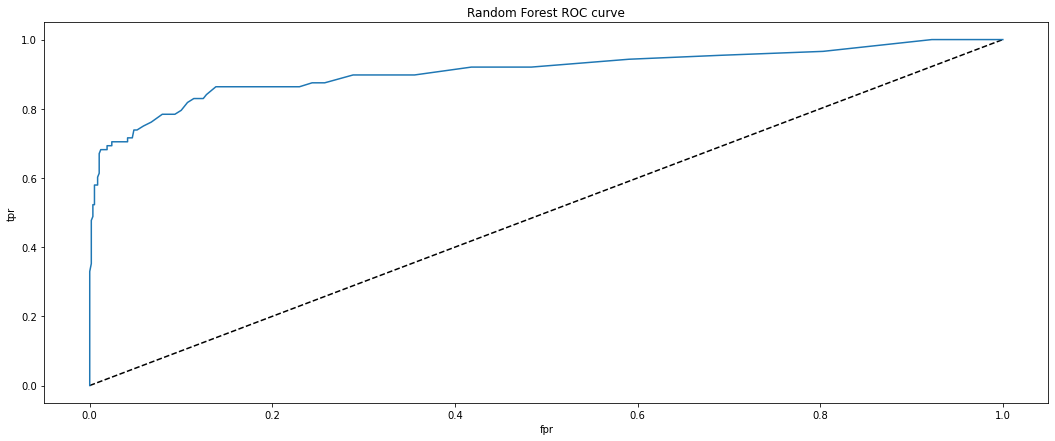

In [392]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

## **Training a Random Forest Classifier with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [393]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [394]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing Random Forest Classifier**

In [395]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [396]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [397]:
rf_optimal_model = rf_grid.best_estimator_

In [398]:
rf_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 80}

In [399]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [400]:
len(train_preds)

2666

In [401]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [402]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.885596399099775
The accuracy on test dataset is 0.8935532233883059


In [403]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [404]:
train_cm

array([[2257,   14],
       [ 291,  104]])

In [405]:
test_cm

array([[576,   3],
       [ 68,  20]])

[[2257   14]
 [ 291  104]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

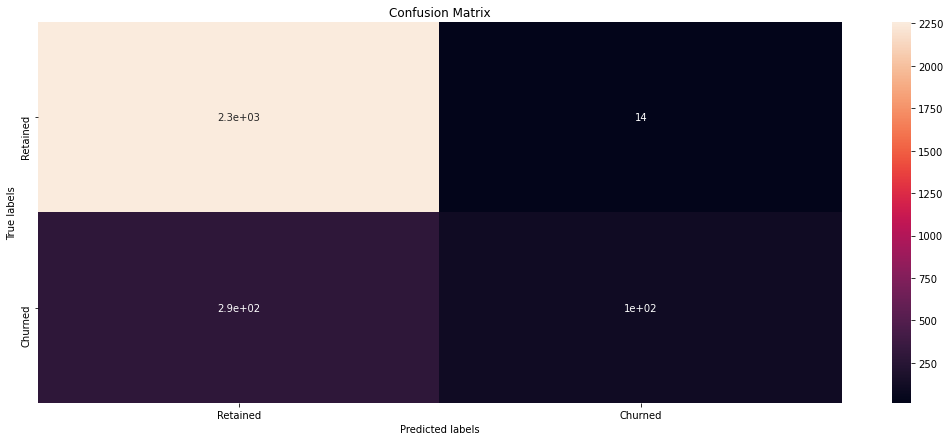

In [406]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [407]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       644
           1       0.23      0.87      0.36        23

    accuracy                           0.89       667
   macro avg       0.61      0.88      0.65       667
weighted avg       0.97      0.89      0.92       667

 
roc_auc_score
0.8762757104726017


In [408]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [409]:
train_auc

0.9161647408992859

In [410]:
test_auc

0.8762757104726017

In [411]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [412]:
rf_optimal_model.feature_importances_

array([0.00629852, 0.24360737, 0.00791557, 0.26450761, 0.04143806,
       0.00438233, 0.04245049, 0.01376156, 0.00650713, 0.01139227,
       0.0248556 , 0.20876624, 0.00992093, 0.10636645, 0.00782988])

In [413]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [414]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [415]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.01
1      Total day minutes                0.24
2        Total day calls                0.01
3       Total day charge                0.26
4      Total eve minutes                0.04

In [416]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
3              Total day charge                0.26
1             Total day minutes                0.24
11       Customer service calls                0.21
13  Modified_International_plan                0.11
4             Total eve minutes                0.04
6              Total eve charge                0.04
10             Total intl calls                0.02
0         Number vmail messages                0.01
2               Total day calls                0.01
7           Total night minutes                0.01
8             Total night calls                0.01
9            Total night charge                0.01
12   international_rate_per_min                0.01
14     Modified_Voice_mail_plan                0.01
5               Total eve calls                0.00

In [417]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [418]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

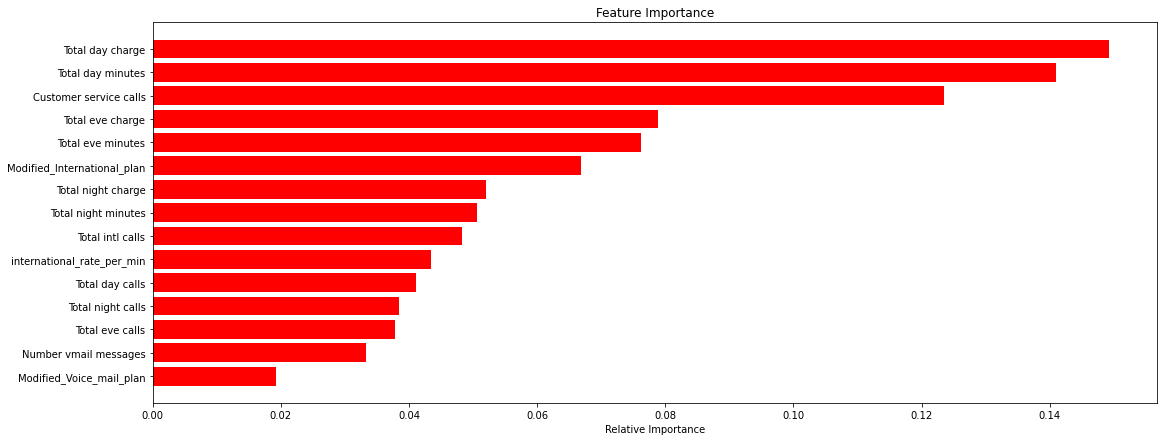

In [419]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

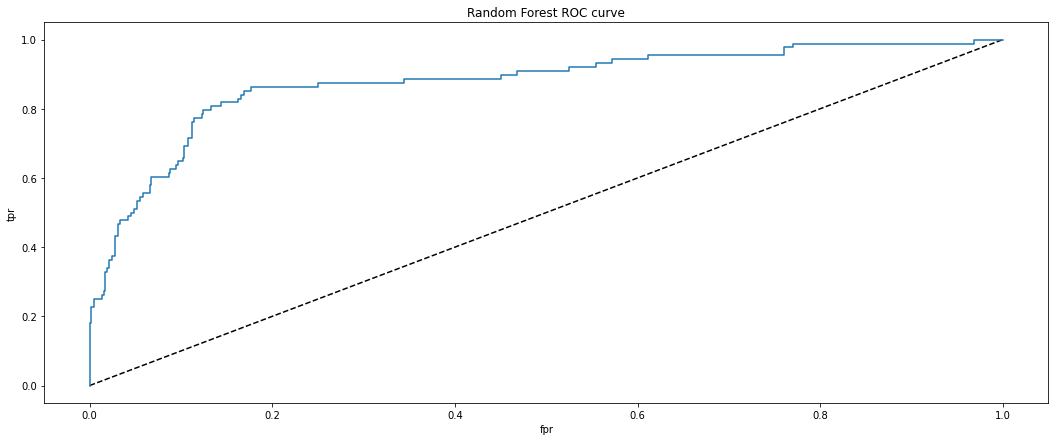

In [420]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

## **Implementing Gradient Boosting Classifier**

In [421]:
# Create an instance of the RandomForestClassifier
gb_model = GradientBoostingClassifier()


gb_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [422]:
# Making predictions on train and test data

train_class_preds = gb_model.predict(X_train)
test_class_preds = gb_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gb_model.predict_proba(X_train)[:,1]
test_preds = gb_model.predict_proba(X_test)[:,1]

In [423]:
len(train_preds)

2666

In [424]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [425]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.963615903975994
The accuracy on test dataset is 0.9340329835082459


In [426]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [427]:
train_cm

array([[2267,    4],
       [  93,  302]])

In [428]:
test_cm

array([[567,  12],
       [ 32,  56]])

[[2267    4]
 [  93  302]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

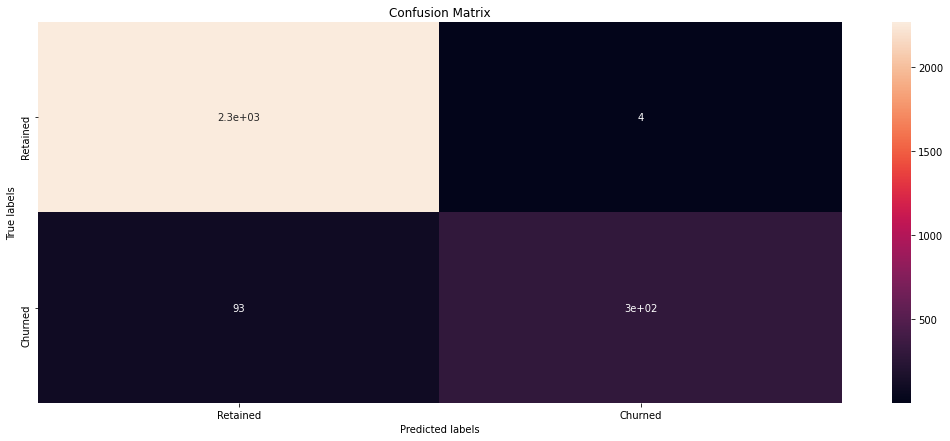

In [429]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [430]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       599
           1       0.64      0.82      0.72        68

    accuracy                           0.93       667
   macro avg       0.81      0.89      0.84       667
weighted avg       0.94      0.93      0.94       667

 
roc_auc_score
0.9102194222012875


In [431]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [432]:
train_auc

0.9636400626501458

In [433]:
test_auc

0.9102194222012875

In [434]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [435]:
gb_model.feature_importances_

array([0.05726173, 0.20708673, 0.00484278, 0.11554799, 0.07406476,
       0.00670381, 0.07748948, 0.02125412, 0.00427184, 0.01311641,
       0.08952998, 0.18443338, 0.00910337, 0.0993413 , 0.03595234])

In [436]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [437]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [438]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.06
1      Total day minutes                0.21
2        Total day calls                0.00
3       Total day charge                0.12
4      Total eve minutes                0.07

In [439]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Total day minutes                0.21
11       Customer service calls                0.18
3              Total day charge                0.12
13  Modified_International_plan                0.10
10             Total intl calls                0.09
6              Total eve charge                0.08
4             Total eve minutes                0.07
0         Number vmail messages                0.06
14     Modified_Voice_mail_plan                0.04
7           Total night minutes                0.02
5               Total eve calls                0.01
9            Total night charge                0.01
12   international_rate_per_min                0.01
2               Total day calls                0.00
8             Total night calls                0.00

In [440]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [441]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

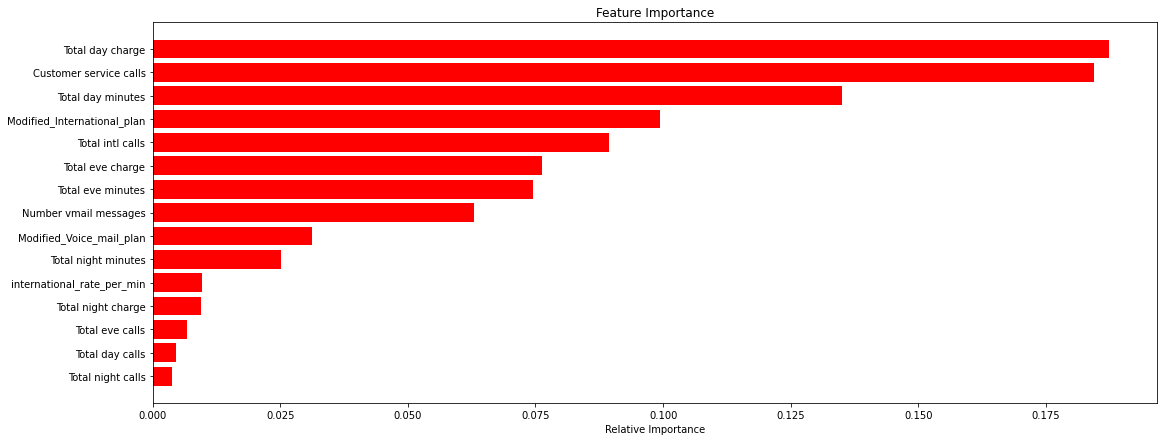

In [442]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

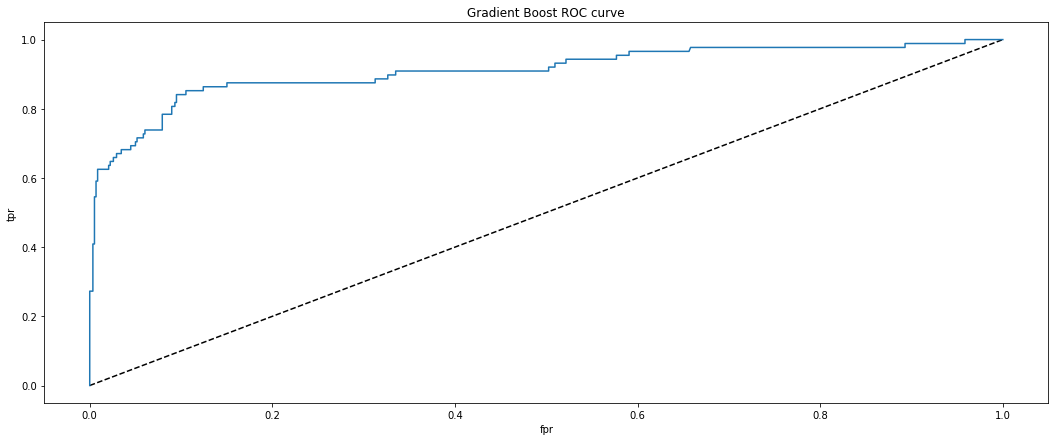

In [443]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gradient Boost ROC curve')
plt.show()

## **Training a Gradient Boosting Classifier with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [444]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [445]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing Gradient Boosting Classifier**

In [446]:
# Create an instance of the RandomForestClassifier
gb_model = GradientBoostingClassifier()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [447]:
gb_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=150,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [448]:
gb_optimal_model = gb_grid.best_estimator_

In [449]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 100}

In [450]:
# Making predictions on train and test data

train_class_preds = gb_optimal_model.predict(X_train)
test_class_preds = gb_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gb_optimal_model.predict_proba(X_train)[:,1]
test_preds = gb_optimal_model.predict_proba(X_test)[:,1]

In [451]:
len(train_preds)

2666

In [452]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [453]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.981245311327832
The accuracy on test dataset is 0.9325337331334332


In [454]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [455]:
train_cm

array([[2271,    0],
       [  50,  345]])

In [456]:
test_cm

array([[563,  16],
       [ 29,  59]])

[[2271    0]
 [  50  345]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

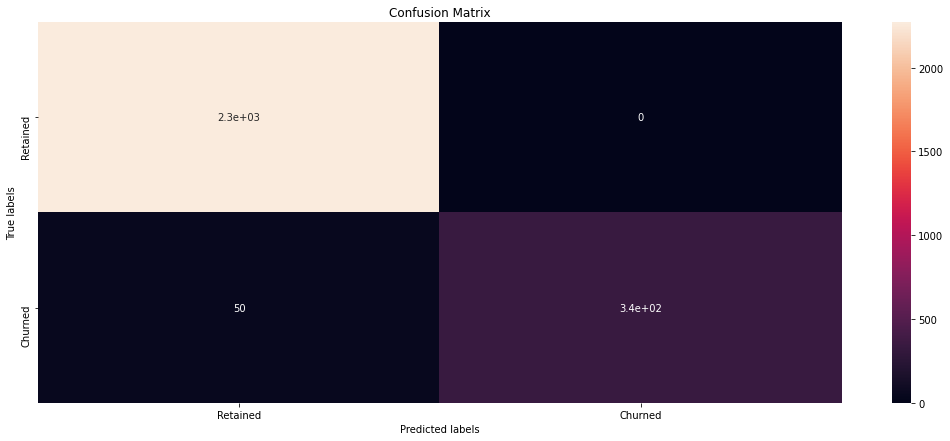

In [457]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [458]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       592
           1       0.67      0.79      0.72        75

    accuracy                           0.93       667
   macro avg       0.82      0.87      0.84       667
weighted avg       0.94      0.93      0.93       667

 
roc_auc_score
0.9155087140838436


In [459]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [460]:
train_auc

0.9986767664944345

In [461]:
test_auc

0.9155087140838436

In [462]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [463]:
gb_optimal_model.feature_importances_

array([0.03129144, 0.15673958, 0.01430363, 0.18055678, 0.0743748 ,
       0.00791706, 0.077851  , 0.0160534 , 0.01817339, 0.02290866,
       0.08796659, 0.16219084, 0.02742705, 0.09230919, 0.02993659])

In [464]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [465]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [466]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.03
1      Total day minutes                0.16
2        Total day calls                0.01
3       Total day charge                0.18
4      Total eve minutes                0.07

In [467]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
3              Total day charge                0.18
1             Total day minutes                0.16
11       Customer service calls                0.16
10             Total intl calls                0.09
13  Modified_International_plan                0.09
6              Total eve charge                0.08
4             Total eve minutes                0.07
0         Number vmail messages                0.03
12   international_rate_per_min                0.03
14     Modified_Voice_mail_plan                0.03
7           Total night minutes                0.02
8             Total night calls                0.02
9            Total night charge                0.02
2               Total day calls                0.01
5               Total eve calls                0.01

In [468]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [469]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

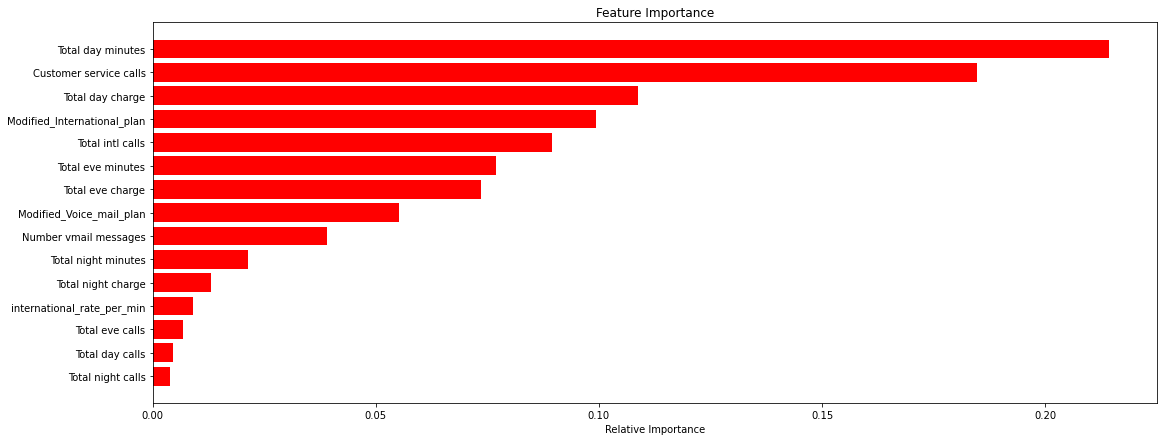

In [470]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

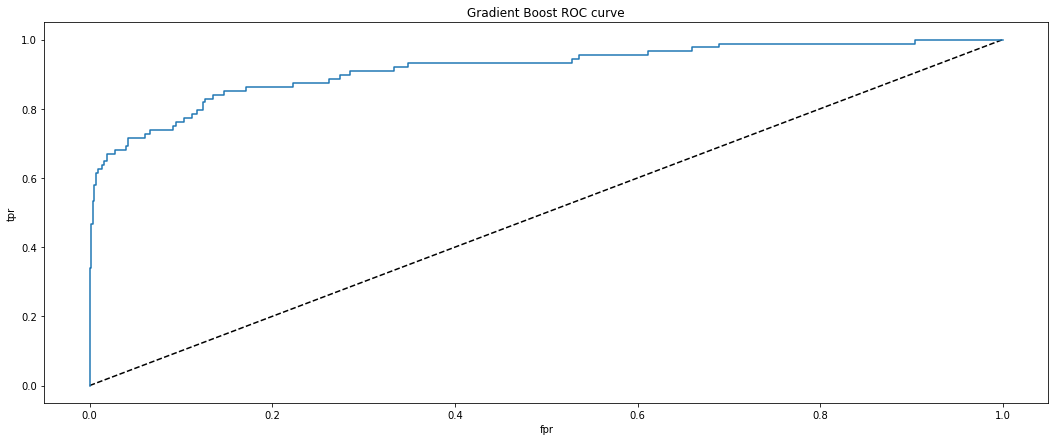

In [471]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gradient Boost ROC curve')
plt.show()

## **Implementing XG Boost Classifier**

In [472]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()


xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [473]:
# Making predictions on train and test data

train_class_preds = xg_model.predict(X_train)
test_class_preds = xg_model.predict(X_test)


# Get the probabilities on train and test
train_preds = xg_model.predict_proba(X_train)[:,1]
test_preds = xg_model.predict_proba(X_test)[:,1]

In [474]:
len(train_preds)

2666

In [475]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [476]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9564891222805701
The accuracy on test dataset is 0.9295352323838081


In [477]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [478]:
train_cm

array([[2264,    7],
       [ 109,  286]])

In [479]:
test_cm

array([[564,  15],
       [ 32,  56]])

[[2264    7]
 [ 109  286]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

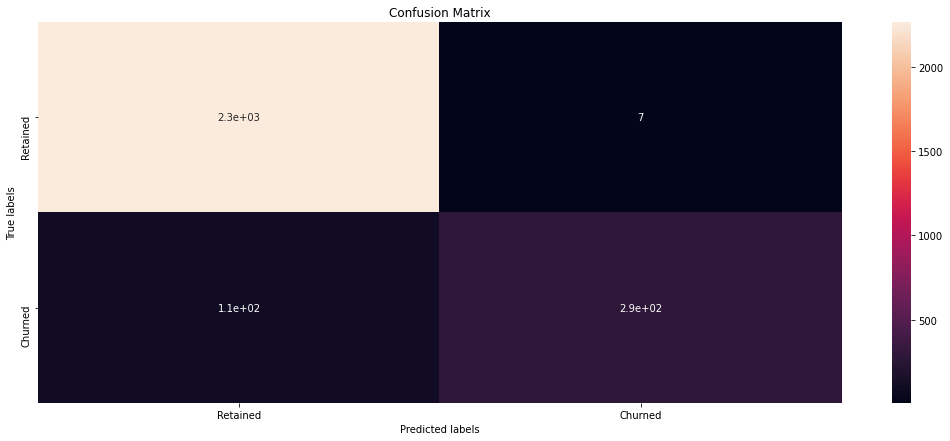

In [480]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [481]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       596
           1       0.64      0.79      0.70        71

    accuracy                           0.93       667
   macro avg       0.81      0.87      0.83       667
weighted avg       0.94      0.93      0.93       667

 
roc_auc_score
0.9052637776731041


In [482]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [483]:
train_auc

0.9601775830643948

In [484]:
test_auc

0.9052637776731041

In [485]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [486]:
xg_model.feature_importances_

array([0.12278739, 0.16555396, 0.02397078, 0.        , 0.08660759,
       0.02003134, 0.        , 0.04976914, 0.02586175, 0.        ,
       0.09826337, 0.22985084, 0.0289972 , 0.14830661, 0.        ],
      dtype=float32)

In [487]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [488]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [489]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.12
1      Total day minutes                0.17
2        Total day calls                0.02
3       Total day charge                0.00
4      Total eve minutes                0.09

In [490]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
11       Customer service calls                0.23
1             Total day minutes                0.17
13  Modified_International_plan                0.15
0         Number vmail messages                0.12
10             Total intl calls                0.10
4             Total eve minutes                0.09
7           Total night minutes                0.05
8             Total night calls                0.03
12   international_rate_per_min                0.03
2               Total day calls                0.02
5               Total eve calls                0.02
3              Total day charge                0.00
6              Total eve charge                0.00
9            Total night charge                0.00
14     Modified_Voice_mail_plan                0.00

In [491]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [492]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

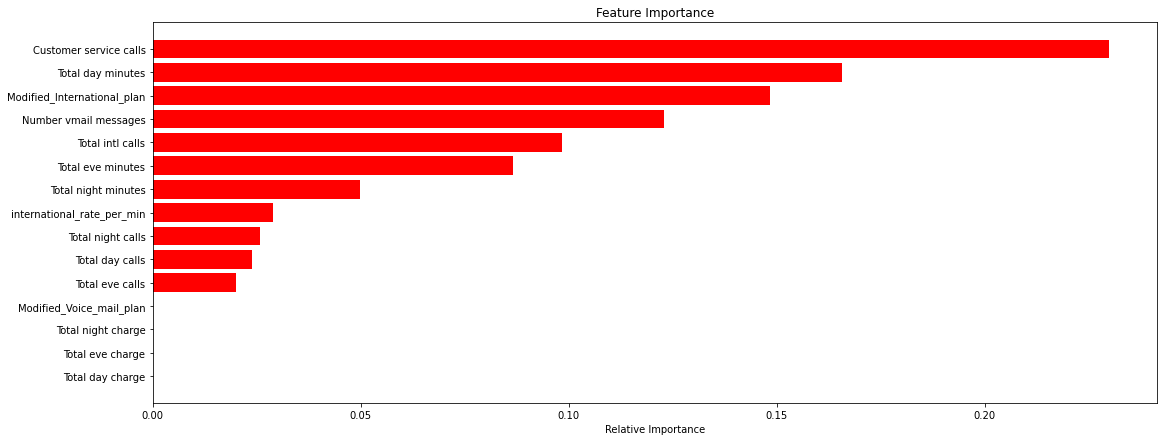

In [493]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

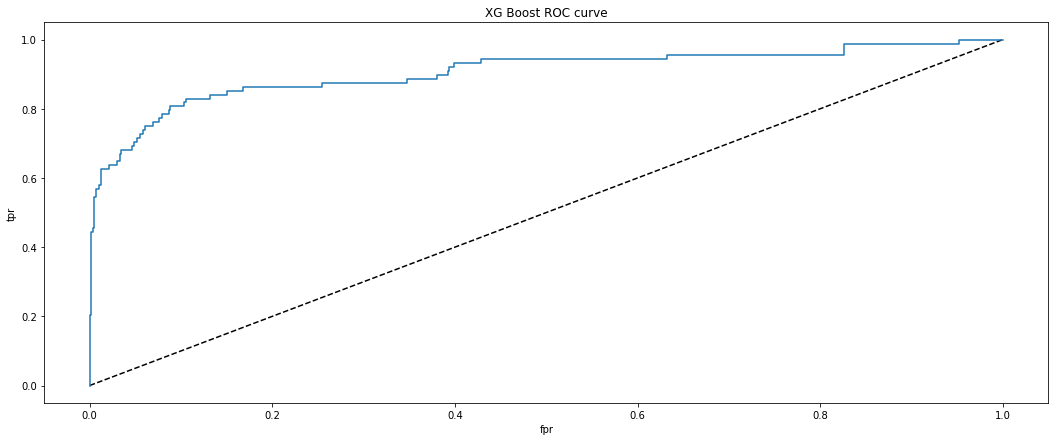

In [494]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost ROC curve')
plt.show()

## **Training a XG Boost Classifier with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [495]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [496]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing XG Boost Classifier**

In [497]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimato

In [498]:
xg_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_samples_leaf=40, min_samples_split=50,
              missing=None, n_estimators=80, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [499]:
xg_optimal_model = xg_grid.best_estimator_

In [500]:
xg_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [501]:
# Making predictions on train and test data

train_class_preds = xg_optimal_model.predict(X_train)
test_class_preds = xg_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = xg_optimal_model.predict_proba(X_train)[:,1]
test_preds = xg_optimal_model.predict_proba(X_test)[:,1]

In [502]:
len(train_preds)

2666

In [503]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [504]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9673668417104276
The accuracy on test dataset is 0.9310344827586207


In [505]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [506]:
train_cm

array([[2269,    2],
       [  85,  310]])

In [507]:
test_cm

array([[561,  18],
       [ 28,  60]])

[[2269    2]
 [  85  310]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

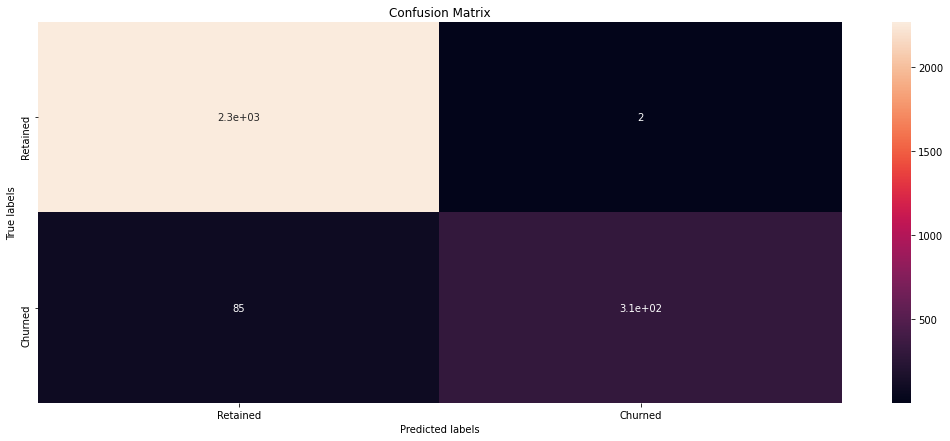

In [508]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [509]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       589
           1       0.68      0.77      0.72        78

    accuracy                           0.93       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.94      0.93      0.93       667

 
roc_auc_score
0.9103862458784738


In [510]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [511]:
train_auc

0.9737644153860732

In [512]:
test_auc

0.9103862458784738

In [513]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [514]:
xg_optimal_model.feature_importances_

array([0.13526717, 0.13970493, 0.02815118, 0.        , 0.07909274,
       0.02678716, 0.        , 0.05564555, 0.02324151, 0.        ,
       0.0960285 , 0.2527701 , 0.03510676, 0.12820433, 0.        ],
      dtype=float32)

In [515]:
importances = xg_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [516]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [517]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.14
1      Total day minutes                0.14
2        Total day calls                0.03
3       Total day charge                0.00
4      Total eve minutes                0.08

In [518]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
11       Customer service calls                0.25
0         Number vmail messages                0.14
1             Total day minutes                0.14
13  Modified_International_plan                0.13
10             Total intl calls                0.10
4             Total eve minutes                0.08
7           Total night minutes                0.06
12   international_rate_per_min                0.04
2               Total day calls                0.03
5               Total eve calls                0.03
8             Total night calls                0.02
3              Total day charge                0.00
6              Total eve charge                0.00
9            Total night charge                0.00
14     Modified_Voice_mail_plan                0.00

In [519]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [520]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

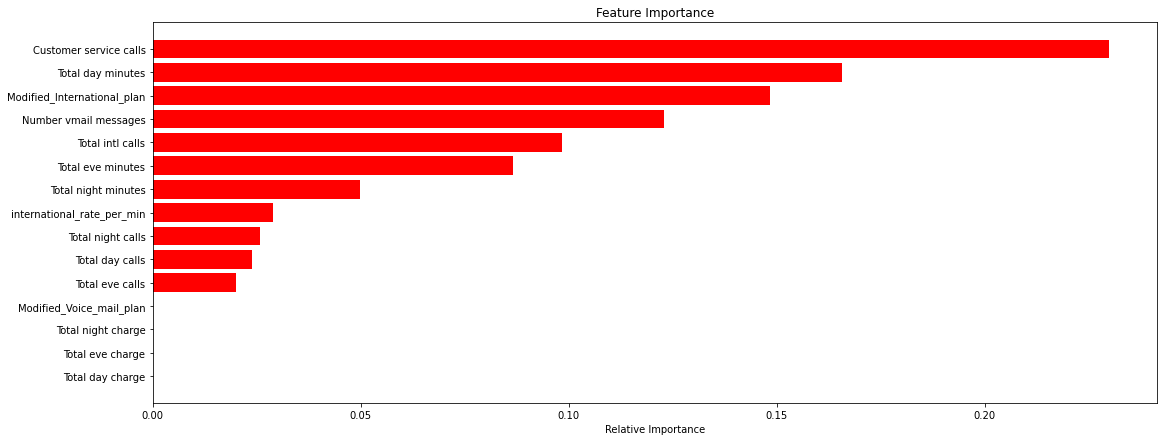

In [521]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

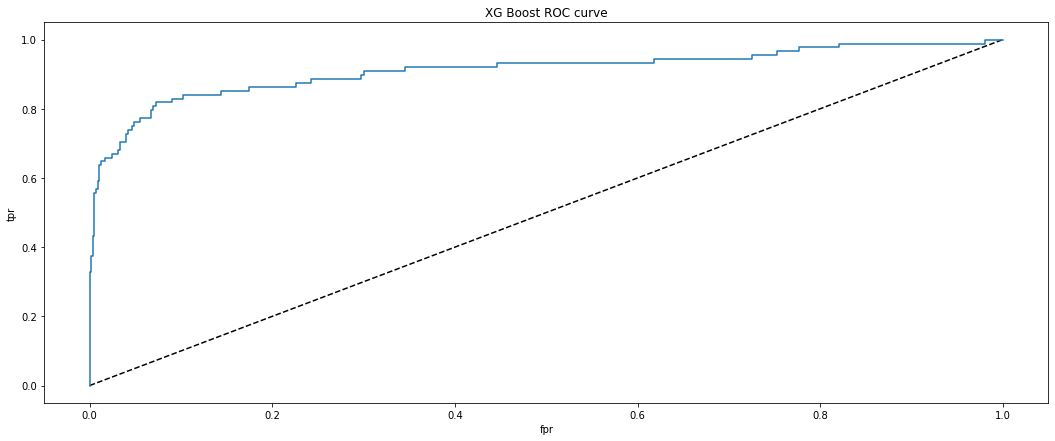

In [522]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost ROC curve')
plt.show()

## **Implementing KNN**

In [523]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

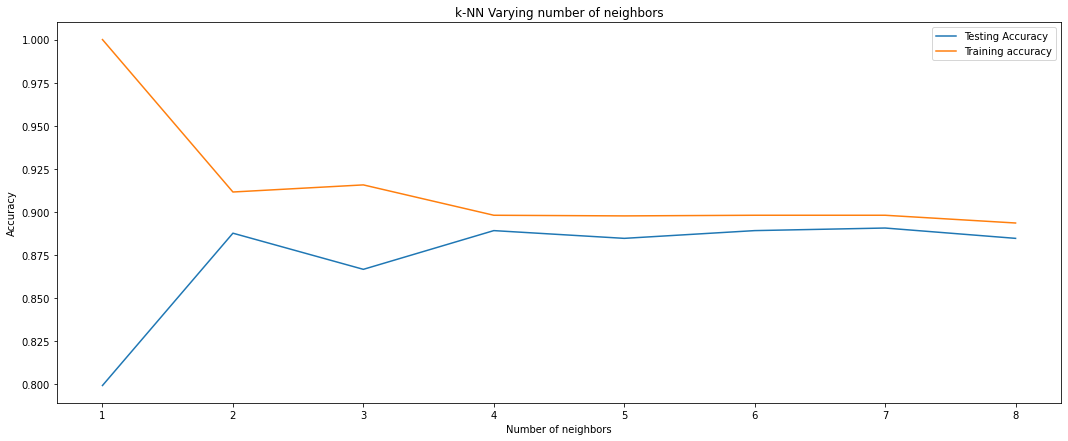

In [524]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [525]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [526]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [527]:
knn.score(X_test,y_test)

0.8665667166416792

In [528]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [529]:
# Let us get the predictions using the classifier we had fit above
train_class_preds = knn.predict(X_test)

In [530]:
confusion_matrix(y_test,train_class_preds)

array([[551,  28],
       [ 61,  27]])

[[551  28]
 [ 61  27]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

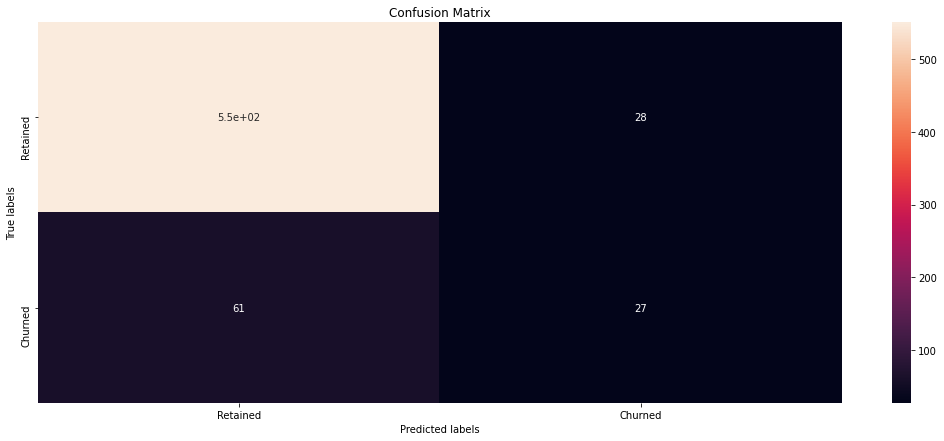

In [531]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [532]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       589
           1       0.68      0.77      0.72        78

    accuracy                           0.93       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.94      0.93      0.93       667

 
roc_auc_score
0.9103862458784738


In [533]:
test_preds = knn.predict_proba(X_test)[:,1]

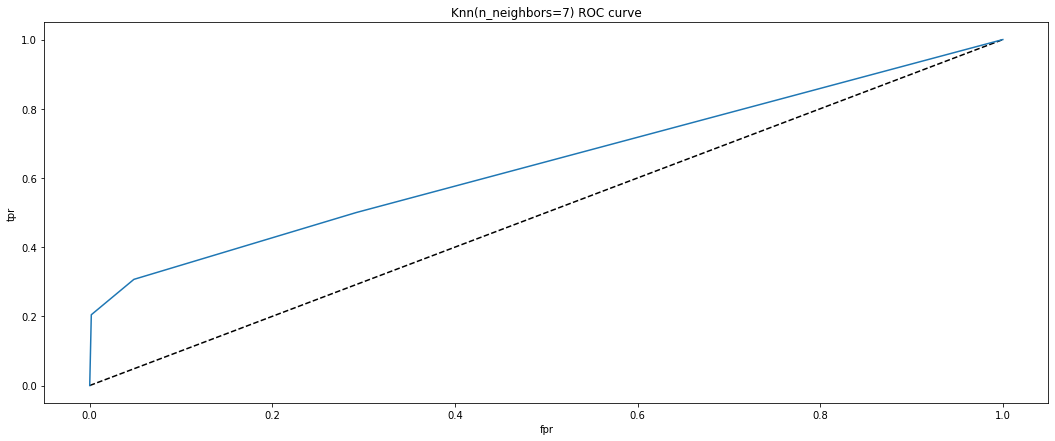

In [534]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [535]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,test_class_preds)

0.8253650494583136

## **Implementing KNN with Cross Validation**

In [536]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [537]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [538]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [539]:
knn_cv.best_score_

0.8898892895894395

In [540]:
knn_cv.best_params_

{'n_neighbors': 9}

In [541]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [542]:
knn_optimal_model = knn_cv.best_estimator_

In [543]:
knn_cv.best_params_

{'n_neighbors': 9}

In [544]:
# Making predictions on train and test data

train_class_preds = knn_optimal_model.predict(X_train)
test_class_preds = knn_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = knn_optimal_model.predict_proba(X_train)[:,1]
test_preds = knn_optimal_model.predict_proba(X_test)[:,1]

In [545]:
len(train_preds)

2666

In [546]:
test_class_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [547]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8968492123030758
The accuracy on test dataset is 0.8980509745127436


In [548]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [549]:
train_cm

array([[2253,   18],
       [ 257,  138]])

In [550]:
test_cm

array([[570,   9],
       [ 59,  29]])

[[2253   18]
 [ 257  138]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

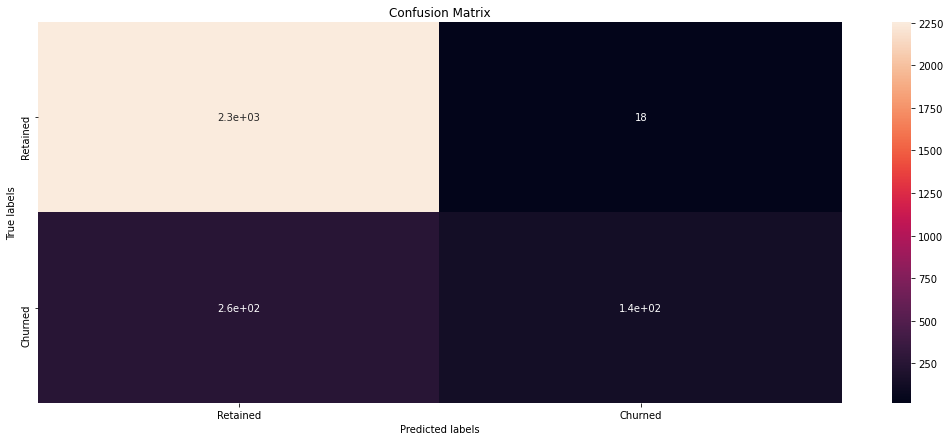

In [551]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [552]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       629
           1       0.33      0.76      0.46        38

    accuracy                           0.90       667
   macro avg       0.66      0.83      0.70       667
weighted avg       0.95      0.90      0.92       667

 
roc_auc_score
0.8466203485633538


In [553]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [554]:
train_auc

0.869560612901248

In [555]:
test_auc

0.8466203485633538

In [556]:
X_train.columns

Index(['Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Customer service calls',
       'international_rate_per_min', 'Modified_International_plan',
       'Modified_Voice_mail_plan'],
      dtype='object')

In [557]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [558]:
importance_df.head()

Feature  Feature Importance
0  Number vmail messages                0.14
1      Total day minutes                0.14
2        Total day calls                0.03
3       Total day charge                0.00
4      Total eve minutes                0.08

In [559]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
11       Customer service calls                0.25
0         Number vmail messages                0.14
1             Total day minutes                0.14
13  Modified_International_plan                0.13
10             Total intl calls                0.10
4             Total eve minutes                0.08
7           Total night minutes                0.06
12   international_rate_per_min                0.04
2               Total day calls                0.03
5               Total eve calls                0.03
8             Total night calls                0.02
3              Total day charge                0.00
6              Total eve charge                0.00
9            Total night charge                0.00
14     Modified_Voice_mail_plan                0.00

In [560]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [561]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

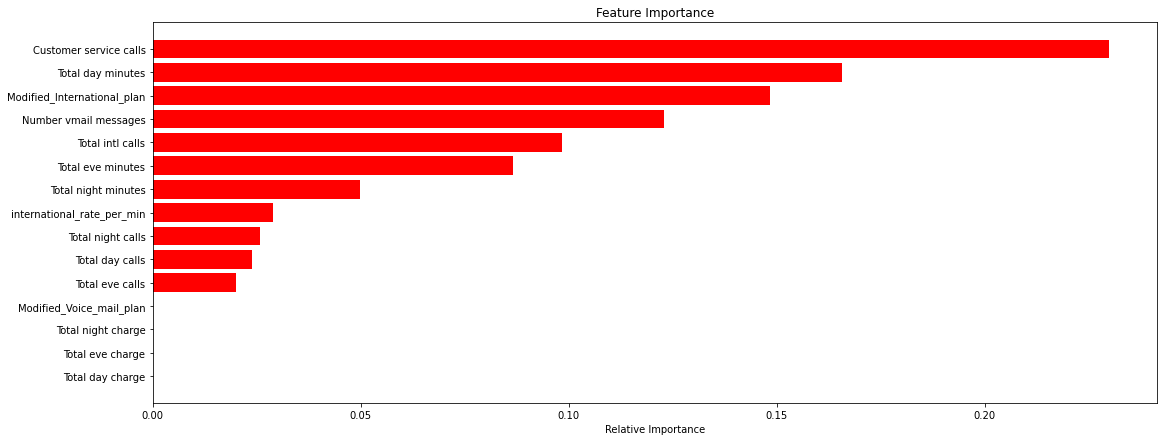

In [562]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

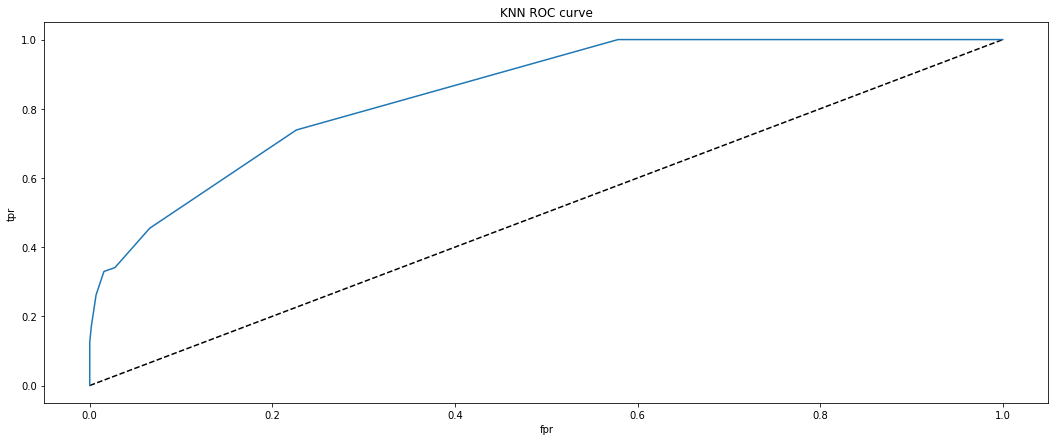

In [563]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()